#**1. Importing Libraries and Reading data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import warnings
import re
import calendar
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/train.csv')

test_data = pd.read_csv('/content/test.csv')

----

#**2. Data Overview and Description**

In [ ]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

<font size='5'>**Data Description :**</font>

* MSSubClass: Identifies the type of dwelling involved in the sale.

    - 20	1-STORY 1946 & NEWER ALL STYLES
    - 30	1-STORY 1945 & OLDER
    - 40	1-STORY W/FINISHED ATTIC ALL AGES
    - 45	1-1/2 STORY - UNFINISHED ALL AGES
    - 50	1-1/2 STORY FINISHED ALL AGES
    - 60	2-STORY 1946 & NEWER
    - 70	2-STORY 1945 & OLDER
    - 75	2-1/2 STORY ALL AGES
    - 80	SPLIT OR MULTI-LEVEL
    - 85	SPLIT FOYER
    - 90	DUPLEX - ALL STYLES AND AGES
    - 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    - 150	1-1/2 STORY PUD - ALL AGES
    - 160	2-STORY PUD - 1946 & NEWER
    - 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    - 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

* MSZoning: Identifies the general zoning classification of the sale.

     -  A	 Agriculture
     -  C	 Commercial
     -  FV    Floating Village Residential
     -  I	 Industrial
     -  RH	Residential High Density
     -  RL	Residential Low Density
     -  RP	Residential Low Density Park
     -  RM	Residential Medium Density

* LotFrontage: Linear feet of street connected to property.

* LotArea: Lot size in square feet.

* Street: Type of road access to property.

    - Grvl	Gravel
    - Pave	Paved

* Alley: Type of alley access to property.

   - Grvl	Gravel
   - Pave	Paved
   - NA 	No alley access

* LotShape: General shape of property.

    - Reg	Regular
    - IR1	Slightly irregular
    - IR2	Moderately Irregular
    - IR3	Irregular
       
* LandContour: Flatness of the property

    - Lvl	Near Flat/Level
    - Bnk	Banked - Quick and significant rise from street grade to building
    - HLS	Hillside - Significant slope from side to side
    -  Low	Depression

* Utilities: Type of utilities available.

    - AllPub	All public Utilities (E,G,W,& S)
    - NoSewr	Electricity, Gas, and
    - Water (Septic Tank)
    - NoSeWa	Electricity and Gas Only
    - ELO	Electricity only

* LotConfig: Lot configuration.

    - Inside	Inside lot
    - Corner	Corner lot
    - CulDSac	Cul-de-sac
    - FR2	Frontage on 2 sides of property
      - FR3	Frontage on 3 sides of property

* LandSlope: Slope of property.

    - Gtl	Gentle slope
    - Mod	Moderate Slope
    - Sev	Severe Slope

* Neighborhood: Physical locations within Ames city limits.

    - Blmngtn	Bloomington Heights
    - Blueste	Bluestem
    -   BrDale	Briardale
    -   BrkSide	Brookside
    -    ClearCr	Clear Creek
    -   CollgCr	College Creek
    -   Crawfor	Crawford
    -   Edwards	Edwards
    -   Gilbert	Gilbert
    -   IDOTRR	Iowa DOT and Rail Road
    -   MeadowV	Meadow Village
    -   Mitchel	Mitchell
    -   Names	North Ames
    -   NoRidge	Northridge
    -   NPkVill	Northpark Villa
    -   NridgHt	Northridge Heights
    -   NWAmes	Northwest Ames
    -   OldTown	Old Town
    -   SWISU	South & West of Iowa State University
    -   Sawyer	Sawyer
    -   SawyerW	Sawyer West
    -   Somerst	Somerset
    -   StoneBr	Stone Brook
    -  Timber	Timberland
    -  Veenker	Veenker

Condition1: Proximity to various conditions.

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed -
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


# **3. Data Exploration and Analysis**

In [ ]:
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

* Dataset consists of **```1460 rows and 81 columns```**
* The Dataset is relatively small, consisting of a limited number of records with High-Dimensionality.

Checking for the columns datatypes

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

With the understanding of the features and their descriptions, we aimed to rename the columns to more meaningful and insightful names.

In [ ]:
new_column_names = {
    'MSSubClass': 'DwellingTypeSubClass',
    'MSZoning': 'ZoningClassification',
    'LotFrontage': 'StreetFrontage',
    'LotArea': 'LotSize',
    'Street': 'RoadAccessType',
    'Alley': 'AlleyAccessType',
    'LotShape': 'LotShape',
    'LandContour': 'LandFlatness',
    'Utilities': 'UtilitiesAvailable',
    'LotConfig': 'LotConfiguration',
    'LandSlope': 'SlopeOfProperty',
    'Neighborhood': 'Neighborhood',
    'Condition1': 'ProximityToConditions1',
    'Condition2': 'ProximityToConditions2',
    'BldgType': 'DwellingType',
    'HouseStyle': 'DwellingStyle',
    'OverallQual': 'OverallMaterialAndFinish',
    'OverallCond': 'OverallCondition',
    'YearBuilt': 'YearBuilt',
    'YearRemodAdd': 'YearRemodeled',
    'RoofStyle': 'RoofStyle',
    'RoofMatl': 'RoofMaterial',
    'Exterior1st': 'ExteriorCovering1',
    'Exterior2nd': 'ExteriorCovering2',
    'MasVnrType': 'MasonryVeneerType',
    'MasVnrArea': 'MasonryVeneerArea',
    'ExterQual': 'ExteriorQuality',
    'ExterCond': 'ExteriorCondition',
    'Foundation': 'FoundationType',
    'BsmtQual': 'BasementHeight',
    'BsmtCond': 'BasementCondition',
    'BsmtExposure': 'BasementExposure',
    'BsmtFinType1': 'BasementFinishType1',
    'BsmtFinSF1': 'BasementFinishedSF1',
    'BsmtFinType2': 'BasementFinishType2',
    'BsmtFinSF2': 'BasementFinishedSF2',
    'BsmtUnfSF': 'BasementUnfinishedSF',
    'TotalBsmtSF': 'TotalBasementSF',
    'Heating': 'HeatingType',
    'HeatingQC': 'HeatingQualityCondition',
    'CentralAir': 'CentralAirConditioning',
    'Electrical': 'ElectricalSystem',
    '1stFlrSF': 'FirstFloorSF',
    '2ndFlrSF': 'SecondFloorSF',
    'LowQualFinSF': 'LowQualityFinishedSF',
    'GrLivArea': 'AboveGradeLivingAreaSF',
    'BsmtFullBath': 'BasementFullBathrooms',
    'BsmtHalfBath': 'BasementHalfBathrooms',
    'FullBath': 'FullBathrooms',
    'HalfBath': 'HalfBathrooms',
    'Bedroom': 'Bedrooms',
    'Kitchen': 'Kitchens',
    'KitchenQual': 'KitchenQuality',
    'TotRmsAbvGrd': 'TotalRoomsAboveGrade',
    'Functional': 'HomeFunctionality',
    'Fireplaces': 'Fireplaces',
    'FireplaceQu': 'FireplaceQuality',
    'GarageType': 'GarageLocation',
    'GarageYrBlt': 'GarageYearBuilt',
    'GarageFinish': 'GarageFinish',
    'GarageCars': 'GarageSizeInCars',
    'GarageArea': 'GarageSizeInSF',
    'GarageQual': 'GarageQuality',
    'GarageCond': 'GarageCondition',
    'PavedDrive': 'PavedDriveway',
    'WoodDeckSF': 'WoodDeckAreaSF',
    'OpenPorchSF': 'OpenPorchAreaSF',
    'EnclosedPorch': 'EnclosedPorchAreaSF',
    '3SsnPorch': 'ThreeSeasonPorchAreaSF',
    'ScreenPorch': 'ScreenPorchAreaSF',
    'PoolArea': 'PoolAreaSF',
    'PoolQC': 'PoolQuality',
    'Fence': 'FenceQuality',
    'MiscFeature': 'MiscellaneousFeature',
    'MiscVal': 'MiscellaneousValue',
    'MoSold': 'MonthSold',
    'YrSold': 'YearSold',
    'SaleType': 'SaleType',
    'SaleCondition': 'SaleCondition'
}

train_data.rename(columns=new_column_names, inplace=True)
test_data.rename(columns=new_column_names, inplace=True)

In [ ]:
train_data.head()

Id  DwellingTypeSubClass ZoningClassification  StreetFrontage  LotSize  \
0   1                    60                   RL            65.0     8450   
1   2                    20                   RL            80.0     9600   
2   3                    60                   RL            68.0    11250   
3   4                    70                   RL            60.0     9550   
4   5                    60                   RL            84.0    14260   

  RoadAccessType AlleyAccessType LotShape LandFlatness UtilitiesAvailable  \
0           Pave             NaN      Reg          Lvl             AllPub   
1           Pave             NaN      Reg          Lvl             AllPub   
2           Pave             NaN      IR1          Lvl             AllPub   
3           Pave             NaN      IR1          Lvl             AllPub   
4           Pave             NaN      IR1          Lvl             AllPub   

  LotConfiguration SlopeOfProperty Neighborhood ProximityToConditions1  \
0           Inside             Gtl      CollgCr                   Norm   
1              FR2             Gtl      Veenker                  Feedr   
2           Inside             Gtl      CollgCr                   Norm   
3           Corner             Gtl      Crawfor                   Norm   
4              FR2             Gtl      NoRidge                   Norm   

  ProximityToConditions2 DwellingType DwellingStyle  OverallMaterialAndFinish  \
0                   Norm         1Fam        2Story                         7   
1                   Norm         1Fam        1Story                         6   
2                   Norm         1Fam        2Story                         7   
3                   Norm         1Fam        2Story                         7   
4                   Norm         1Fam        2Story                         8   

   OverallCondition  YearBuilt  YearRemodeled RoofStyle RoofMaterial  \
0                 5       2003           2003     Gable      CompShg   
1                 8       1976           1976     Gable      CompShg   
2                 5       2001           2002     Gable      CompShg   
3                 5       1915           1970     Gable      CompShg   
4                 5       2000           2000     Gable      CompShg   

  ExteriorCovering1 ExteriorCovering2 MasonryVeneerType  MasonryVeneerArea  \
0           VinylSd           VinylSd           BrkFace              196.0   
1           MetalSd           MetalSd               NaN                0.0   
2           VinylSd           VinylSd           BrkFace              162.0   
3           Wd Sdng           Wd Shng               NaN                0.0   
4           VinylSd           VinylSd           BrkFace              350.0   

  ExteriorQuality ExteriorCondition FoundationType BasementHeight  \
0              Gd                TA          PConc             Gd   
1              TA                TA         CBlock             Gd   
2              Gd                TA          PConc             Gd   
3              TA                TA         BrkTil             TA   
4              Gd                TA          PConc             Gd   

  BasementCondition BasementExposure BasementFinishType1  BasementFinishedSF1  \
0                TA               No                 GLQ                  706   
1                TA               Gd                 ALQ                  978   
2                TA               Mn                 GLQ                  486   
3                Gd               No                 ALQ                  216   
4                TA               Av                 GLQ                  655   

  BasementFinishType2  BasementFinishedSF2  BasementUnfinishedSF  \
0                 Unf                    0                   150   
1                 Unf                    0                   284   
2                 Unf                    0                   434   
3                 Unf                    0                   540   
4

Removing the ID column as it doesn't provide any useful information.

In [ ]:
train_data.drop(['Id'],axis=1,inplace=True)
test_data.drop(['Id'],axis = 1,inplace=True)

Changing the Datatype of **``DwellingTypeSubClass``** Column as it's a Categorical.

In [ ]:
train_data['DwellingTypeSubClass'] = train_data['DwellingTypeSubClass'].astype(str)

print(train_data['DwellingTypeSubClass'].dtype)

object


Generating an overview of descriptive statistics about numerical and categorical columns.

In [ ]:
train_data.describe().T

count           mean           std      min  \
StreetFrontage            1201.0      70.049958     24.284752     21.0   
LotSize                   1460.0   10516.828082   9981.264932   1300.0   
OverallMaterialAndFinish  1460.0       6.099315      1.382997      1.0   
OverallCondition          1460.0       5.575342      1.112799      1.0   
YearBuilt                 1460.0    1971.267808     30.202904   1872.0   
YearRemodeled             1460.0    1984.865753     20.645407   1950.0   
MasonryVeneerArea         1452.0     103.685262    181.066207      0.0   
BasementFinishedSF1       1460.0     443.639726    456.098091      0.0   
BasementFinishedSF2       1460.0      46.549315    161.319273      0.0   
BasementUnfinishedSF      1460.0     567.240411    441.866955      0.0   
TotalBasementSF           1460.0    1057.429452    438.705324      0.0   
FirstFloorSF              1460.0    1162.626712    386.587738    334.0   
SecondFloorSF             1460.0     346.992466    436.528436      0.0   
LowQualityFinishedSF      1460.0       5.844521     48.623081      0.0   
AboveGradeLivingAreaSF    1460.0    1515.463699    525.480383    334.0   
BasementFullBathrooms     1460.0       0.425342      0.518911      0.0   
BasementHalfBathrooms     1460.0       0.057534      0.238753      0.0   
FullBathrooms             1460.0       1.565068      0.550916      0.0   
HalfBathrooms             1460.0       0.382877      0.502885      0.0   
BedroomAbvGr              1460.0       2.866438      0.815778      0.0   
KitchenAbvGr              1460.0       1.046575      0.220338      0.0   
TotalRoomsAboveGrade      1460.0       6.517808      1.625393      2.0   
Fireplaces                1460.0       0.613014      0.644666      0.0   
GarageYearBuilt           1379.0    1978.506164     24.689725   1900.0   
GarageSizeInCars          1460.0       1.767123      0.747315      0.0   
GarageSizeInSF            1460.0     472.980137    213.804841      0.0   
WoodDeckAreaSF            1460.0      94.244521    125.338794      0.0   
OpenPorchAreaSF           1460.0      46.660274     66.256028      0.0   
EnclosedPorchAreaSF       1460.0      21.954110     61.119149      0.0   
ThreeSeasonPorchAreaSF    1460.0       3.409589     29.317331      0.0   
ScreenPorchAreaSF         1460.0      15.060959     55.757415      0.0   
PoolAreaSF                1460.0       2.758904     40.177307      0.0   
MiscellaneousValue        1460.0      43.489041    496.123024      0.0   
MonthSold                 1460.0       6.321918      2.703626      1.0   
YearSold                  1460.0    2007.815753      1.328095   2006.0   
SalePrice                 1460.0  180921.195890  79442.502883  34900.0   

                                25%       50%        75%       max  
StreetFrontage                59.00      69.0      80.00     313.0  
LotSize                     7553.50    9478.5   11601.50  215245.0  
OverallMaterialAndFinish       5.00       6.0       7.00      10.0  
OverallCondition               5.00       5.0       6.00       9.0  
YearBuilt                   1954.00    1973.0    2000.00    2010.0  
YearRemodeled               1967.00    1994.0    2004.00    2010.0  
MasonryVeneerArea              0.00       0.0     166.00    1600.0  
BasementFinishedSF1            0.00     383.5     712.25    5644.0  
BasementFinishedSF2            0.00       0.0       0.00    1474.0  
BasementUnfinishedSF         223.00     477.5     808.00    2336.0  
TotalBasementSF              795.75     991.5    1298.25    6110.0  
FirstFloorSF                 882.00    1087.0    1391.25    4692.0  
SecondFloorSF                  0.00       0.0     728.00    2065.0  
LowQualityFinishedSF           0.00       0.0       0.00     572.0  
AboveGradeLivingAreaSF      1129.50    1464.0    1776.75    5642.0  
BasementFullBathrooms          0.00       0.0       1.00       3.0  
BasementHalfBathrooms          0.00       0.0       0.00       2.0  
FullBathrooms                  1.00       2.0 

In [ ]:
train_data.describe(include='object').T

count unique      top  freq
DwellingTypeSubClass     1460     15       20   536
ZoningClassification     1460      5       RL  1151
RoadAccessType           1460      2     Pave  1454
AlleyAccessType            91      2     Grvl    50
LotShape                 1460      4      Reg   925
LandFlatness             1460      4      Lvl  1311
UtilitiesAvailable       1460      2   AllPub  1459
LotConfiguration         1460      5   Inside  1052
SlopeOfProperty          1460      3      Gtl  1382
Neighborhood             1460     25    NAmes   225
ProximityToConditions1   1460      9     Norm  1260
ProximityToConditions2   1460      8     Norm  1445
DwellingType             1460      5     1Fam  1220
DwellingStyle            1460      8   1Story   726
RoofStyle                1460      6    Gable  1141
RoofMaterial             1460      8  CompShg  1434
ExteriorCovering1        1460     15  VinylSd   515
ExteriorCovering2        1460     16  VinylSd   504
MasonryVeneerType         588      3  BrkFace   445
ExteriorQuality          1460      4       TA   906
ExteriorCondition        1460      5       TA  1282
FoundationType           1460      6    PConc   647
BasementHeight           1423      4       TA   649
BasementCondition        1423      4       TA  1311
BasementExposure         1422      4       No   953
BasementFinishType1      1423      6      Unf   430
BasementFinishType2      1422      6      Unf  1256
HeatingType              1460      6     GasA  1428
HeatingQualityCondition  1460      5       Ex   741
CentralAirConditioning   1460      2        Y  1365
ElectricalSystem         1459      5    SBrkr  1334
KitchenQuality           1460      4       TA   735
HomeFunctionality        1460      7      Typ  1360
FireplaceQuality          770      5       Gd   380
GarageLocation           1379      6   Attchd   870
GarageFinish             1379      3      Unf   605
GarageQuality            1379      5       TA  1311
GarageCondition          1379      5       TA  1326
PavedDriveway            1460      3        Y  1340
PoolQuality                 7      3       Gd     3
FenceQuality              281      4    MnPrv   157
MiscellaneousFeature       54      4     Shed    49
SaleType                 1460      9       WD  1267
SaleCondition            1460      6   Normal  1198

* ZoningClassification:
    * Observation: The majority of properties are classified as "RL" (Residential Low Density), suggesting a predominance of low-density residential areas in the dataset.

* RoadAccessType:
    * Observation: Most properties have access via paved roads, indicating good infrastructure and accessibility.

* AlleyAccessType:
    * Observation: A small proportion of properties have access via gravel alleys, suggesting a mix of urban and rural settings.

* LotShape:
    * Observation: The most common lot shape is regular (Reg), indicating a balanced distribution of lot shapes in the dataset.

* LandFlatness:
    * Observation: The majority of properties are located on level land (Lvl), which is typical for residential areas.

* UtilitiesAvailable:
    * Observation: Almost all properties have access to all public utilities, indicating a high level of infrastructure development.

* LotConfiguration:
    * Observation: The most common lot configuration is inside (Inside), suggesting properties located within the interior of blocks.

* SlopeOfProperty:
    * Observation: Most properties have a gentle slope (Gtl), indicating relatively flat terrain.

* Neighborhood:
    * Observation: The dataset contains properties from 25 different neighborhoods, with "NAmes" being the most frequent. This suggests a diverse representation of neighborhoods.

* ProximityToConditions1 and ProximityToConditions2:
    * Observation: The most common condition type is "Norm" (Normal), indicating that the majority of properties are in normal proximity to various conditions.

* DwellingType:
    * Observation: The most common dwelling type is "1Fam" (Single-family), indicating that the majority of properties are single-family homes.

* DwellingStyle:
    * Observation: The most common dwelling style is "1Story" (One story), suggesting a preference for single-story homes.

* RoofStyle and RoofMaterial:
    * Observation: The most common roof style is "Gable" with "CompShg" (Composite shingle) being the most common material, indicating typical roofing choices for residential properties.

* ExteriorCovering1 and ExteriorCovering2:
    * Observation: The most common exterior covering types are "VinylSd" (Vinyl Siding), suggesting a popular choice for exterior finishes.

* MasonryVeneerType:
    * Observation: The dataset contains three types of masonry veneer, with "BrkFace" (Brick Face) being the most common.

* ExteriorQuality and ExteriorCondition:
    * Observation: The majority of properties have typical exterior quality and condition.

* FoundationType:
    * Observation: The most common foundation type is "PConc" (Poured Concrete), indicating a prevalent choice for property foundations.

* BasementHeight, BasementCondition, BasementExposure, BasementFinishType1, and BasementFinishType2:
    * Observation: These columns describe various attributes of basements, with most properties having typical attributes such as average height, condition, and finish type.

* HeatingType and HeatingQualityCondition:
    *  Observation: The majority of properties have gas central heating with typical or excellent quality and condition.

* CentralAirConditioning:
    *   Observation: Most properties have central air conditioning installed.

* ElectricalSystem:
    *   Observation: The majority of properties have standard circuit breaker electrical systems.

* KitchenQuality:
    *  Observation: Most properties have typical kitchen quality.

* HomeFunctionality:
    *   Observation: The majority of properties have typical home functionality.

* FireplaceQuality:
    *  Observation: Properties with fireplaces predominantly have good quality fireplaces.

* GarageLocation, GarageFinish, GarageQuality, and GarageCondition:
    *   Observation: These columns describe various attributes of garages, with most properties having attached garages, unfinished finishes, typical quality, and condition.

* PavedDriveway:
     *   Observation: Most properties have paved driveways.

* PoolQuality and FenceQuality:
    * Observation: These columns describe pool and fence quality, with only a small number of properties having pools or fences.

* MiscellaneousFeature:
    *   Observation: Only a small number of properties have additional miscellaneous features such as sheds.

* SaleType and SaleCondition:
    *    Observation: The majority of properties are sold under normal sale conditions, with most sales being WD (Warranty Deed).

Checking for duplciated rows

In [ ]:
train_data.duplicated().sum()

0

* Dataset is free of any duplication,suggesting consistent and unique entries.

Visualizing The Percentage of each **`DwellingTypeSubClass`** value.

In [ ]:
fig=px.pie(names=train_data['DwellingTypeSubClass'].value_counts().index,values=train_data['DwellingTypeSubClass'].value_counts().values,title='Percentage for each DwellingTypeSubClass',labels=train_data['DwellingTypeSubClass'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

- The Most Frequent DwellingTypeSubClass is 20, which corresponds to **`1-STORY 1946 & NEWER ALL STYLES`**.
- The Second is 60, representing **`2-STORY 1946 & NEWER`**.
- The Least Present is 50 , corresponding to **`1-STORY W/FINISHED ATTIC ALL AGES`**.

Showing the most frequent **DwellingTypeSubClass** in each **Neighborhood**.

In [ ]:
grouped=train_data.groupby(['Neighborhood','DwellingTypeSubClass']).size().unstack(fill_value=0).reset_index()

melted = pd.melt(grouped, id_vars='Neighborhood', var_name='DwellingTypeSubClass', value_name='Frequency')

melted=melted.sort_values(by='Frequency')

fig = px.bar(melted, x='Neighborhood', y='Frequency', color='DwellingTypeSubClass', barmode='stack',
             title='Frequency of DwellingTypeSubClass in Each Neighborhood',color_discrete_sequence=px.colors.qualitative.Set3_r)
fig.update_layout(xaxis={'tickangle': -20})

fig.show()

- NAmes Neighborhood has the most frequent DwellingTypeSubClass is `20`, corresponding to `1-STORY 1946 & NEWER ALL STYLES`.

Checking which Neighbrhood has the most expensive Prices.

In [ ]:
geographical_variations_neighborhood = train_data.groupby('Neighborhood')['SalePrice'].mean().reset_index()
geographical_variations_neighborhood = geographical_variations_neighborhood.sort_values(by='SalePrice', ascending=False)

fig = px.bar(geographical_variations_neighborhood,
             x='Neighborhood',
             y='SalePrice',
             title='Average House Prices by Neighborhood',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'tickangle': -20})
fig.show()

- **`NoRidge`** neighborhood has the most expensive house prices.

Checking which Neighbrhood has the most Sales.

In [ ]:
geographical_variations_neighborhood = train_data.groupby('Neighborhood')['SalePrice'].sum().reset_index()
geographical_variations_neighborhood = geographical_variations_neighborhood.sort_values(by='SalePrice', ascending=False)

fig = px.bar(geographical_variations_neighborhood,
             x='Neighborhood',
             y='SalePrice',
             title='Average House Prices by Neighborhood',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'tickangle': -20})
fig.show()

- NAmes has the most sales.

Visualizing The Percentage of each **`RoadAccessType`** value.

In [ ]:
fig=px.pie(names=train_data['RoadAccessType'].value_counts().index,values=train_data['RoadAccessType'].value_counts().values,title='Percentage for each RoadAccessType',labels=train_data['RoadAccessType'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

- We can say all the neighborhoods **`RoadAccessType`** are Paved.

Visualizing The Percentage of each **`UtilitiesAvailable`** value.

In [ ]:
fig=px.pie(names=train_data['UtilitiesAvailable'].value_counts().index,values=train_data['UtilitiesAvailable'].value_counts().values,title='Percentage for each UtilitiesAvailable',labels=train_data['UtilitiesAvailable'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel1))
fig.show()

- All the neighborhoods have all utilities.

Showing the most frequent **ZoningClassification** in each **Neighborhood**.

In [ ]:
grouped=train_data.groupby(['Neighborhood','ZoningClassification']).size().unstack(fill_value=0).reset_index()

melted = pd.melt(grouped, id_vars='Neighborhood', var_name='ZoningClassification', value_name='Frequency')

melted=melted.sort_values(by='Frequency')

fig = px.bar(melted, x='Neighborhood', y='Frequency', color='ZoningClassification', barmode='stack',
             title='Frequency of ZoningClassification in Each Neighborhood',color_discrete_sequence=px.colors.qualitative.Set3_r)
fig.update_layout(xaxis={'tickangle': -20})

fig.show()

- Most of the neighborhoods are **`Residential Low Density`**, except Somerst is **`Floating Village Residential`** and OldTown is **`Residential Medium Density`**.

Showing the most frequent **DwellingType** in each **Neighborhood**.

In [ ]:
grouped=train_data.groupby(['Neighborhood','DwellingType']).size().unstack(fill_value=0).reset_index()

melted = pd.melt(grouped, id_vars='Neighborhood', var_name='DwellingType', value_name='Frequency')

melted=melted.sort_values(by='Frequency')

fig = px.bar(melted, x='Neighborhood', y='Frequency', color='DwellingType', barmode='stack',
             title='Frequency of DwellingType in Each Neighborhood',color_discrete_sequence=px.colors.qualitative.Pastel_r)
fig.update_layout(xaxis={'tickangle': -20})

fig.show()

- 1Fam is Most frequent **`DwellingType`** in the most of neighborhoods.

Showing the most frequent **OverallMaterialAndFinish** in each **Neighborhood**.

In [ ]:
grouped=train_data.groupby(['Neighborhood','OverallMaterialAndFinish']).size().unstack(fill_value=0).reset_index()

melted = pd.melt(grouped, id_vars='Neighborhood', var_name='OverallMaterialAndFinish', value_name='Frequency')

melted=melted.sort_values(by='Frequency')

fig = px.bar(melted, x='Neighborhood', y='Frequency', color='OverallMaterialAndFinish', barmode='stack',
             title='Frequency of OverallMaterialAndFinish in Each Neighborhood',color_discrete_sequence=px.colors.qualitative.Pastel_r)
fig.update_layout(xaxis={'tickangle': -20})

fig.show()

- NoRidge has minimum **`OverallMaterialAndFinish`** is 7 (Good) which may that make it has the most expensive houses.
- NAmes has an average **`OverallMaterialAndFinish`** Houses which make it suitable for clients.

Visualize the neighborhoods with most updated houses.

In [ ]:
updated=train_data[train_data['YearBuilt']!=train_data['YearRemodeled']]
fig=px.pie(names=updated['Neighborhood'].value_counts().index,values=updated['Neighborhood'].value_counts().values,title='Percentage for neighborhood updated houses',labels=updated['Neighborhood'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

- OldTown has the most updated houses.


Showing Average Lotsize in Each Neighborhood.

In [ ]:
geographical_variations_neighborhood = train_data.groupby('Neighborhood')['LotSize'].mean().reset_index()
geographical_variations_neighborhood = geographical_variations_neighborhood.sort_values(by='LotSize', ascending=False)

fig = px.bar(geographical_variations_neighborhood,
             x='Neighborhood',
             y='LotSize',
             title='Average LotSizes by Neighborhood',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'tickangle': -20})
fig.show()

- ClearCr has the Biggest LotSizes.

Visualizing The Relationship Between **`StreetFrontage`** and **`LotSize`**.

In [ ]:
correlation = train_data[['StreetFrontage','LotSize']].corr().iloc[0,1]

fig = px.scatter(x=train_data['StreetFrontage'], y=train_data['LotSize'],
                 title='Relation Between StreetFrontage and LotSize',
                 labels={'x': 'StreetFrontage ', 'y': 'LotSize'},
                 color_discrete_sequence=['orange'])

fig.add_annotation( x=0.9, y=0.9,
                   text=f'Correlation: {correlation:.2f}',
                   showarrow=False,
                   xref='paper', yref='paper',
                   align='center',
                   bgcolor='white',
                   bordercolor='black',
                   borderwidth=0.5,
                    font=dict(family='Arial', size=15))

fig.show()

- The **`StreetFrontage and LotSize`** are semi-correlated to each other.

Checking the housing sale trends over the years.

In [ ]:
yearly_price_trends = train_data.groupby('YearSold')['SalePrice'].sum().reset_index()
fig = px.line(yearly_price_trends,
              x='YearSold',
              y='SalePrice',
              title='Total Houses Prices Each Year',
              color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.update_xaxes(tickmode='linear')
fig.show()

* **`2007`** has the highest total houses sale,where 2008 has the lowest total houses sale.

Checking the variation of the Prices over the Years

In [ ]:
fig_box = px.box(train_data, x='YearSold', y='SalePrice',
             title='Box Plot of Sale Price by Year Sold',color_discrete_sequence=px.colors.qualitative.Dark2)
fig_box.show()

* In **`2007`**, the price variations were notably higher compared to other years. The majority of property prices ranged between 100k and 300k, but there were instances where property prices exceeded 700k. This suggests that the houses sold during this year exhibited a diverse range of types and conditions.

Visualizing which year has most sold properties.

In [ ]:
sales_by_year = train_data['YearSold'].value_counts().reset_index().sort_values(by='count')

fig_pie = px.pie(sales_by_year, names='YearSold', values='count',
                 title='Distribution of Sales Occurrences by Year',
                 color_discrete_sequence=px.colors.qualitative.Plotly_r)

fig_pie.update_traces(textinfo='value+percent', pull=0.03)
fig_pie.show()


* **`2010`** has the lowest number of sold properites = 175 compared to other years, indicating a potential downturn or slowdown in the real estate market during that period.

* **`2007`** and **`2009`** has the highest number of sold properties,indicating a high level of market activity during both years.

In [ ]:
sale_condition_dwelling_counts = train_data.groupby(['SaleCondition', 'DwellingType']).size().reset_index(name='Count')

most_common_dwelling_per_condition = sale_condition_dwelling_counts.loc[sale_condition_dwelling_counts.groupby('SaleCondition')['Count'].idxmax()]

most_common_dwelling_per_condition_sorted = most_common_dwelling_per_condition.sort_values(by='Count', ascending=False)

fig = px.bar(most_common_dwelling_per_condition_sorted, y='SaleCondition', x='Count', color='DwellingType',
             title='Most Common Dwelling Type for Each Sale Condition',
             labels={'SaleCondition': 'Sale Condition', 'Count': 'Frequency', 'DwellingType': 'Dwelling Type'},
             orientation='h')
fig.show()


In [ ]:
sale_condition_dwelling_counts = train_data.groupby(['SaleCondition', 'DwellingType']).size().reset_index(name='Count')

# Find the most common dwelling type for each sale condition
most_common_dwelling_per_condition = sale_condition_dwelling_counts.loc[sale_condition_dwelling_counts.groupby('SaleCondition')['Count'].idxmax()].sort_values(by='Count', ascending=False)

# Plotting the bar chart
fig = px.bar(most_common_dwelling_per_condition, x='SaleCondition', y='Count', color='DwellingType',
             title='Most Common Dwelling Type for Each Sale Condition',
             labels={'SaleCondition': 'Sale Condition', 'Count': 'Frequency', 'DwellingType': 'Dwelling Type'})
fig.show()


Checking the Neighborhood that has the highest properties condition ratings and the lowest.

In [ ]:
neighborhood_condition = train_data.groupby('Neighborhood')['OverallCondition'].mean().reset_index().sort_values(by='OverallCondition', ascending=False)
highest_condition_neighborhood = neighborhood_condition.loc[neighborhood_condition['OverallCondition'].idxmax()]
lowest_condition_neighborhood = neighborhood_condition.loc[neighborhood_condition['OverallCondition'].idxmin()]

In [ ]:
neighborhood_condition_sorted = neighborhood_condition.sort_values(by='OverallCondition', ascending=False)

fig = px.bar(neighborhood_condition_sorted, x='Neighborhood', y='OverallCondition',
             title='Average Overall Condition Ratings by Neighborhood',
             labels={'Neighborhood': 'Neighborhood', 'OverallCondition': 'Average Overall Condition Rating'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Highlighting the highest and lowest condition neighborhoods
fig.add_annotation(x=highest_condition_neighborhood['Neighborhood'], y=highest_condition_neighborhood['OverallCondition'],
                   text="Highest Rating", showarrow=True, arrowhead=1)
fig.add_annotation(x=lowest_condition_neighborhood['Neighborhood'], y=lowest_condition_neighborhood['OverallCondition'],
                   text="Lowest Rating", showarrow=True, arrowhead=1)

# Show plot
fig.show()

* **Crawfor** Neighbrhood has properites with the highest average ratings for the properties conditon,where **Blmntgn** has the lowest condition ratings.

Checking the effect of the remodling of hosues on the sale prices.

In [ ]:
train_data['Remodeled'] = train_data['YearRemodeled'] != train_data['YearBuilt']

# Group data by the remodeled status and calculate the average sale price for each group
remodeling_effect = train_data.groupby('Remodeled')['SalePrice'].mean().reset_index()
remodeling_effect['Remodeled'] = remodeling_effect['Remodeled'].replace({True: 'Remodeled', False: 'Not Remodeled'})

fig = px.pie(remodeling_effect,
             names='Remodeled',
             values='SalePrice',
             title='Average Sale Price of Remodeled vs. Non-Remodeled Houses',
             labels={'Remodeled': 'Remodeled', 'SalePrice': 'Average Sale Price'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

* We can observe that the non-remodeled houses has average price more than the houses been remodeled,this suggests that remodling a house doesn't clearly affect the prices of the houses.

In [ ]:
sales_by_month = train_data['MonthSold'].value_counts().reset_index()
sales_by_month.columns = ['Month', 'Total Sales']

max_sales_month = sales_by_month.loc[sales_by_month['Total Sales'].idxmax(), 'Month']

fig = px.bar(sales_by_month,
             x='Month',
             y='Total Sales',
             title='Total Sales by Month')

fig.update_traces(marker_color=['orange' if month == max_sales_month else 'lightblue' for month in sales_by_month['Month']])

# add text labels to each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Sales',
    showlegend=False)
fig.show()

* **`June`** Month all over the years were the most active month for properties sold.

In [ ]:
sales_by_year_month = train_data.groupby(['YearSold', 'MonthSold']).size().reset_index(name='TotalSales')

# Find the month with the highest sales for each year
highest_months = sales_by_year_month.loc[sales_by_year_month.groupby('YearSold')['TotalSales'].idxmax()]

fig = px.bar(highest_months, x='YearSold', y='TotalSales', color='MonthSold',
             title='Highest Selling Month Each Year',
             labels={'YearSold': 'Year', 'TotalSales': 'Total Sales', 'MonthSold': 'Month'},
             color_discrete_sequence=px.colors.qualitative.Plotly_r)
fig.show()


* In **`2006 and 2009`**, the real estate market saw increased activity in ***July***, while in **`2007 and 2008`**, it was more active in ***June***.

Showing the most frequent **SaleCondition**




In [ ]:
fig=px.pie(names=train_data['SaleCondition'].value_counts().index,values=train_data['SaleCondition'].value_counts().values,title='Percentage for each Sale Condition',labels=train_data['SaleCondition'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

* **```Normal```** Sale condition is the most dominant type of sales present.

Showing the most frequent **SaleCondition** in each **Neighborhood**.

In [ ]:
neighborhood_sale_condition_counts = train_data.groupby(['Neighborhood', 'SaleCondition']).size().reset_index(name='Count')

# Sort by count in descending order
neighborhood_sale_condition_counts_sorted = neighborhood_sale_condition_counts.sort_values(by='Count', ascending=False)

fig = px.bar(neighborhood_sale_condition_counts_sorted, x='Neighborhood', y='Count', color='SaleCondition',
             title='Sale Conditions in Each Neighborhood ',
             labels={'Neighborhood': 'Neighborhood', 'Count': 'Frequency', 'SaleCondition': 'Sale Condition'})
fig.show()


* **`NAmes`** Neighbrhood has the largest number of sold propreties with different types,with ***`Normal`*** Sale condition being the most occuring condition within this neighborhood,then the ***`Abnormal`*** method.

* Where the ***`Partial`*** sale condition method mostly occured in two Neighborhoods  **`NridgHt`** and **`Somerst`**

Check the average price for each **SaleCondition**

In [ ]:
sale_condition_avg_prices = train_data.groupby('SaleCondition')['SalePrice'].mean().reset_index().sort_values(by='SalePrice',ascending=False)

fig = px.bar(sale_condition_avg_prices, x='SaleCondition', y='SalePrice',
             title='Average Sale Price for Each Sale Condition',
             labels={'SaleCondition': 'Sale Condition', 'SalePrice': 'Average Sale Price'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

* The **`Partial`** sale method has the highest average Sale Price which describes that preoperties being sold this way might be more expensive.

In [ ]:
train_data.drop('Remodeled',axis=1,inplace=True)

-----

# **4. PreProcessing**

### 4.1) Split Data into Train and Validate.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42,shuffle=True)
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)

In [ ]:
train_data.shape, val_data.shape

((1314, 80), (146, 80))

### 4.2) Missing Values

Inspecting each column to identify and analyze the presence of missing or null values within the dataset.

In [ ]:
train_data.isnull().sum()[train_data.isnull().any() ]

StreetFrontage           237
AlleyAccessType         1228
MasonryVeneerType        772
MasonryVeneerArea          8
BasementHeight            32
BasementCondition         32
BasementExposure          33
BasementFinishType1       32
BasementFinishType2       32
ElectricalSystem           1
FireplaceQuality         616
GarageLocation            73
GarageYearBuilt           73
GarageFinish              73
GarageQuality             73
GarageCondition           73
PoolQuality             1307
FenceQuality            1062
MiscellaneousFeature    1264
dtype: int64

In [ ]:
test_data.isnull().sum()[test_data.isnull().any()]

ZoningClassification        4
StreetFrontage            227
AlleyAccessType          1352
UtilitiesAvailable          2
ExteriorCovering1           1
ExteriorCovering2           1
MasonryVeneerType         894
MasonryVeneerArea          15
BasementHeight             44
BasementCondition          45
BasementExposure           44
BasementFinishType1        42
BasementFinishedSF1         1
BasementFinishType2        42
BasementFinishedSF2         1
BasementUnfinishedSF        1
TotalBasementSF             1
BasementFullBathrooms       2
BasementHalfBathrooms       2
KitchenQuality              1
HomeFunctionality           2
FireplaceQuality          730
GarageLocation             76
GarageYearBuilt            78
GarageFinish               78
GarageSizeInCars            1
GarageSizeInSF              1
GarageQuality              78
GarageCondition            78
PoolQuality              1456
FenceQuality             1169
MiscellaneousFeature     1408
SaleType                    1
dtype: int

Getting the percentage of Missing values in each column.

In [ ]:
(train_data.isnull().sum() / len(train_data) * 100)[(train_data.isnull().sum() / len(train_data) * 100) > 0]

StreetFrontage          18.036530
AlleyAccessType         93.455099
MasonryVeneerType       58.751903
MasonryVeneerArea        0.608828
BasementHeight           2.435312
BasementCondition        2.435312
BasementExposure         2.511416
BasementFinishType1      2.435312
BasementFinishType2      2.435312
ElectricalSystem         0.076104
FireplaceQuality        46.879756
GarageLocation           5.555556
GarageYearBuilt          5.555556
GarageFinish             5.555556
GarageQuality            5.555556
GarageCondition          5.555556
PoolQuality             99.467275
FenceQuality            80.821918
MiscellaneousFeature    96.194825
dtype: float64

In [ ]:
(test_data.isnull().sum() / len(test_data) * 100)[(test_data.isnull().sum() / len(test_data) * 100) > 0]

ZoningClassification      0.274160
StreetFrontage           15.558602
AlleyAccessType          92.666210
UtilitiesAvailable        0.137080
ExteriorCovering1         0.068540
ExteriorCovering2         0.068540
MasonryVeneerType        61.274846
MasonryVeneerArea         1.028101
BasementHeight            3.015764
BasementCondition         3.084304
BasementExposure          3.015764
BasementFinishType1       2.878684
BasementFinishedSF1       0.068540
BasementFinishType2       2.878684
BasementFinishedSF2       0.068540
BasementUnfinishedSF      0.068540
TotalBasementSF           0.068540
BasementFullBathrooms     0.137080
BasementHalfBathrooms     0.137080
KitchenQuality            0.068540
HomeFunctionality         0.137080
FireplaceQuality         50.034270
GarageLocation            5.209047
GarageYearBuilt           5.346127
GarageFinish              5.346127
GarageSizeInCars          0.068540
GarageSizeInSF            0.068540
GarageQuality             5.346127
GarageCondition     

Dropping unneccessary columns with missing values more than 50%.

In [ ]:
train_data.drop(['AlleyAccessType','MasonryVeneerType','PoolQuality','FenceQuality','MiscellaneousFeature','FireplaceQuality'],axis=1,inplace=True)
val_data.drop(['AlleyAccessType','MasonryVeneerType','PoolQuality','FenceQuality','MiscellaneousFeature','FireplaceQuality'],axis=1,inplace=True)
test_data.drop(['AlleyAccessType','MasonryVeneerType','PoolQuality','FenceQuality','MiscellaneousFeature','FireplaceQuality'],axis=1,inplace=True)

Showing The Rest of Columns that have missing value.

In [ ]:
train_data.isnull().sum()[train_data.isnull().any()]

StreetFrontage         237
MasonryVeneerArea        8
BasementHeight          32
BasementCondition       32
BasementExposure        33
BasementFinishType1     32
BasementFinishType2     32
ElectricalSystem         1
GarageLocation          73
GarageYearBuilt         73
GarageFinish            73
GarageQuality           73
GarageCondition         73
dtype: int64

Showing Percentage of The Rest of Columns that have missing value.

In [ ]:
(train_data.isnull().sum() / len(train_data) * 100)[(train_data.isnull().sum() / len(train_data) * 100) > 0]

StreetFrontage         18.036530
MasonryVeneerArea       0.608828
BasementHeight          2.435312
BasementCondition       2.435312
BasementExposure        2.511416
BasementFinishType1     2.435312
BasementFinishType2     2.435312
ElectricalSystem        0.076104
GarageLocation          5.555556
GarageYearBuilt         5.555556
GarageFinish            5.555556
GarageQuality           5.555556
GarageCondition         5.555556
dtype: float64

- As `StreetFrontage` has about 18% missing values, we will try to predict them after preprocess the rest of the data.

Investigate the **`MasonryVeneerArea`** entries that have missing values.

In [ ]:
train_data[train_data['MasonryVeneerArea'].isnull()]

DwellingTypeSubClass ZoningClassification  StreetFrontage  LotSize  \
6                     20                   RL             NaN    32668   
124                   20                   RL           107.0    13891   
170                   20                   RL            67.0    10083   
193                   20                   FV            95.0    11639   
289                   60                   FV            65.0     8125   
312                   60                   RL            75.0     9473   
776                   60                   RL             NaN     7851   
844                  120                   FV            35.0     4274   

    RoadAccessType LotShape LandFlatness UtilitiesAvailable LotConfiguration  \
6             Pave      IR1          Lvl             AllPub          CulDSac   
124           Pave      Reg          Lvl             AllPub           Inside   
170           Pave      Reg          Lvl             AllPub           Inside   
193           Pave      Reg          Lvl             AllPub           Corner   
289           Pave      Reg          Lvl             AllPub           Inside   
312           Pave      Reg          Lvl             AllPub           Inside   
776           Pave      Reg          Lvl             AllPub           Inside   
844           Pave      IR1          Lvl             AllPub           Inside   

    SlopeOfProperty Neighborhood ProximityToConditions1  \
6               Gtl      Crawfor                   Norm   
124             Gtl      NridgHt                   Norm   
170             Gtl      SawyerW                   Norm   
193             Gtl      Somerst                   Norm   
289             Gtl      Somerst                   Norm   
312             Gtl      CollgCr                   Norm   
776             Gtl      Gilbert                   Norm   
844             Gtl      Somerst                   Norm   

    ProximityToConditions2 DwellingType DwellingStyle  \
6                     Norm         1Fam        1Story   
124                   Norm         1Fam        1Story   
170                   Norm         1Fam        1Story   
193                   Norm         1Fam        1Story   
289                   Norm         1Fam        2Story   
312                   Norm         1Fam        2Story   
776                   Norm         1Fam        2Story   
844                   Norm       TwnhsE        1Story   

     OverallMaterialAndFinish  OverallCondition  YearBuilt  YearRemodeled  \
6                           6                 3       1957           1975   
124                        10                 5       2006           2006   
170                         7                 5       2003           2003   
193                         7                 5       2007           2008   
289                         7                 6       2007           2007   
312                         8                 5       2002           2002   
776                         6                 5       2002           2002   
844                         7                 5       2006           2007   

    RoofStyle RoofMaterial ExteriorCovering1 ExteriorCovering2  \
6         Hip      CompShg           Wd Sdng             Stone   
124     Gable      CompShg           VinylSd           VinylSd   
170     Gable      CompShg           VinylSd           VinylSd   
193     Gable      CompShg           CemntBd           CmentBd   
289     Gable      CompShg           CemntBd           CmentBd   
312     Gable      CompShg           VinylSd           VinylSd   
776     Gable      CompShg           VinylSd           VinylSd   
844     Gable      CompShg           VinylSd           VinylSd   

     MasonryVeneerArea ExteriorQuality ExteriorCondition FoundationType  \
6                  NaN              Gd                TA          PConc   
124                NaN              Ex                TA          PConc   
170                NaN              Gd                TA

- No  patterns were found for trying to estimate **`MasonryVeneerArea`** entries that have missing values.

Displaying the distribution plot for **`MasonryVeneerArea`** column to visualize the spread and pattern of values.

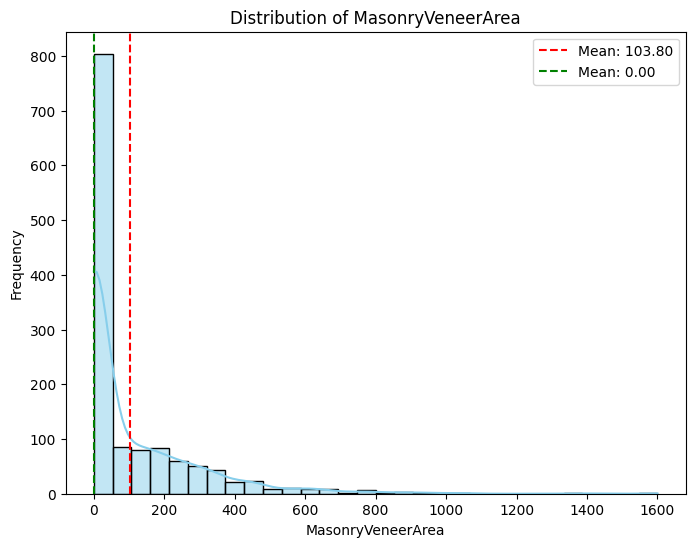

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['MasonryVeneerArea'], color='skyblue',kde=True, bins=30)
plt.title('Distribution of MasonryVeneerArea')
plt.xlabel('MasonryVeneerArea')
plt.ylabel('Frequency')

mean_value = train_data['MasonryVeneerArea'].mean()
median_value = train_data['MasonryVeneerArea'].median()

plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='green', linestyle='--', label=f'Mean: {median_value:.2f}')
plt.legend()
plt.show()

Replacing the missing values in **`MasonryVeneerArea`** with it's Median.

In [ ]:
median=train_data['MasonryVeneerArea'].median()
train_data['MasonryVeneerArea'].fillna(median,inplace=True)
val_data['MasonryVeneerArea'].fillna(median,inplace=True)
test_data['MasonryVeneerArea'].fillna(median,inplace=True)

Investigate the **`BasementExposure`** entries that have missing values.

In [ ]:
train_data[train_data['BasementExposure'].isnull()]

DwellingTypeSubClass ZoningClassification  StreetFrontage  LotSize  \
29                     50                   RL            80.0    17120   
73                     90                   RL            75.0    10125   
84                     20                   RL            60.0    11100   
128                    90                   RL            70.0     9842   
134                    60                   RL            65.0    14006   
173                    90                   RL             NaN     8544   
245                    20                   RL           100.0    21750   
325                    20                   RL            60.0     7200   
394                    90                   RH            60.0     8400   
410                   190                   RM            70.0     5600   
425                    90                   RL            65.0     6040   
444                    20                   RL            67.0     8777   
445                    20                   RL             NaN    11500   
475                    85                   RL            64.0     7301   
516                    20                   RL            50.0     5000   
533                    20                   RL            60.0     9060   
565                    90                   RL            64.0     7018   
580                    20                   RL            77.0     8335   
687                    20                   RL            74.0    10206   
730                    20                   RL            60.0     7200   
731                    90                   RL            60.0     7200   
831                    90                   RL            60.0     8544   
852                    60                   RL             NaN    14762   
913                    90                   RL            75.0     9825   
999                    90                   RL            72.0    10791   
1008                   50                   RM            52.0     6240   
1037                   50                   RL            50.0     8405   
1038                   20                   RL             NaN    13680   
1095                   20                   RL             NaN     6627   
1179                   20                   RL             NaN     8339   
1215                  190                   RL            60.0    10800   
1256                   90                   RL            64.0     7018   
1269                   20                   RL            60.0     7200   

     RoadAccessType LotShape LandFlatness UtilitiesAvailable LotConfiguration  \
29             Pave      Reg          Lvl             AllPub           Inside   
73             Pave      Reg          Lvl             AllPub           Inside   
84             Pave      Reg          Low             AllPub           Inside   
128            Pave      Reg          Lvl             AllPub              FR2   
134            Pave      IR1          Lvl             AllPub           Inside   
173            Pave      Reg          Lvl             AllPub           Inside   
245            Pave      Reg          Lvl             AllPub           Inside   
325            Pave      Reg          Lvl             AllPub           Inside   
394            Pave      Reg          Lvl             AllPub           Inside   
410            Pave      Reg          Lvl             AllPub           Inside   
425            Pave      Reg          Lvl             AllPub           Inside   
444            Pave      Reg          Lvl             AllPub           Inside   
445            Pave      IR1          Lvl             AllPub          CulDSac   
475            Pave      Reg          Lvl             AllPub           Corner   
516            Pave      Reg          Low             AllPub           Inside   
533            Pave      Reg          Lvl             AllPub           Inside   
565            Pave      Reg          Bnk             AllPub           Inside

- Entry number 134 has only one column (`BasementExposure`) that have missing values.

Replace the entry with the `TA` value.

In [ ]:
train_data.at[134, 'BasementExposure'] = 'TA'
train_data.iloc[134,27:37]

BasementHeight            Gd
BasementCondition         TA
BasementExposure          TA
BasementFinishType1      Unf
BasementFinishedSF1        0
BasementFinishType2      Unf
BasementFinishedSF2        0
BasementUnfinishedSF     936
TotalBasementSF          936
HeatingType             GasA
Name: 134, dtype: object

Replace the missing values of columns `BasementHeight`, `BasementCondition`, `BasementExposure`, `BasementFinishType1`and `BasementFinishType2`with **No Basement** as they haven't had basement.

In [ ]:
columns = ['BasementHeight', 'BasementCondition', 'BasementExposure', 'BasementFinishType1', 'BasementFinishType2']
for column in columns:
    train_data[column].fillna('No Basement', inplace=True)
    val_data[column].fillna('No Basement', inplace=True)
    test_data[column].fillna('No Basement', inplace=True)


Checking that the missing values are replaced.

In [ ]:
for column in columns:
    print("Unique values in column ",column,train_data[column].unique())

Unique values in column  BasementHeight ['Gd' 'TA' 'Fa' 'Ex' 'No Basement']
Unique values in column  BasementCondition ['TA' 'Fa' 'No Basement' 'Gd' 'Po']
Unique values in column  BasementExposure ['No' 'Av' 'Mn' 'Gd' 'No Basement' 'TA']
Unique values in column  BasementFinishType1 ['Rec' 'Unf' 'GLQ' 'BLQ' 'ALQ' 'LwQ' 'No Basement']
Unique values in column  BasementFinishType2 ['Unf' 'GLQ' 'No Basement' 'Rec' 'BLQ' 'LwQ' 'ALQ']


Replace the missing value in **`ElectricalSystem`** column with the mode as it's only one value.

In [ ]:
mode=train_data['ElectricalSystem'].mode()[0]
train_data['ElectricalSystem'].fillna(mode,inplace=True)
val_data['ElectricalSystem'].fillna(mode,inplace=True)
test_data['ElectricalSystem'].fillna(mode,inplace=True)

Replace the missing values of columns `GarageLocation`, `GarageFinish`, `GarageQuality` and `GarageCondition` with **No Garage** as they haven't had Garage , and replace the missing values in `GarageYearBuilt` with zero.

In [ ]:
columns = ['GarageLocation', 'GarageYearBuilt', 'GarageFinish', 'GarageQuality', 'GarageCondition']

for column in columns:
    if column=='GarageYearBuilt':
      train_data[column].fillna(0, inplace=True)
      val_data[column].fillna(0, inplace=True)
      test_data[column].fillna(0, inplace=True)

    else:
      train_data[column].fillna('No Garage', inplace=True)
      val_data[column].fillna('No Garage', inplace=True)
      test_data[column].fillna('No Garage', inplace=True)

Checking that the missing values are replaced.

In [ ]:
for column in columns:
    print("Unique values in column ",column,train_data[column].unique())

Unique values in column  GarageLocation ['Attchd' 'Detchd' 'No Garage' 'CarPort' 'Basment' 'BuiltIn' '2Types']
Unique values in column  GarageYearBuilt [1936. 2001. 1974.    0. 1922. 1966. 1975. 1960. 1969. 1954. 1961. 2007.
 1980. 2008. 1957. 1947. 1997. 2005. 1940. 2003. 1992. 1991. 1949. 1990.
 1951. 2000. 1965. 1952. 1976. 2002. 2006. 1970. 1971. 1968. 1977. 1948.
 1920. 1999. 1921. 1996. 1964. 1998. 1967. 1995. 1963. 1959. 1958. 1941.
 1928. 1946. 1993. 1956. 1988. 1962. 1987. 1926. 1972. 1989. 1973. 2004.
 1924. 1994. 1939. 1981. 1978. 1953. 1986. 2009. 1983. 1979. 1982. 1985.
 1935. 1932. 1950. 1910. 1929. 1915. 2010. 1955. 1925. 1937. 1930. 1914.
 1942. 1938. 1923. 1916. 1931. 1984. 1945. 1918. 1908. 1900. 1906. 1934.]
Unique values in column  GarageFinish ['Fin' 'RFn' 'No Garage' 'Unf']
Unique values in column  GarageQuality ['Fa' 'TA' 'No Garage' 'Gd' 'Po' 'Ex']
Unique values in column  GarageCondition ['TA' 'No Garage' 'Fa' 'Po' 'Gd' 'Ex']


In [ ]:
train_data.isnull().sum()[train_data.isnull().any()]

StreetFrontage    237
dtype: int64

* Now the train data has only the column **`StreetFrontage`** we will predict further.

Verifying if the same applies for the test data.

In [ ]:
test_data.isnull().sum()[test_data.isnull().any()]

ZoningClassification       4
StreetFrontage           227
UtilitiesAvailable         2
ExteriorCovering1          1
ExteriorCovering2          1
BasementFinishedSF1        1
BasementFinishedSF2        1
BasementUnfinishedSF       1
TotalBasementSF            1
BasementFullBathrooms      2
BasementHalfBathrooms      2
KitchenQuality             1
HomeFunctionality          2
GarageSizeInCars           1
GarageSizeInSF             1
SaleType                   1
dtype: int64

* The test data contains additional null values in extra columns compared to the training data, necessitating further handling.
* For the **`StreetFrontage`** column, we will handle the null values by predicting them, similar to how we will handle them in the training data.


In [ ]:
test_data.shape

(1459, 73)

Inspecting the data types of other columns with null values.

In [ ]:
columns_with_nulls = test_data.columns[test_data.isnull().any()]

dtypes_with_nulls = test_data[columns_with_nulls].dtypes
print(dtypes_with_nulls)

ZoningClassification      object
StreetFrontage           float64
UtilitiesAvailable        object
ExteriorCovering1         object
ExteriorCovering2         object
BasementFinishedSF1      float64
BasementFinishedSF2      float64
BasementUnfinishedSF     float64
TotalBasementSF          float64
BasementFullBathrooms    float64
BasementHalfBathrooms    float64
KitchenQuality            object
HomeFunctionality         object
GarageSizeInCars         float64
GarageSizeInSF           float64
SaleType                  object
dtype: object


The approach we will adopt to handle null values in the test data involves filling them with values from our **training data**, considering the column data types. This is because addressing each column separately assumes access to testing data during inference time, which is not available. Therefore, we rely solely on the information present in the training data during the model training phase.

> * For columns with object data types, we will fill the null values with the ***mode*** value of the corresponding column from the training data.
> * For numeric data type columns, we will fill the null values with the ***mean*** value of the same column from the training data.


In [ ]:
#  get the object columns that has nulls
object_columns = dtypes_with_nulls[dtypes_with_nulls == 'object'].index

for col in object_columns:
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)
    val_data[col].fillna(train_data[col].mode()[0], inplace=True)

# get the numeric columns excluding 'StreetFrontage' that has nulls
numeric_columns = dtypes_with_nulls[dtypes_with_nulls != 'object'].index
numeric_columns = numeric_columns.drop('StreetFrontage')

# Replace null values in numeric columns with mean from train_data
for col in numeric_columns:
    test_data[col].fillna(train_data[col].mean(), inplace=True)
    val_data[col].fillna(train_data[col].mean(), inplace=True)


Confirming that all null values in the test data have been imputed, with only the null values in the **`StreetFrontage`** column remaining.

In [ ]:
test_data.isnull().sum()[test_data.isnull().any()]

StreetFrontage    227
dtype: int64

### 4.3) Outliers and Skewness

In [ ]:
numeric_cols = train_data.select_dtypes(include=['number'])

In [ ]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   StreetFrontage            1077 non-null   float64
 1   LotSize                   1314 non-null   int64  
 2   OverallMaterialAndFinish  1314 non-null   int64  
 3   OverallCondition          1314 non-null   int64  
 4   YearBuilt                 1314 non-null   int64  
 5   YearRemodeled             1314 non-null   int64  
 6   MasonryVeneerArea         1314 non-null   float64
 7   BasementFinishedSF1       1314 non-null   int64  
 8   BasementFinishedSF2       1314 non-null   int64  
 9   BasementUnfinishedSF      1314 non-null   int64  
 10  TotalBasementSF           1314 non-null   int64  
 11  FirstFloorSF              1314 non-null   int64  
 12  SecondFloorSF             1314 non-null   int64  
 13  LowQualityFinishedSF      1314 non-null   int64  
 14  AboveGra

* We have **36** numeric columns in our dataset. Some of these columns represent categorical rates which whave discrete values, where we won't need to consider their distribution. However, there are others that might contain large continuous values, such as areas and prices, which require us to handle their distributions carefully.

In [ ]:
for col in numeric_cols:
    unique_values = numeric_cols[col].unique()
    if len(unique_values) <= 10:
        print("Column:", col)
        print("Unique values:", unique_values)
        print("\n")


Column: OverallMaterialAndFinish
Unique values: [ 7  5  3  4  6  8  9 10  1  2]


Column: OverallCondition
Unique values: [7 5 8 3 4 6 9 2 1]


Column: BasementFullBathrooms
Unique values: [0 1 2 3]


Column: BasementHalfBathrooms
Unique values: [0 1 2]


Column: FullBathrooms
Unique values: [1 2 3 0]


Column: HalfBathrooms
Unique values: [1 0 2]


Column: BedroomAbvGr
Unique values: [3 2 4 5 0 6 1 8]


Column: KitchenAbvGr
Unique values: [1 2 3 0]


Column: Fireplaces
Unique values: [1 0 2 3]


Column: GarageSizeInCars
Unique values: [1 2 0 3 4]


Column: PoolAreaSF
Unique values: [  0 576 648 555 480 512 519 738]


Column: YearSold
Unique values: [2006 2009 2008 2007 2010]




Removing the columns we indicated with small unique values that can be discrete.

In [ ]:
numeric_cols = numeric_cols.drop(['YearSold',
                                  'PoolAreaSF',
                                  'GarageSizeInCars','Fireplaces','KitchenAbvGr',
                                  'BedroomAbvGr','HalfBathrooms','FullBathrooms',
                                  'BasementHalfBathrooms','BasementFullBathrooms'
                                 ,'OverallMaterialAndFinish','OverallCondition' ],axis=1)

In [ ]:
print('Number of numeric columns after removing discrete numeric columns : ',numeric_cols.shape[1])

Number of numeric columns after removing discrete numeric columns :  24


Visualizing columns boxplots to indicate present outliers

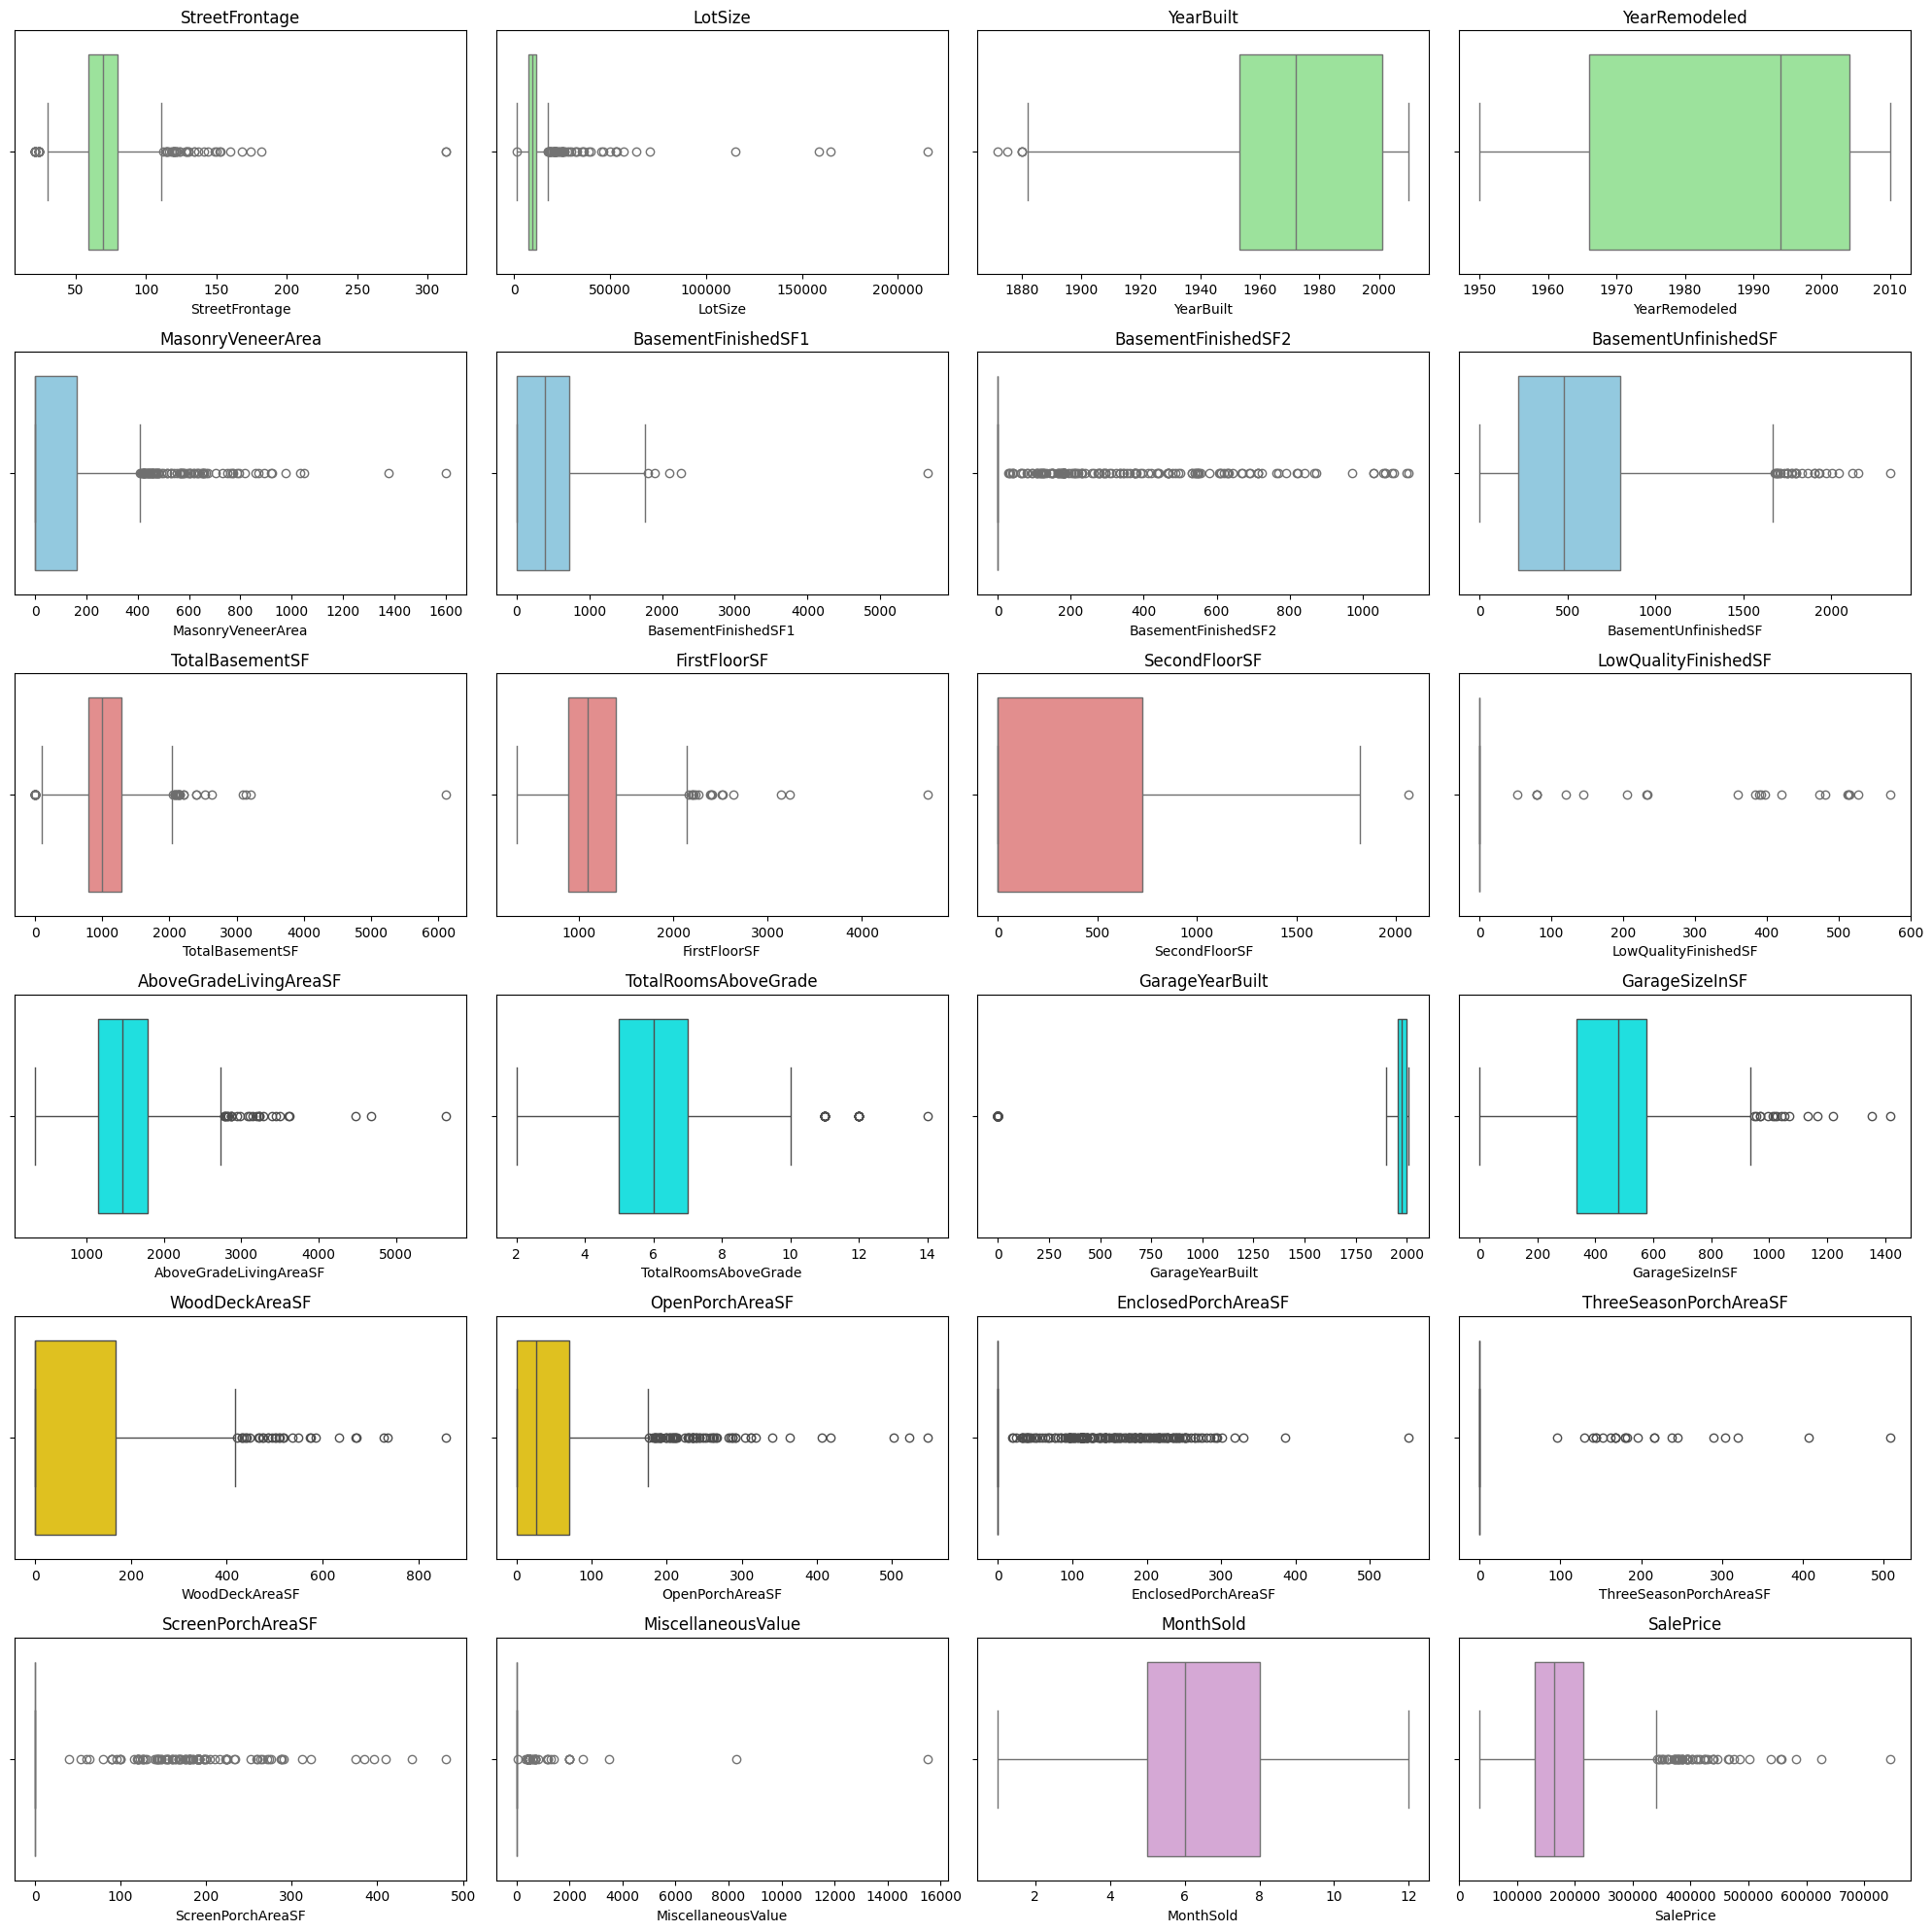

In [ ]:
num_cols = numeric_cols.columns
num_cols_chunks = [num_cols[i:i+4] for i in range(0, len(num_cols), 4)]

row_colors = ['lightgreen', 'skyblue', 'lightcoral', 'cyan','gold','plum']

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i, chunk in enumerate(num_cols_chunks):
    # Create a subset DataFrame with 4 columns
    subset_df = numeric_cols[chunk]

    # Plot boxplots for each column in the chunk
    for j, col in enumerate(chunk):
        # Set color for the row
        row_color = row_colors[i % len(row_colors)]  # Use modulo operator to cycle through colors

        sns.boxplot(x=subset_df[col], ax=axes[i, j], color=row_color)
        axes[i, j].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


 * **```MonthSold```** and **```YearModeled```** appear to have no outliers presented in them,so we will remove them.

In [ ]:
numeric_cols = numeric_cols.drop(['MonthSold','YearRemodeled'],axis=1)

Inspecting outliers and their percentages presented in each column, to know and understand how can we find a way tailored for each column to deal with them.

In [ ]:
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    outliers = series[((series < lower_limit) | (series > upper_limit))]
    return lower_limit, upper_limit, outliers

In [ ]:
for col in numeric_cols.columns:
    lower_limit, upper_limit, outliers = find_outliers(numeric_cols[col])
    total_outliers = len(outliers)
    total_data_points = len(numeric_cols[col])
    percentage_outliers = (total_outliers / total_data_points) * 100

    print("Column:", col)
    # print("Lower Limit:", lower_limit)
    # print("Upper Limit:", upper_limit)
    print("Number of outliers:", total_outliers)
    print("Percentage of outliers:", "{:.2f}%".format(percentage_outliers))
    print("\n")

Column: StreetFrontage
Number of outliers: 78
Percentage of outliers: 5.94%


Column: LotSize
Number of outliers: 62
Percentage of outliers: 4.72%


Column: YearBuilt
Number of outliers: 5
Percentage of outliers: 0.38%


Column: MasonryVeneerArea
Number of outliers: 89
Percentage of outliers: 6.77%


Column: BasementFinishedSF1
Number of outliers: 5
Percentage of outliers: 0.38%


Column: BasementFinishedSF2
Number of outliers: 143
Percentage of outliers: 10.88%


Column: BasementUnfinishedSF
Number of outliers: 28
Percentage of outliers: 2.13%


Column: TotalBasementSF
Number of outliers: 53
Percentage of outliers: 4.03%


Column: FirstFloorSF
Number of outliers: 15
Percentage of outliers: 1.14%


Column: SecondFloorSF
Number of outliers: 1
Percentage of outliers: 0.08%


Column: LowQualityFinishedSF
Number of outliers: 22
Percentage of outliers: 1.67%


Column: AboveGradeLivingAreaSF
Number of outliers: 27
Percentage of outliers: 2.05%


Column: TotalRoomsAboveGrade
Number of outlier

* Based on the number of outliers presented they seem few,but because our dataset is very small,they also represent a large portion of it.
* Since most of the columns represent areas and house parts sizes and prices,it is very likey to find the variation and the existence of numerous outliers,and these might not be random outliers.

Let's delve deeper into the distribution of these columns and explore potential methods for reducing noise from outliers through transformations.


In [ ]:
numerical_cols = numeric_cols.columns
numerical_cols

Index(['StreetFrontage', 'LotSize', 'YearBuilt', 'MasonryVeneerArea',
       'BasementFinishedSF1', 'BasementFinishedSF2', 'BasementUnfinishedSF',
       'TotalBasementSF', 'FirstFloorSF', 'SecondFloorSF',
       'LowQualityFinishedSF', 'AboveGradeLivingAreaSF',
       'TotalRoomsAboveGrade', 'GarageYearBuilt', 'GarageSizeInSF',
       'WoodDeckAreaSF', 'OpenPorchAreaSF', 'EnclosedPorchAreaSF',
       'ThreeSeasonPorchAreaSF', 'ScreenPorchAreaSF', 'MiscellaneousValue',
       'SalePrice'],
      dtype='object')

Define the common transformation methods used to handle skewed distributions, especially right-skewed distributions, as most of the columns from the previous box plot exhibit right skewness.

In [ ]:
transformations = {'Square Root': np.sqrt,
                   'Cube Root': np.cbrt,
                   'Log': np.log,
                   'Log1p': np.log1p
                   }

Creating some functions that can help inspect the outliers of each column deeply,by plotting the columns distributions and by applying various transformations technique,to find the best suitable method to treat the outliers and the skewness.

In [ ]:
def inspect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Calculate 10th and 90th percentiles
    percentile_10 = column.quantile(0.10)
    percentile_90 = column.quantile(0.90)

    outliers = column[(column < lower_limit) | (column > upper_limit)]
    total_outliers = len(outliers)
    total_data_points = len(column)
    percentage_outliers = (total_outliers / total_data_points) * 100

    print("Column:", column.name)
    print("Lower Limit:", lower_limit)
    print("Upper Limit:", upper_limit)
    print("10th Percentile:", percentile_10)
    print("90th Percentile:", percentile_90)
    print("Number of outliers:", total_outliers)
    print("Percentage of outliers:", "{:.2f}%".format(percentage_outliers))
    print("Outliers:")
    print(outliers)
    print("\n")

In [ ]:
def analyze_outliers(column, transformations):
    print("Original Column:", column.name)
    lower_limit, upper_limit, outliers = find_outliers(column)
    total_outliers = len(outliers)
    total_data_points = len(column)
    percentage_outliers = (total_outliers / total_data_points) * 100
    print("Number of outliers:", total_outliers)
    print("Percentage of outliers:", "{:.2f}%".format(percentage_outliers))
    print("\n")

    # Transformation analysis
    for trans_name, trans_func in transformations.items():
        transformed_data = trans_func(column)
        print("Transformation:", trans_name)
        lower_limit, upper_limit, outliers = find_outliers(transformed_data)
        total_outliers = len(outliers)
        total_data_points = len(transformed_data)
        percentage_outliers = (total_outliers / total_data_points) * 100
        print("Number of outliers:", total_outliers)
        print("Percentage of outliers:", "{:.2f}%".format(percentage_outliers))
        print("\n")

In [ ]:
def plot_distribution(column, transformations):
    # Plot original distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(column, kde=True, color='orange', bins=30)
    plt.title('Original Distribution Plot for ' + column.name)
    plt.xlabel(column.name)
    plt.ylabel('Frequency')
    plt.show()

    # Calculate and print lower and upper limits
    lower_limit = column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25))
    upper_limit = column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25))
    print("Lower Limit for", column.name + ":", lower_limit)
    print("Upper Limit for", column.name + ":", upper_limit)

    # Plot distributions with different transformations
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle('Distribution with Different Transformations for ' + column.name)

    for i, (trans_name, trans_func) in enumerate(transformations.items()):
        transformed_data = trans_func(column)
        sns.histplot(transformed_data, kde=True, ax=axes[i//2, i%2], color='orange', bins=30)
        axes[i//2, i%2].set_title(trans_name)
        axes[i//2, i%2].set_xlabel(column.name + ' (' + trans_name + ')')

    plt.tight_layout()
    plt.show()

In [ ]:
def replace_outliers(column):
    # Calculate IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers with upper and lower limits
    column_clipped = np.where(column < lower_limit, lower_limit, column)
    column_clipped = np.where(column_clipped > upper_limit, upper_limit, column_clipped)

    # Print outliers after replacement
    outliers = column_clipped[(column_clipped < lower_limit) | (column_clipped > upper_limit)]
    print("Outliers after replacement:")
    print(outliers)

    # Plot distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(column_clipped, kde=True, color='green', bins=50)
    plt.title('Distribution Plot for ' + column.name + ' (Outliers Replaced)')
    plt.xlabel(column.name)
    plt.ylabel('Frequency')
    plt.show()

    return column_clipped



<font size="+2" color="black"> **```StreetFrontage```**</font>

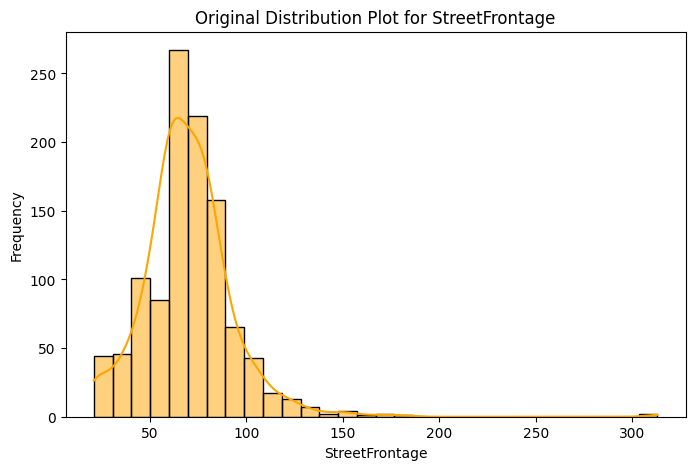

Lower Limit for StreetFrontage: 27.5
Upper Limit for StreetFrontage: 111.5


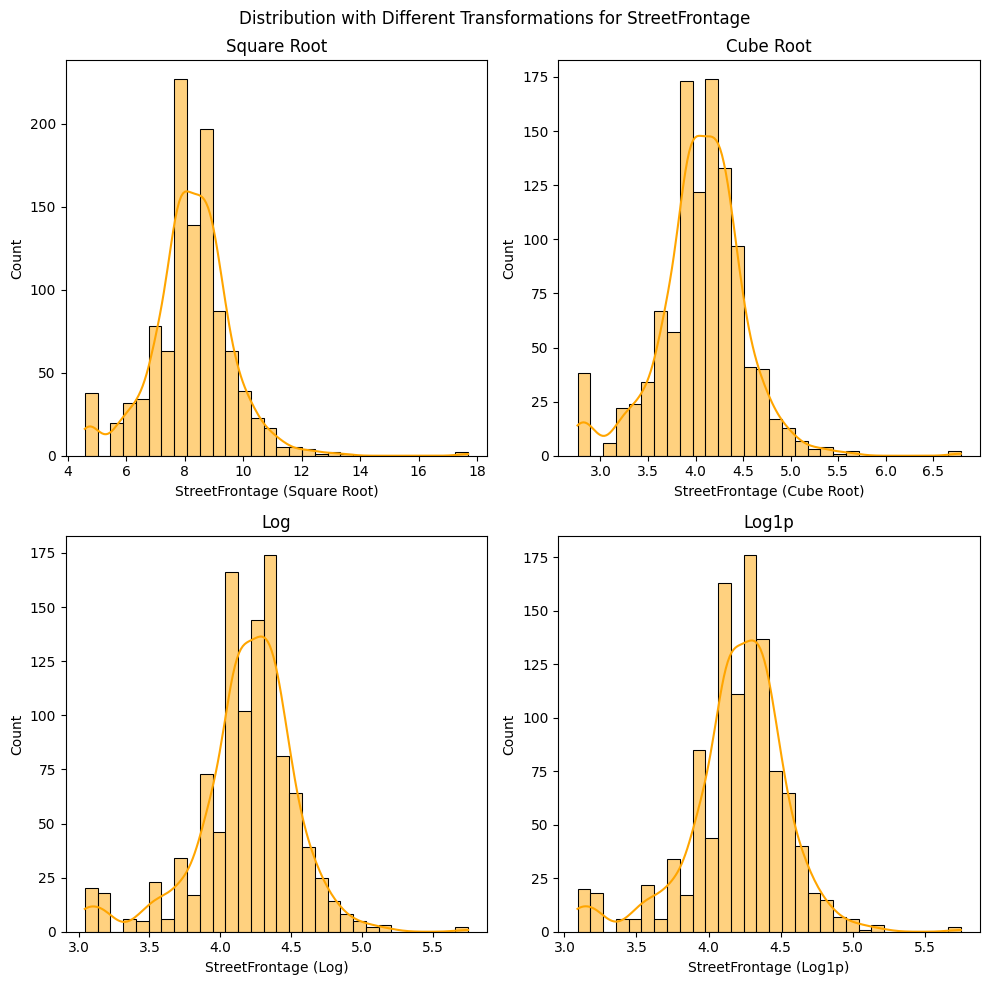

In [ ]:
plot_distribution(train_data[numerical_cols[0]],transformations)

* **`Log Transformations`** looks to handle the distribution of the column best,but let's see their effect on the outliers.

In [ ]:
analyze_outliers(train_data[numerical_cols[0]],transformations)

Original Column: StreetFrontage
Number of outliers: 78
Percentage of outliers: 5.94%


Transformation: Square Root
Number of outliers: 84
Percentage of outliers: 6.39%


Transformation: Cube Root
Number of outliers: 84
Percentage of outliers: 6.39%


Transformation: Log
Number of outliers: 96
Percentage of outliers: 7.31%


Transformation: Log1p
Number of outliers: 96
Percentage of outliers: 7.31%




In [ ]:
inspect_outliers(train_data[numerical_cols[0]])

Column: StreetFrontage
Lower Limit: 27.5
Upper Limit: 111.5
10th Percentile: 43.0
90th Percentile: 95.0
Number of outliers: 78
Percentage of outliers: 5.94%
Outliers:
27       24.0
43       21.0
44       24.0
46      130.0
52       24.0
64      116.0
111      21.0
130      24.0
135      21.0
142     124.0
152     122.0
182     128.0
232      21.0
270     120.0
319     160.0
323     122.0
331     115.0
372     120.0
392     141.0
393     120.0
414      24.0
449      21.0
450     114.0
464     121.0
492     144.0
511     130.0
558     137.0
566      21.0
567      21.0
571     118.0
573      24.0
575      21.0
625      24.0
639     120.0
641     313.0
679     168.0
681      24.0
685     118.0
708      24.0
720     124.0
722     149.0
726     313.0
734     134.0
751     129.0
757      24.0
771      21.0
785     115.0
797      24.0
812      21.0
814      21.0
821      21.0
838     112.0
841     120.0
854      24.0
864      21.0
865     114.0
866      24.0
890     134.0
896      21.0
941    

* By inspecting the outliers in the column we can find most of the outliers are very close to the upper and lower limits of the column,except for the 2 records **934** and **1127** which have large outliers values and might represent a very useful data so we won't replace them,but other values we can replace by upper and lower since they are very close.

Outliers after replacement:
[]


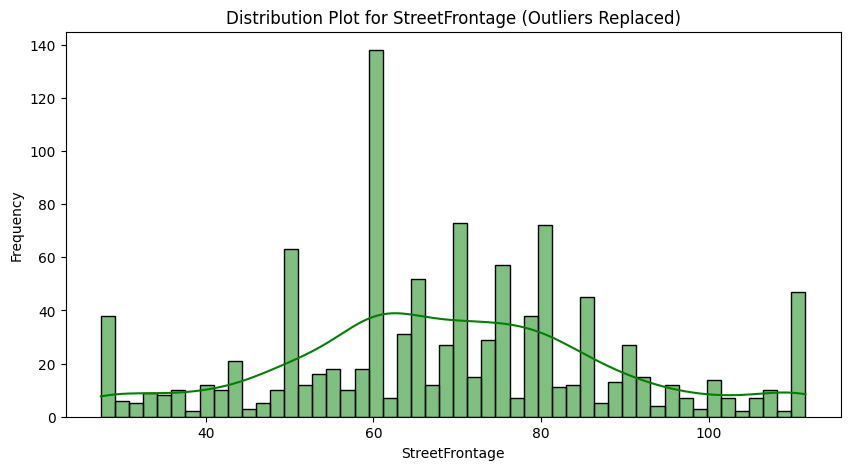

In [ ]:
# save the values of the outliers before replacing
original_column = train_data[numerical_cols[0]].copy()

# replacing outliers with lower and upper limit
train_data[numerical_cols[0]] = replace_outliers(train_data[numerical_cols[0]])

# re assign back the 2 records 934 and 1127 to the original outlier values
train_data.loc[[934, 1127], numerical_cols[0]] = original_column.loc[[934, 1127]]

* We can observe that the distribution of the column is now closer to a normal distribution, and the effect of skewness has been diminished.

In [ ]:
inspect_outliers(train_data[numerical_cols[0]])

Column: StreetFrontage
Lower Limit: 27.5
Upper Limit: 111.5
10th Percentile: 43.0
90th Percentile: 95.0
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: StreetFrontage, dtype: float64)




* All outliers in this column have been replaced, except for the two outliers we chose to retain in order to preserve their importance.


<font size="+2" color="black">**```LotSize```**</font>

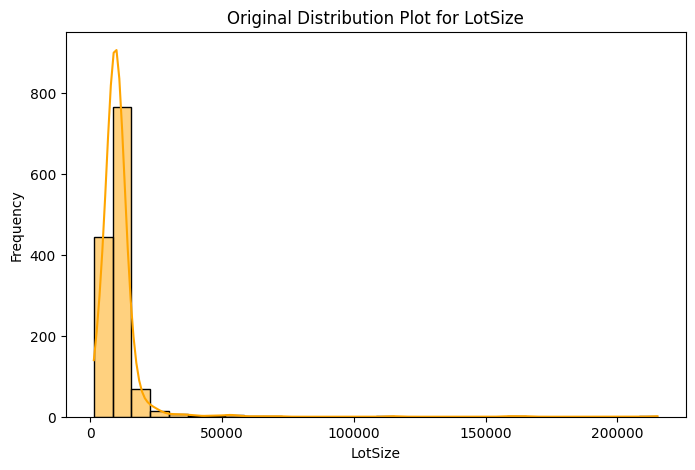

Lower Limit for LotSize: 1465.875
Upper Limit for LotSize: 17716.875


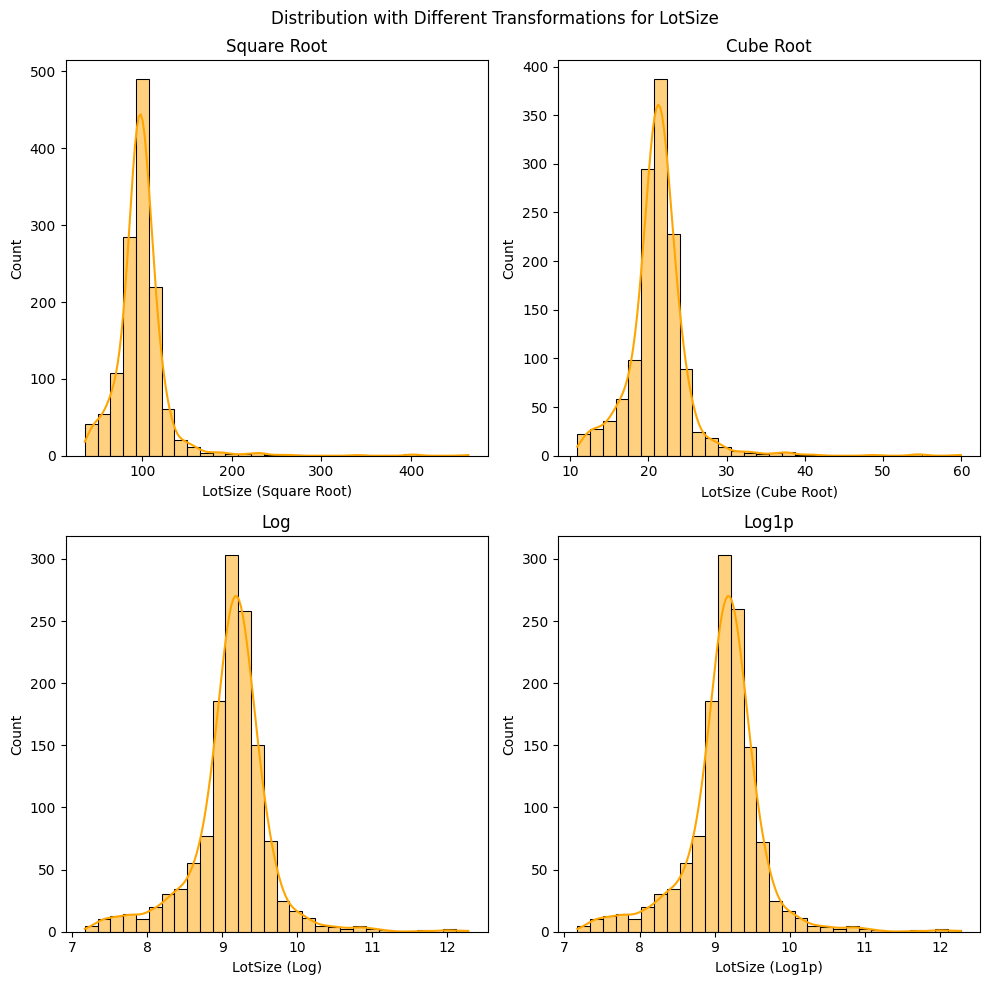

In [ ]:
plot_distribution(train_data[numerical_cols[1]],transformations)

* Additionally, for this column, Log Transformations appear to handle the skewness more effectively. However, let's examine the impact on the outliers.

In [ ]:
analyze_outliers(train_data[numerical_cols[1]],transformations)

Original Column: LotSize
Number of outliers: 62
Percentage of outliers: 4.72%


Transformation: Square Root
Number of outliers: 106
Percentage of outliers: 8.07%


Transformation: Cube Root
Number of outliers: 119
Percentage of outliers: 9.06%


Transformation: Log
Number of outliers: 123
Percentage of outliers: 9.36%


Transformation: Log1p
Number of outliers: 123
Percentage of outliers: 9.36%




* Again, for this column too, transformations seem ineffective in managing the outliers; instead, they have increased their presence.So we can check another way of handling them in order to both reduce the outliers presented and handle column distribution

In [ ]:
inspect_outliers(train_data[numerical_cols[1]])

Column: LotSize
Lower Limit: 1465.875
Upper Limit: 17716.875
10th Percentile: 5000.0
90th Percentile: 14371.7
Number of outliers: 62
Percentage of outliers: 4.72%
Outliers:
6        32668
23       24090
54       70761
55       21872
68       39104
104      21930
132      25095
162      21000
217      29959
235      32463
245      21750
255      46589
261      25000
269      20896
331      21286
333      20544
349      24682
392      31770
393      19296
454      19900
470      25339
492      21384
499      20431
503      21453
510      18890
511      40094
525      18450
553     115149
582     159000
601      53227
612      23595
641      63887
645      20781
679      23257
685      35760
714      28698
726      27650
734      17755
749      18800
784      22950
786      26178
820      17871
870      22420
877      45600
890      19378
894     164660
946      36500
948      25286
961      18386
963     215245
968      21695
1051      1300
1066     50271
1090     26142
1110     25419
11

* All outliers in these columns are very large, exceeding the upper limit. Replacing them with the upper limit may not be ideal since they often represent the size of properties, and limiting them could discard valuable information.

* Some outliers are exceptionally high compared to others, like records **553**, **582**, **894**, and **963**. These values need closer examination to determine if they represent legitimate data points or if they are outliers resulting from errors or randomness.

In [ ]:
train_data.iloc[[553,582,894,963]]

DwellingTypeSubClass ZoningClassification  StreetFrontage  LotSize  \
553                   20                   RL             NaN   115149   
582                   50                   RL             NaN   159000   
894                  190                   RL             NaN   164660   
963                   20                   RL           111.5   215245   

    RoadAccessType LotShape LandFlatness UtilitiesAvailable LotConfiguration  \
553           Pave      IR2          Low             AllPub          CulDSac   
582           Pave      IR2          Low             AllPub          CulDSac   
894           Grvl      IR1          HLS             AllPub           Corner   
963           Pave      IR3          Low             AllPub           Inside   

    SlopeOfProperty Neighborhood ProximityToConditions1  \
553             Sev      ClearCr                   Norm   
582             Sev      ClearCr                   Norm   
894             Sev       Timber                   Norm   
963             Sev       Timber                   Norm   

    ProximityToConditions2 DwellingType DwellingStyle  \
553                   Norm         1Fam        1Story   
582                   Norm         1Fam        1.5Fin   
894                   Norm       2fmCon        1.5Fin   
963                   Norm         1Fam        1Story   

     OverallMaterialAndFinish  OverallCondition  YearBuilt  YearRemodeled  \
553                         7                 5       1971           2002   
582                         6                 7       1958           2006   
894                         5                 6       1965           1965   
963                         7                 5       1965           1965   

    RoofStyle RoofMaterial ExteriorCovering1 ExteriorCovering2  \
553     Gable      CompShg           Plywood           Plywood   
582     Gable      CompShg           Wd Sdng           HdBoard   
894     Gable      CompShg           Plywood           Plywood   
963       Hip      CompShg           BrkFace           BrkFace   

     MasonryVeneerArea ExteriorQuality ExteriorCondition FoundationType  \
553              351.0              TA                TA         CBlock   
582              472.0              Gd                TA         CBlock   
894                0.0              TA                TA         CBlock   
963                0.0              TA                TA         CBlock   

    BasementHeight BasementCondition BasementExposure BasementFinishType1  \
553             Gd                TA               Gd                 GLQ   
582             Gd                TA               Gd                 Rec   
894             TA                TA               Gd                 ALQ   
963             Gd                TA               Gd                 ALQ   

     BasementFinishedSF1 BasementFinishType2  BasementFinishedSF2  \
553                 1219                 Unf                    0   
582                  697                 Unf                    0   
894                 1249                 BLQ                  147   
963                 1236                 Rec                  820   

     BasementUnfinishedSF  TotalBasementSF HeatingType  \
553                   424             1643        GasA   
582                   747             1444        GasA   
894                   103             1499        GasA   
963                    80             2136        GasW   

    HeatingQualityCondition CentralAirConditioning ElectricalSystem  \
553                      TA                      Y            SBrkr   
582                      Gd                      Y            SBrkr   
894                      Ex                      Y            SBrkr   
963                      TA                      Y            SBrkr   

     FirstFloorSF  SecondFloorSF  LowQualityFinishedSF  \
553          1824              0                     0   
582          1444            700                     0   
894 

* Upon analyzing properties with LotSize values in this large range, we found that their remaining features appear typical for lands of similar size. This indicates that they represent exisiting-real rare entries . Removing them would not be efficient as they provide valuable information about exceptional properties that exist.

In [ ]:
# train_data[numerical_cols[1]] = replace_outliers(train_data[numerical_cols[1]])


<font size="+2" color="black">**```YearBuilt```**</font>

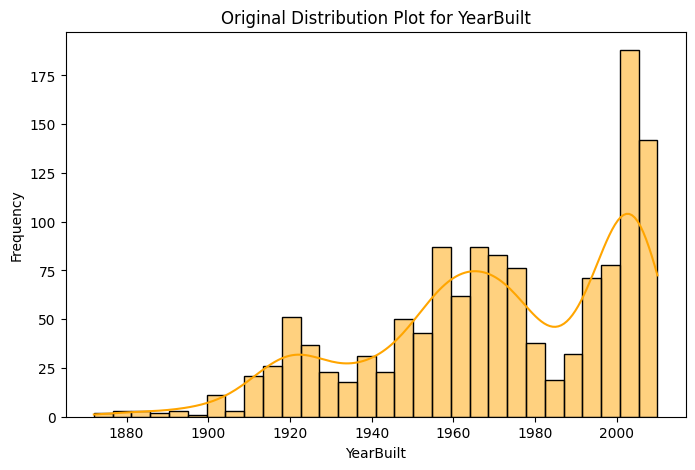

Lower Limit for YearBuilt: 1881.625
Upper Limit for YearBuilt: 2072.625


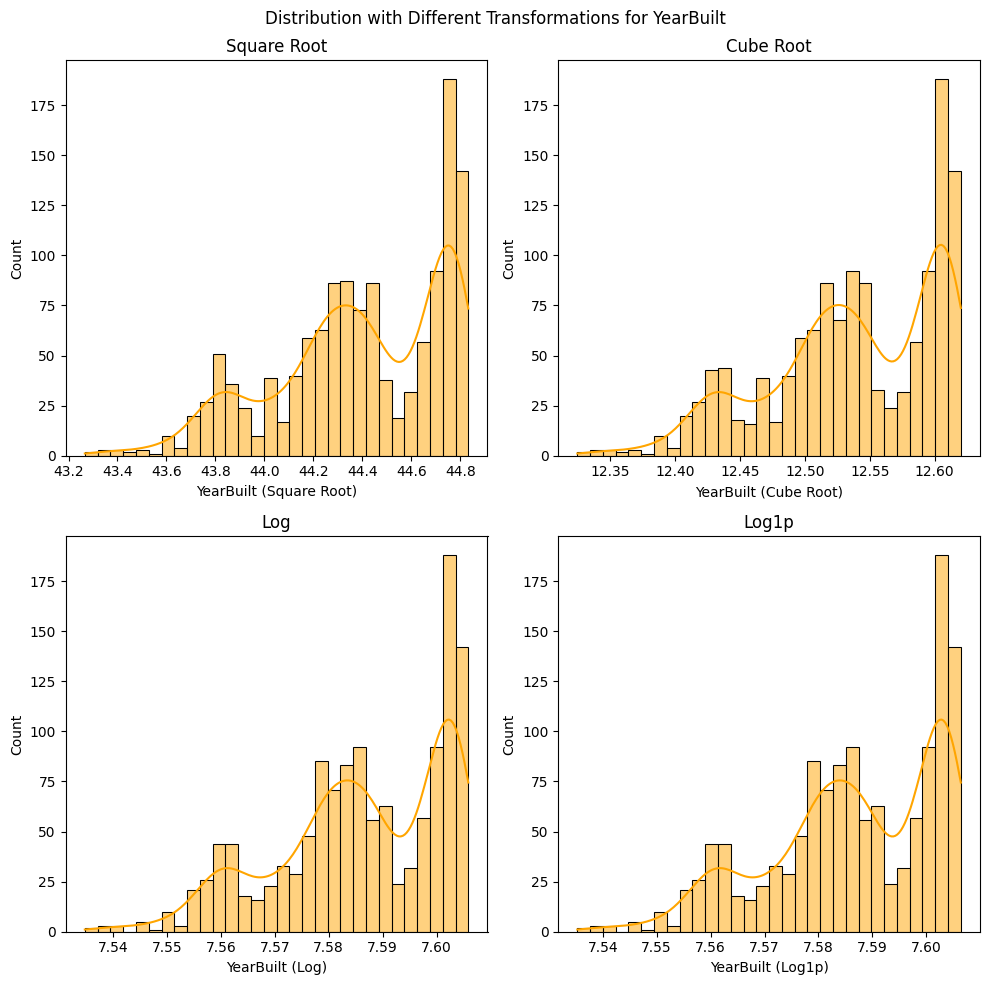

In [ ]:
plot_distribution(train_data[numerical_cols[2]],transformations)

No transformation method effectively addresses the left-skewed distribution of this column. However, considering the characteristics of left-skewed distributions, we can explore the potential of Box-Cox transformation as a viable option for transforming this column.

In [ ]:
analyze_outliers(train_data[numerical_cols[2]],transformations)

Original Column: YearBuilt
Number of outliers: 5
Percentage of outliers: 0.38%


Transformation: Square Root
Number of outliers: 6
Percentage of outliers: 0.46%


Transformation: Cube Root
Number of outliers: 6
Percentage of outliers: 0.46%


Transformation: Log
Number of outliers: 6
Percentage of outliers: 0.46%


Transformation: Log1p
Number of outliers: 6
Percentage of outliers: 0.46%




In [ ]:
inspect_outliers(train_data[numerical_cols[2]])

Column: YearBuilt
Lower Limit: 1881.625
Upper Limit: 2072.625
10th Percentile: 1923.3
90th Percentile: 2006.0
Number of outliers: 5
Percentage of outliers: 0.38%
Outliers:
211     1875
368     1880
650     1872
961     1880
1284    1880
Name: YearBuilt, dtype: int64




* The outliers observed in this column likely denote the actual years when the properties were built. However, since they  are very close to the lower limit,so replacing them can serve to diminish the noise within the dataset.

Outliers after replacement:
[]


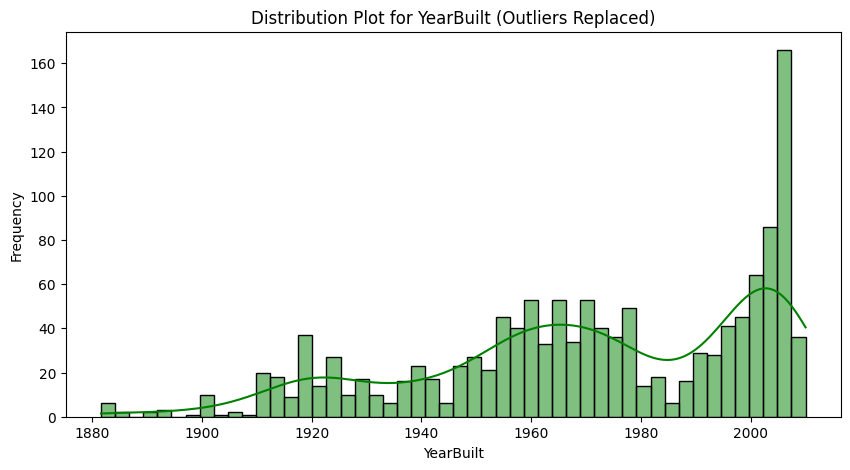

In [ ]:
train_data[numerical_cols[2]] = replace_outliers(train_data[numerical_cols[2]])


<font size="+2" color="black">**```MasonryVeneerArea```**</font>

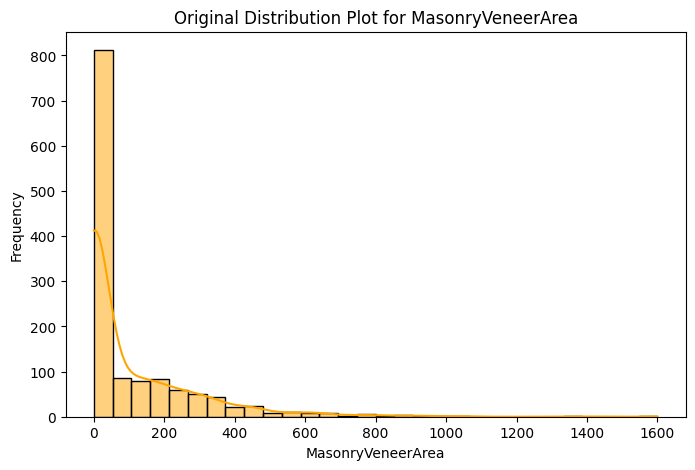

Lower Limit for MasonryVeneerArea: -245.625
Upper Limit for MasonryVeneerArea: 409.375


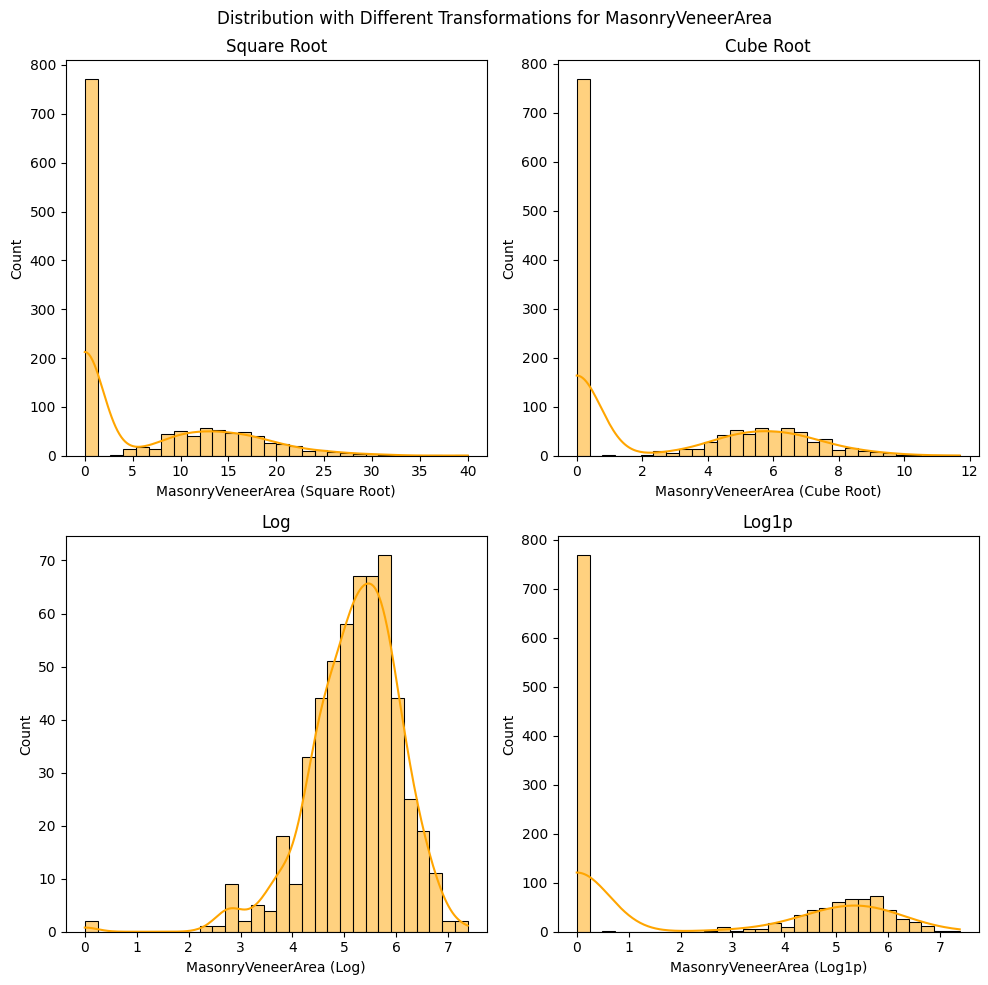

In [ ]:
plot_distribution(train_data[numerical_cols[3]],transformations)

* **`Cubic Root`** seems to be a suitable for addressing this column skewness.

In [ ]:
analyze_outliers(train_data[numerical_cols[3]],transformations)

Original Column: MasonryVeneerArea
Number of outliers: 89
Percentage of outliers: 6.77%


Transformation: Square Root
Number of outliers: 4
Percentage of outliers: 0.30%


Transformation: Cube Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 0
Percentage of outliers: 0.00%




* Cubic root handled the skewness and also outliers are removed by applying this transoformations.

In [ ]:
inspect_outliers(train_data[numerical_cols[3]])

Column: MasonryVeneerArea
Lower Limit: -245.625
Upper Limit: 409.375
10th Percentile: 0.0
90th Percentile: 335.70000000000005
Number of outliers: 89
Percentage of outliers: 6.77%
Outliers:
20      1600.0
52       456.0
57       473.0
67       894.0
76       459.0
97      1031.0
113      438.0
120      443.0
141      435.0
157     1047.0
200      562.0
205      772.0
213      660.0
231      480.0
247      452.0
255      528.0
291      860.0
347      630.0
354      748.0
379      660.0
384      788.0
385      464.0
396      513.0
398      420.0
404      922.0
416      564.0
433      410.0
436      579.0
453      731.0
462      451.0
475      500.0
494      640.0
499      870.0
509      412.0
511      762.0
529      530.0
534      450.0
549      576.0
551      768.0
570      428.0
573      456.0
575      604.0
582      472.0
596      571.0
600      468.0
614      541.0
615      600.0
641      796.0
651      442.0
652      479.0
685     1378.0
737      481.0
739      424.0
744      448.0
7

In [ ]:
train_data[numerical_cols[3]] = np.cbrt(train_data[numerical_cols[3]])
val_data[numerical_cols[3]] = np.cbrt(val_data[numerical_cols[3]])
test_data[numerical_cols[3] ] = np.cbrt(test_data[numerical_cols[3]])

In [ ]:
inspect_outliers(train_data[numerical_cols[3]])

Column: MasonryVeneerArea
Lower Limit: -8.206374973378756
Upper Limit: 13.677291622297925
10th Percentile: 0.0
90th Percentile: 6.9499821702507925
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: MasonryVeneerArea, dtype: float64)




* Outliers removed


<font size="+2" color="black">**```BasementFinishedSF1```**</font>

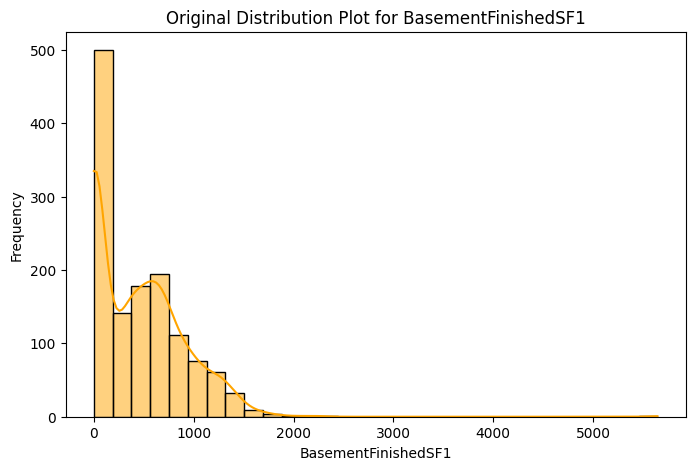

Lower Limit for BasementFinishedSF1: -1078.5
Upper Limit for BasementFinishedSF1: 1797.5


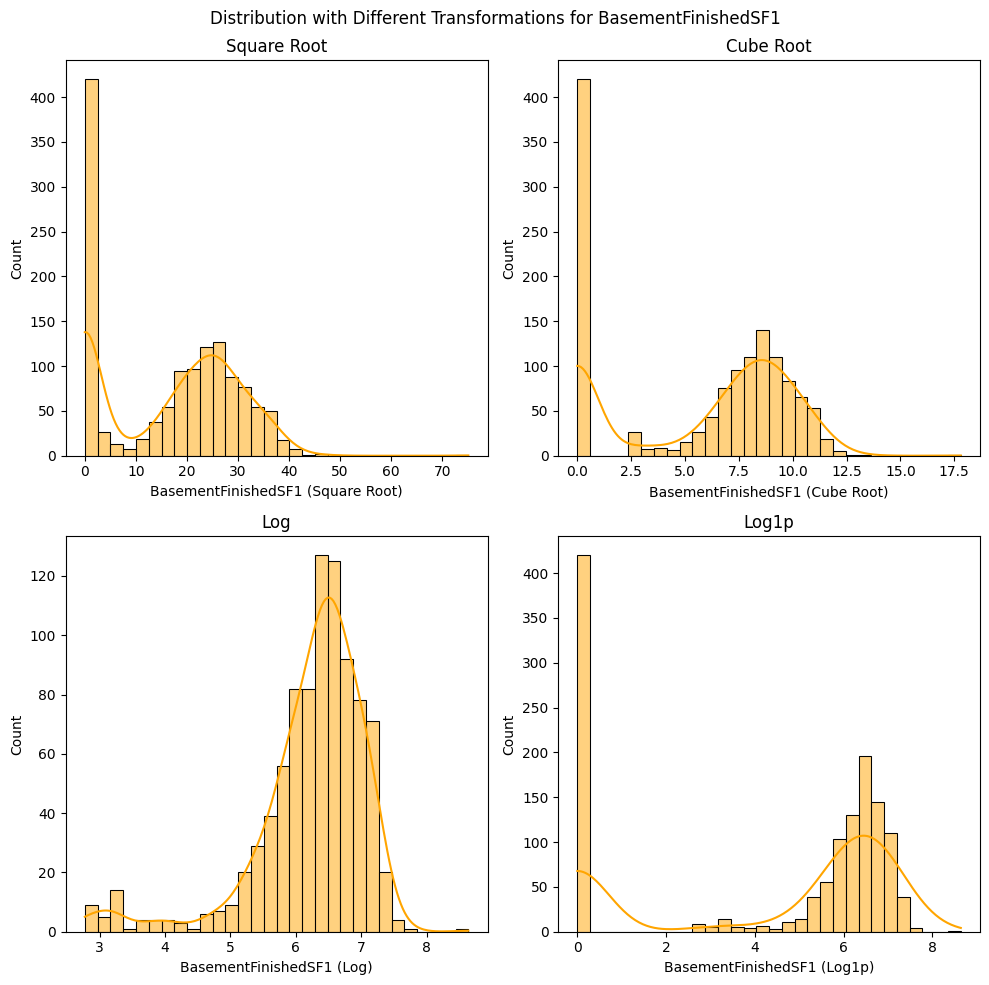

In [ ]:
plot_distribution(train_data[numerical_cols[4]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[4]],transformations)

Original Column: BasementFinishedSF1
Number of outliers: 5
Percentage of outliers: 0.38%


Transformation: Square Root
Number of outliers: 1
Percentage of outliers: 0.08%


Transformation: Cube Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 0
Percentage of outliers: 0.00%




In [ ]:
inspect_outliers(train_data[numerical_cols[4]])

Column: BasementFinishedSF1
Lower Limit: -1078.5
Upper Limit: 1797.5
10th Percentile: 0.0
90th Percentile: 1064.7
Number of outliers: 5
Percentage of outliers: 0.38%
Outliers:
319     2096
354     1904
511     2260
641     5644
1066    1810
Name: BasementFinishedSF1, dtype: int64




In [ ]:
train_data[numerical_cols[4]] = np.cbrt(train_data[numerical_cols[4]])
val_data[numerical_cols[4]] = np.cbrt(val_data[numerical_cols[4]])
test_data[numerical_cols[4] ] = np.cbrt(test_data[numerical_cols[4]])


<font size="+2" color="black">**```BasementFinishedSf2```**</font>

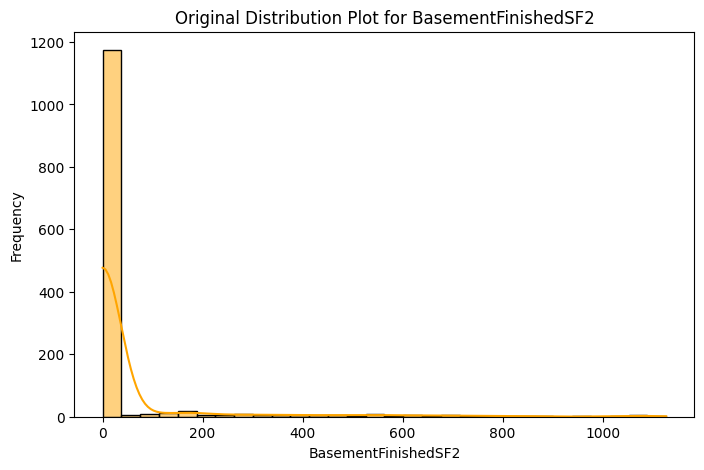

Lower Limit for BasementFinishedSF2: 0.0
Upper Limit for BasementFinishedSF2: 0.0


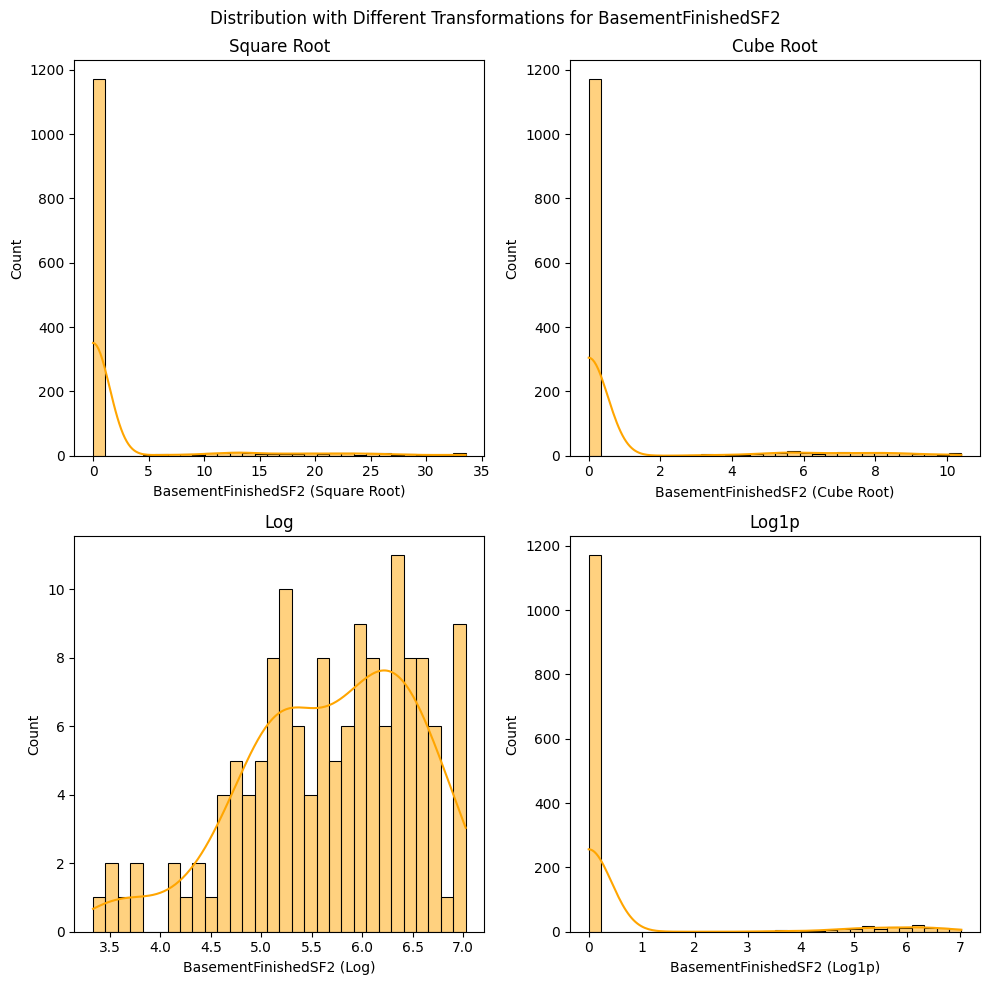

In [ ]:
plot_distribution(train_data[numerical_cols[5]],transformations)

* We can detect that this column values are all 0,with very small protion > 0,this column might not be very effective to keep if over 90% of it's values are 0 .

In [ ]:
train_data[numerical_cols[5]].describe()

count    1314.000000
mean       43.351598
std       155.291529
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1127.000000
Name: BasementFinishedSF2, dtype: float64

* All the values from 25-75 percentiles are zeros as observed.

In [ ]:
analyze_outliers(train_data[numerical_cols[5]],transformations)

Original Column: BasementFinishedSF2
Number of outliers: 143
Percentage of outliers: 10.88%


Transformation: Square Root
Number of outliers: 143
Percentage of outliers: 10.88%


Transformation: Cube Root
Number of outliers: 143
Percentage of outliers: 10.88%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 143
Percentage of outliers: 10.88%




* As we understood the column ehixbit large bias to zeros values where these 167 values are the only non-zero values present.
So we decided to remove this column since it has approximately one value and it will not be informtive.

In [ ]:
train_data = train_data.drop([numerical_cols[5]],axis = 1)
val_data = val_data.drop([numerical_cols[5]],axis = 1)
test_data = test_data.drop([numerical_cols[5]],axis=1)


<font size="+2" color="black">**```BasementUnfinishedSF```**</font>

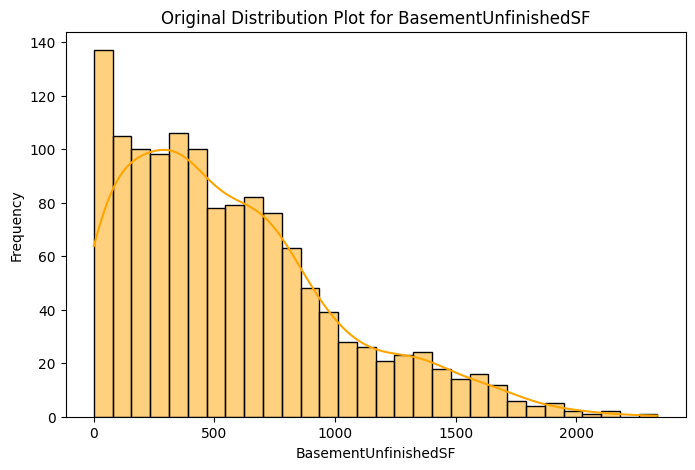

Lower Limit for BasementUnfinishedSF: -658.125
Upper Limit for BasementUnfinishedSF: 1678.875


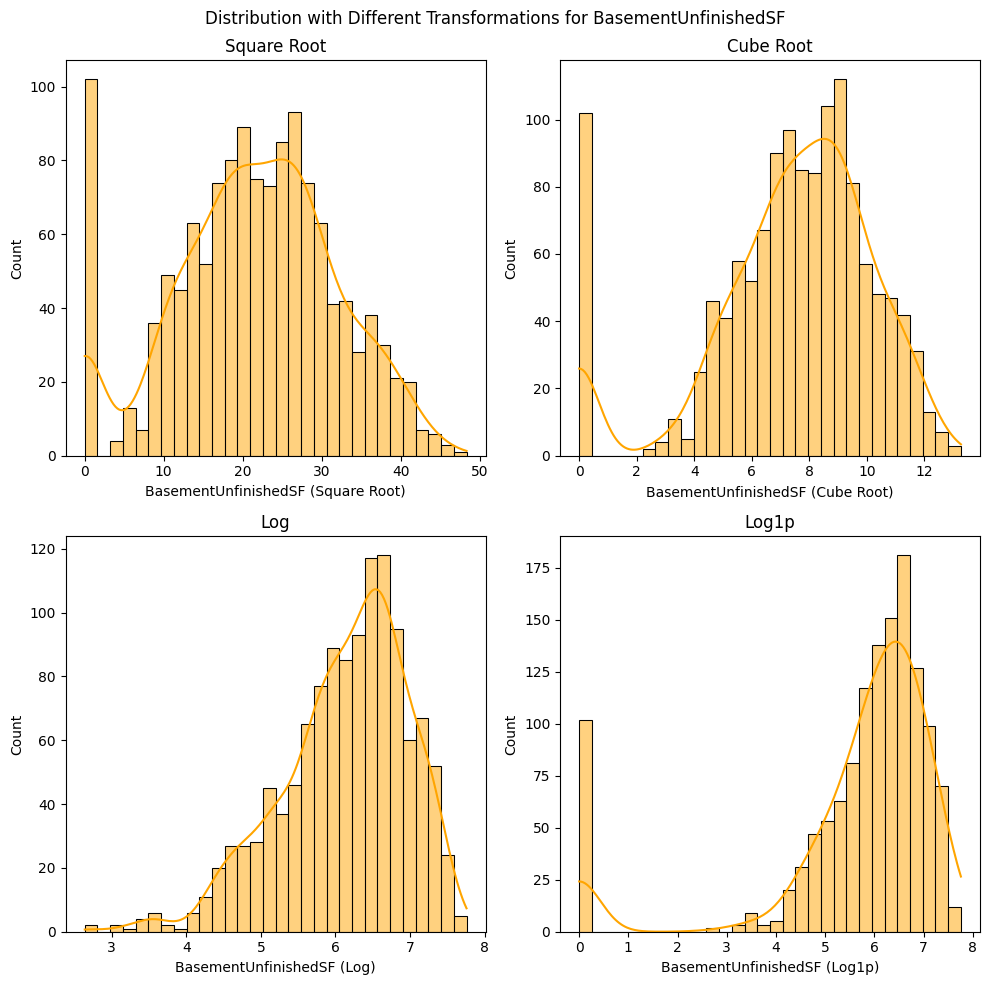

In [ ]:
plot_distribution(train_data[numerical_cols[6]],transformations)

* **`Sqaure root`** looks to be the best method to handle this column skewness,let's confirm this by analzying outliers values.

In [ ]:
analyze_outliers(train_data[numerical_cols[6]],transformations)

Original Column: BasementUnfinishedSF
Number of outliers: 28
Percentage of outliers: 2.13%


Transformation: Square Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Cube Root
Number of outliers: 102
Percentage of outliers: 7.76%


Transformation: Log
Number of outliers: 109
Percentage of outliers: 8.30%


Transformation: Log1p
Number of outliers: 109
Percentage of outliers: 8.30%




* It already also removes all the outliers

In [ ]:
train_data[numerical_cols[6]] = np.sqrt(train_data[numerical_cols[6]])
val_data[numerical_cols[6]] = np.sqrt(val_data[numerical_cols[6]])
test_data[numerical_cols[6] ] = np.sqrt(test_data[numerical_cols[6]])

In [ ]:
inspect_outliers(train_data[numerical_cols[6]])

Column: BasementUnfinishedSF
Lower Limit: -5.55944162821879
Upper Limit: 48.661147892130614
10th Percentile: 8.660254037844387
90th Percentile: 35.158208395246746
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: BasementUnfinishedSF, dtype: float64)





<font size="+2" color="black">**```TotalBasementSF```**</font>

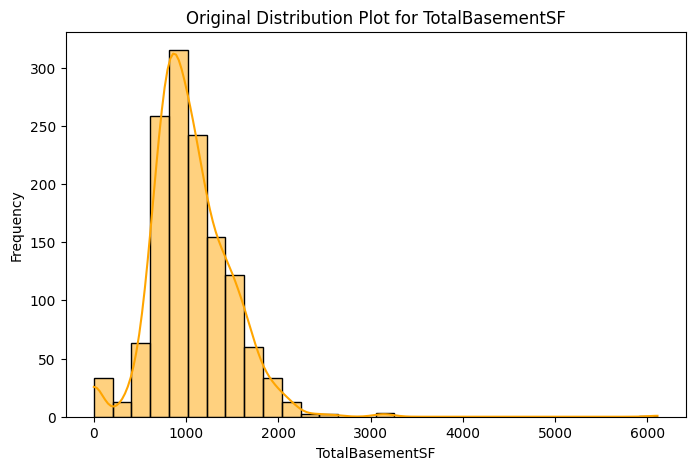

Lower Limit for TotalBasementSF: 44.875
Upper Limit for TotalBasementSF: 2039.875


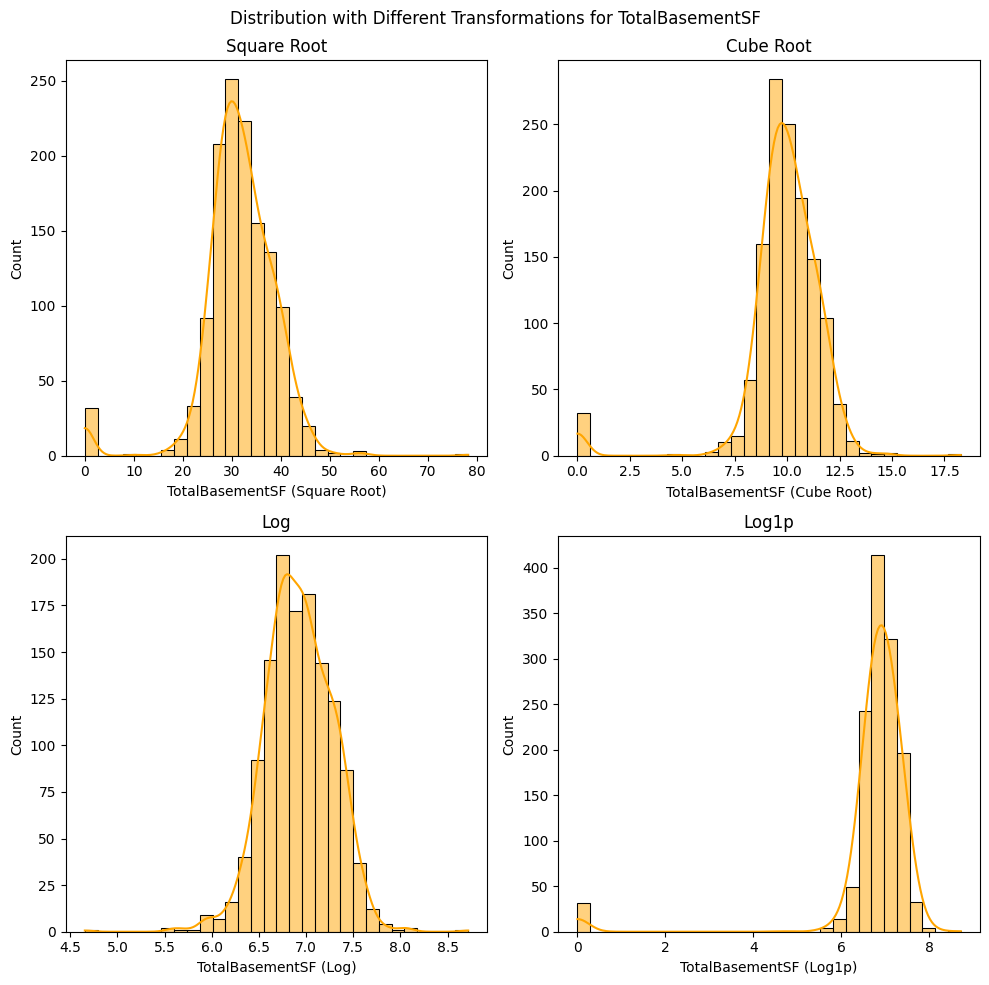

In [ ]:
plot_distribution(train_data[numerical_cols[7]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[7]],transformations)

Original Column: TotalBasementSF
Number of outliers: 53
Percentage of outliers: 4.03%


Transformation: Square Root
Number of outliers: 43
Percentage of outliers: 3.27%


Transformation: Cube Root
Number of outliers: 44
Percentage of outliers: 3.35%


Transformation: Log
Number of outliers: 43
Percentage of outliers: 3.27%


Transformation: Log1p
Number of outliers: 43
Percentage of outliers: 3.27%




* Log Transformation method seems to be suitable for both reduction of outliers and also can handle the right skewness.

In [ ]:
inspect_outliers(train_data[numerical_cols[7]])

Column: TotalBasementSF
Lower Limit: 44.875
Upper Limit: 2039.875
10th Percentile: 636.3
90th Percentile: 1598.5000000000002
Number of outliers: 53
Percentage of outliers: 4.03%
Outliers:
29         0
73         0
84         0
124     2076
128        0
173        0
205     2153
213     2109
245        0
269     2077
319     2396
325        0
329     2158
354     2216
385     2046
394        0
404     2392
410        0
425        0
444        0
445        0
475        0
511     3138
516        0
533        0
565        0
580        0
619     2217
641     6110
683     3094
687        0
730        0
731        0
758     2110
831        0
833     2121
852        0
865     2078
913        0
963     2136
999        0
1008       0
1012    3200
1026    2136
1028    2633
1037       0
1038       0
1095       0
1179       0
1215       0
1256       0
1269       0
1308    2524
Name: TotalBasementSF, dtype: int64




* since all the values below the lower limit are equal to zero,we can't transform using log,so we can choose the cubic root for better results

In [ ]:
train_data[numerical_cols[7]] = np.cbrt(train_data[numerical_cols[7]])
val_data[numerical_cols[7]] = np.cbrt(val_data[numerical_cols[7]])
test_data[numerical_cols[7] ] = np.cbrt(test_data[numerical_cols[7]])

In [ ]:
inspect_outliers(train_data[numerical_cols[7]])

Column: TotalBasementSF
Lower Limit: 6.803872047940109
Upper Limit: 13.34293958608166
10th Percentile: 8.601099057425358
90th Percentile: 11.692412116740211
Number of outliers: 44
Percentage of outliers: 3.35%
Outliers:
29       0.000000
73       0.000000
84       0.000000
128      0.000000
173      0.000000
245      0.000000
319     13.381217
325      0.000000
352      6.463304
394      0.000000
404     13.373766
410      0.000000
425      0.000000
444      0.000000
445      0.000000
475      0.000000
511     14.640334
516      0.000000
533      0.000000
565      0.000000
580      0.000000
641     18.281580
683     14.571584
687      0.000000
730      0.000000
731      0.000000
798      6.619106
830      4.717694
831      0.000000
852      0.000000
913      0.000000
934      6.415069
999      0.000000
1008     0.000000
1012    14.736126
1028    13.808620
1037     0.000000
1038     0.000000
1095     0.000000
1179     0.000000
1215     0.000000
1256     0.000000
1269     0.000000
1308  

Following the transformation of the column, it's notable that the upper outliers now closely approach the upper limit. However, the lower outliers exclusively consist of zero values, indicating the absence of basement area. Thus, we opt to keep the lower outliers and replace the upper ones.

Outliers after replacement:
[]


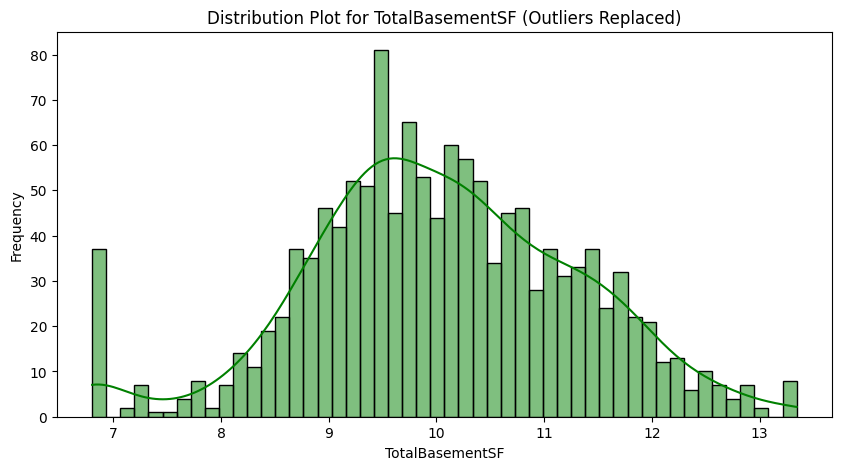

In [ ]:
# save indices of zero outliers
zero_outliers_indices = train_data[train_data[numerical_cols[7]] == 0].index.tolist()

# replace outliers
train_data[numerical_cols[7]] = replace_outliers(train_data[numerical_cols[7]])

# Restore zero outliers back to zero using saved indices
train_data.loc[zero_outliers_indices, numerical_cols[7]] = 0


* Furthermore, the distribution of the column appears to approximate a normal distribution, indicating an improvement in its statistical characteristics.

In [ ]:
inspect_outliers(train_data[numerical_cols[7]])

Column: TotalBasementSF
Lower Limit: 6.803872047940109
Upper Limit: 13.34293958608166
10th Percentile: 8.601099057425358
90th Percentile: 11.692412116740211
Number of outliers: 32
Percentage of outliers: 2.44%
Outliers:
29      0.0
73      0.0
84      0.0
128     0.0
173     0.0
245     0.0
325     0.0
394     0.0
410     0.0
425     0.0
444     0.0
445     0.0
475     0.0
516     0.0
533     0.0
565     0.0
580     0.0
687     0.0
730     0.0
731     0.0
831     0.0
852     0.0
913     0.0
999     0.0
1008    0.0
1037    0.0
1038    0.0
1095    0.0
1179    0.0
1215    0.0
1256    0.0
1269    0.0
Name: TotalBasementSF, dtype: float64




* At this point, the remaining outliers consist of lower values that are zero. We've made the decision to retain these values to preserve the information they convey, indicating the absence of a basement.


<font size="+2" color="black">**```FirstFloorSF```**</font>

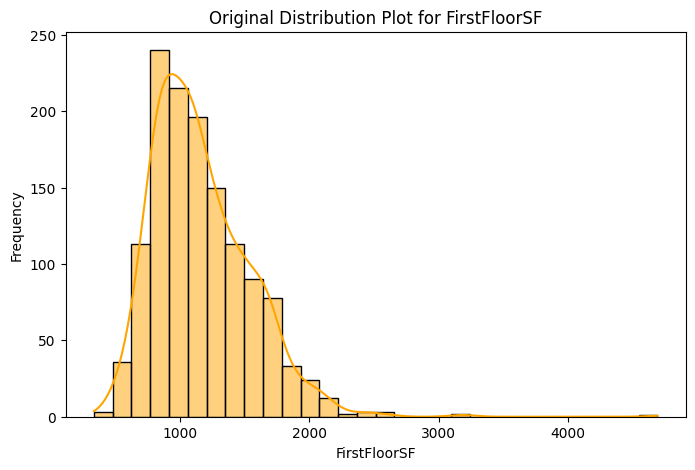

Lower Limit for FirstFloorSF: 120.5
Upper Limit for FirstFloorSF: 2152.5


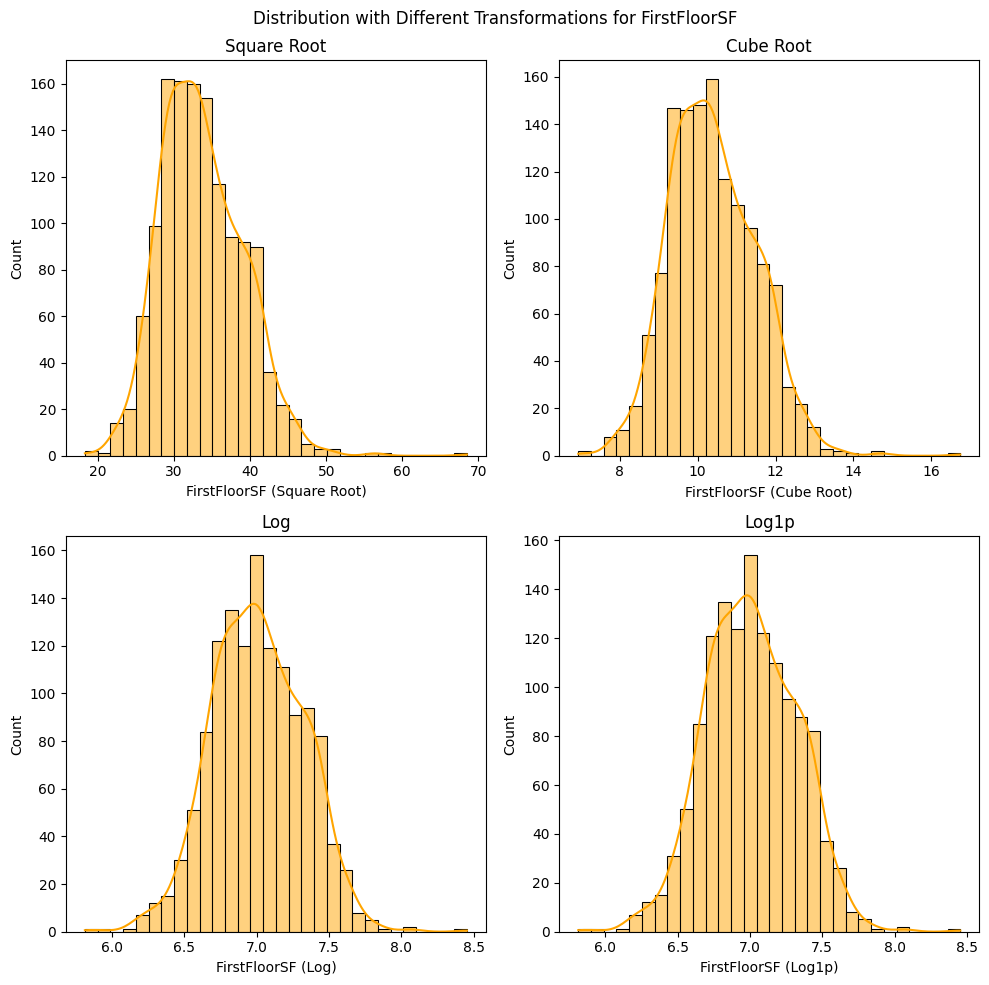

In [ ]:
plot_distribution(train_data[numerical_cols[8]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[8]],transformations)

Original Column: FirstFloorSF
Number of outliers: 15
Percentage of outliers: 1.14%


Transformation: Square Root
Number of outliers: 10
Percentage of outliers: 0.76%


Transformation: Cube Root
Number of outliers: 8
Percentage of outliers: 0.61%


Transformation: Log
Number of outliers: 6
Percentage of outliers: 0.46%


Transformation: Log1p
Number of outliers: 6
Percentage of outliers: 0.46%




* few outliers observed,with Log transformation this column can have normal distribution with notable reduction in outliers.

In [ ]:
inspect_outliers(train_data[numerical_cols[8]])

Column: FirstFloorSF
Lower Limit: 120.5
Upper Limit: 2152.5
10th Percentile: 756.0
90th Percentile: 1680.0
Number of outliers: 15
Percentage of outliers: 1.14%
Outliers:
6       2515
162     2259
319     2411
329     2196
354     2234
404     2392
454     2207
511     3138
619     2217
641     4692
645     2156
683     2402
1012    3228
1028    2633
1308    2524
Name: FirstFloorSF, dtype: int64




* Also they are all non-zero values,so we can go to log transformation.

In [ ]:
train_data[numerical_cols[8]] = np.log(train_data[numerical_cols[8]])
val_data[numerical_cols[8]] = np.log(val_data[numerical_cols[8]])
test_data[numerical_cols[8] ] = np.log(test_data[numerical_cols[8]])

In [ ]:
inspect_outliers(train_data[numerical_cols[8]])

Column: FirstFloorSF
Lower Limit: 6.100768049714509
Upper Limit: 7.919408737581164
10th Percentile: 6.628041376179533
90th Percentile: 7.426549072397305
Number of outliers: 6
Percentage of outliers: 0.46%
Outliers:
410     5.918894
511     8.051341
516     5.811141
641     8.453614
798     6.082219
1012    8.079618
Name: FirstFloorSF, dtype: float64





<font size="+2" color="black">**```SecondFloorSF```**<font>

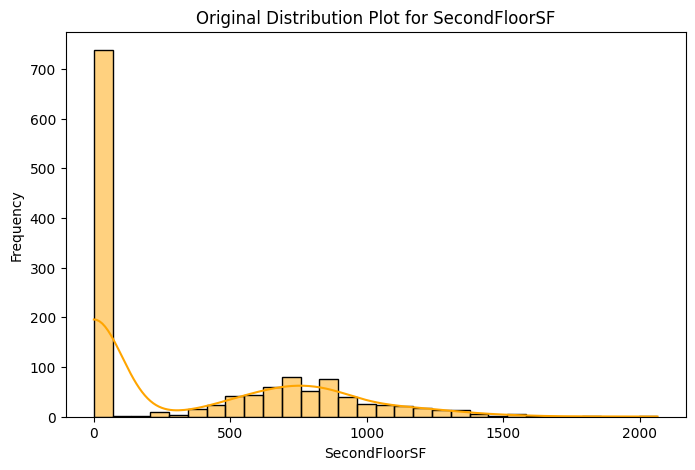

Lower Limit for SecondFloorSF: -1092.0
Upper Limit for SecondFloorSF: 1820.0


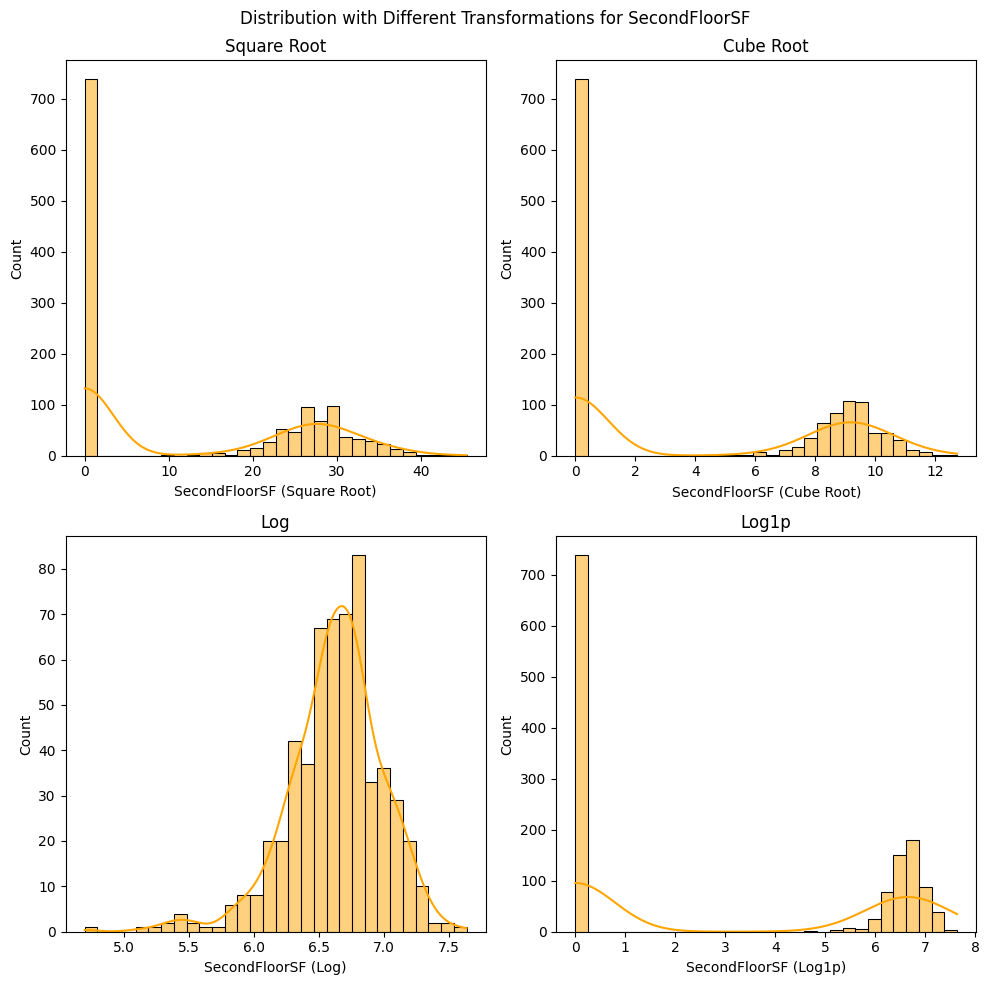

In [ ]:
plot_distribution(train_data[numerical_cols[9]],transformations)

* this column also exhibits a right skewed distribution with almost a large protion of the values are zero.

In [ ]:
analyze_outliers(train_data[numerical_cols[9]],transformations)

Original Column: SecondFloorSF
Number of outliers: 1
Percentage of outliers: 0.08%


Transformation: Square Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Cube Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 0
Percentage of outliers: 0.00%




In [ ]:
inspect_outliers(train_data[numerical_cols[9]])

Column: SecondFloorSF
Lower Limit: -1092.0
Upper Limit: 1820.0
10th Percentile: 0.0
90th Percentile: 952.8000000000002
Number of outliers: 1
Percentage of outliers: 0.08%
Outliers:
319    2065
Name: SecondFloorSF, dtype: int64




* Only 1 outlier present which is non-zero values,with the indication of a real value and not very far to their upper limit,so they don't represent a random outlier,we can just transofrm the column, Since the column has large protion of zero values using any transormation other than log would be more suitable to reduce the skweness of the column,and already we will face removal of outlier.

In [ ]:
train_data[numerical_cols[9]] = np.sqrt(train_data[numerical_cols[9]])
val_data[numerical_cols[9]] = np.sqrt(val_data[numerical_cols[9]])
test_data[numerical_cols[9] ] = np.sqrt(test_data[numerical_cols[9]])

In [ ]:
inspect_outliers(train_data[numerical_cols[9]])

Column: SecondFloorSF
Lower Limit: -40.47221268969612
Upper Limit: 67.4536878161602
10th Percentile: 0.0
90th Percentile: 30.86744430052617
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: SecondFloorSF, dtype: float64)





<font size="+2" color="black">**```LowQualityFinishedSF```**<font>

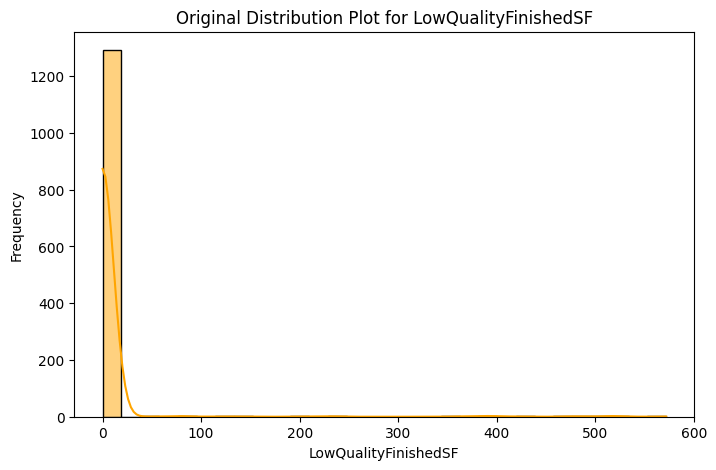

Lower Limit for LowQualityFinishedSF: 0.0
Upper Limit for LowQualityFinishedSF: 0.0


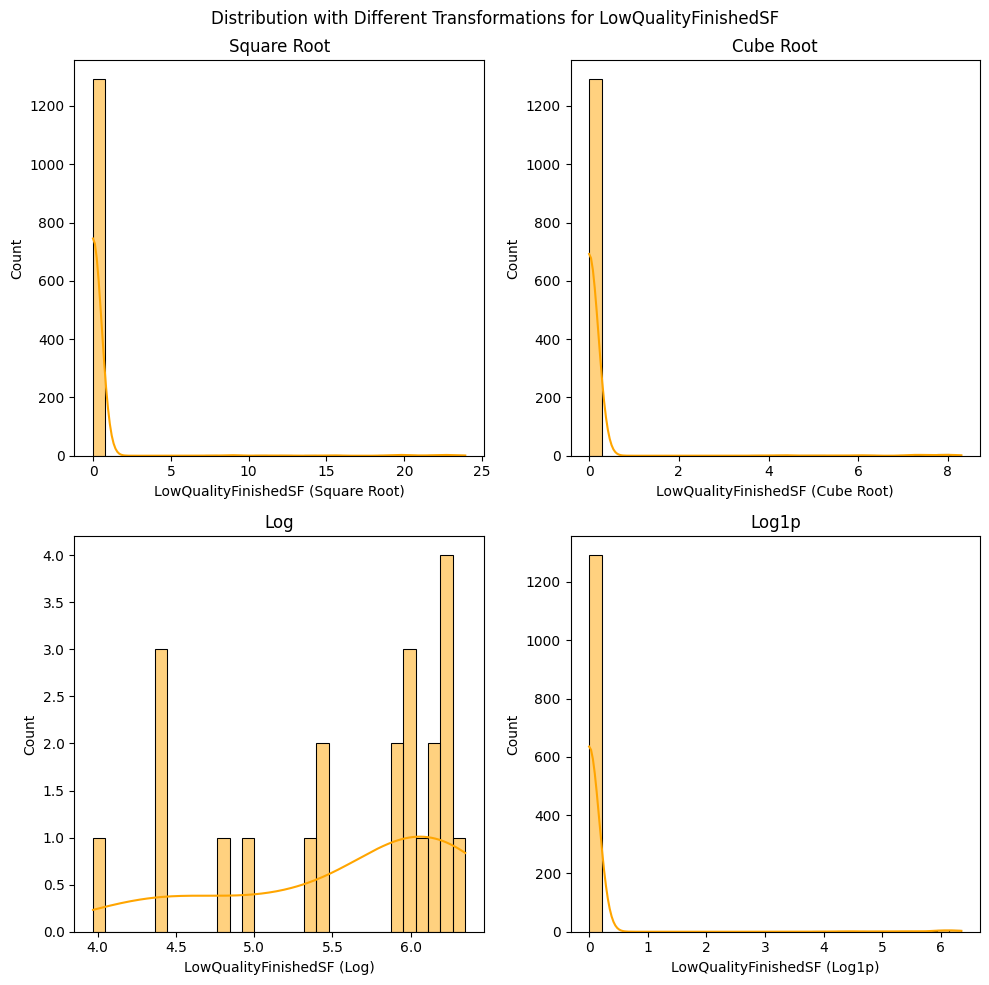

In [ ]:
plot_distribution(train_data[numerical_cols[10]],transformations)

* Almost all data records for this column is zero values as observed with the upper and lower limit of the column = 0 also,which may not be very useuful so we will choose to remove it instead since all its values are one value.

In [ ]:
train_data = train_data.drop([numerical_cols[10]],axis = 1)
val_data = val_data.drop([numerical_cols[10]],axis = 1)
test_data = test_data.drop([numerical_cols[10]],axis=1)


<font size="+2" color="black">**```AboveGradeLivingAreaSF```**<font>

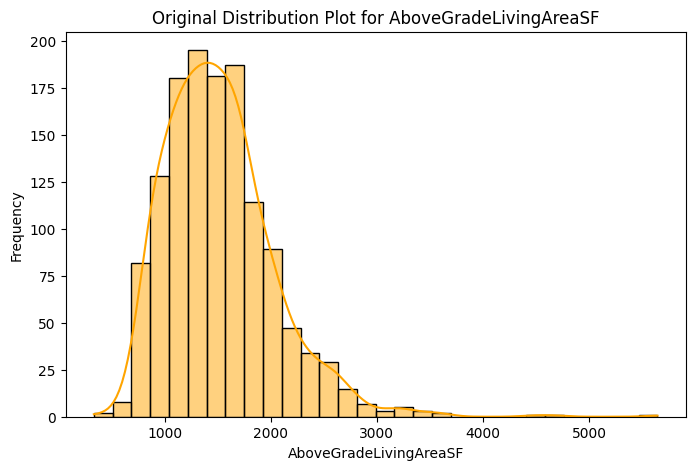

Lower Limit for AboveGradeLivingAreaSF: 181.0
Upper Limit for AboveGradeLivingAreaSF: 2749.0


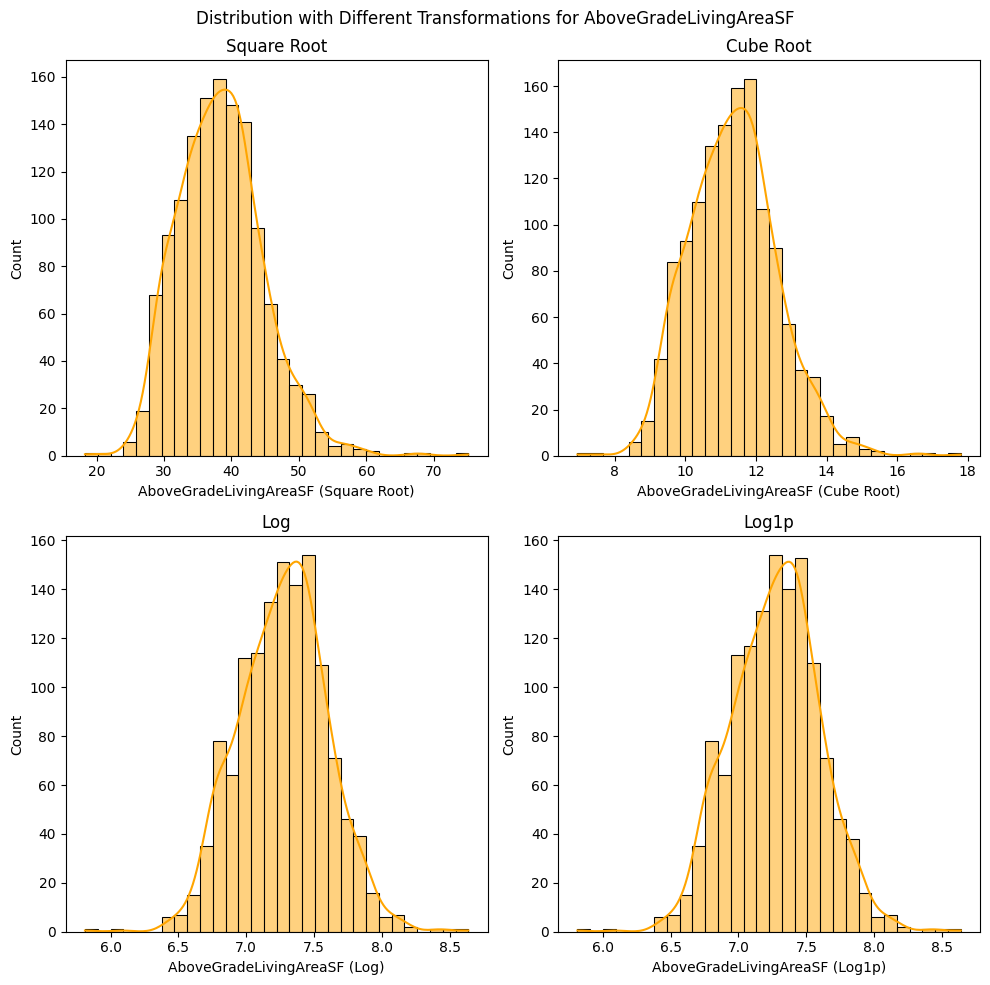

In [ ]:
plot_distribution(train_data[numerical_cols[11]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[11]],transformations)

Original Column: AboveGradeLivingAreaSF
Number of outliers: 27
Percentage of outliers: 2.05%


Transformation: Square Root
Number of outliers: 18
Percentage of outliers: 1.37%


Transformation: Cube Root
Number of outliers: 15
Percentage of outliers: 1.14%


Transformation: Log
Number of outliers: 8
Percentage of outliers: 0.61%


Transformation: Log1p
Number of outliers: 8
Percentage of outliers: 0.61%




* Column values seem to be more non-zero values,having also right skewed distribution,using Log transformations can siginficantly effect the skewness of the column with reduction the outliers values.

In [ ]:
inspect_outliers(train_data[numerical_cols[11]])

Column: AboveGradeLivingAreaSF
Lower Limit: 181.0
Upper Limit: 2749.0
10th Percentile: 919.5
90th Percentile: 2147.5
Number of outliers: 27
Percentage of outliers: 2.05%
Outliers:
22      2868
28      2872
95      2978
97      2945
204     2775
291     3140
306     3082
319     4476
343     2828
436     3238
511     4676
628     3222
641     5642
685     3627
739     2822
783     2810
784     3608
938     3395
952     3447
961     3493
993     2872
1012    3228
1048    2792
1106    3194
1110    3112
1121    2784
1297    3279
Name: AboveGradeLivingAreaSF, dtype: int64




In [ ]:
train_data[numerical_cols[11]] = np.log(train_data[numerical_cols[11]])
val_data[numerical_cols[11]] = np.log(val_data[numerical_cols[11]])
test_data[numerical_cols[11] ] = np.log(test_data[numerical_cols[11]])

In [ ]:
inspect_outliers(train_data[numerical_cols[11]])

Column: AboveGradeLivingAreaSF
Lower Limit: 6.374114787694692
Upper Limit: 8.155905145681496
10th Percentile: 6.823826943785199
90th Percentile: 7.672059084306965
Number of outliers: 8
Percentage of outliers: 0.61%
Outliers:
319    8.406485
511    8.450198
516    5.811141
641    8.637994
685    8.196161
784    8.190909
798    6.082219
961    8.158516
Name: AboveGradeLivingAreaSF, dtype: float64




Outliers after replacement:
[]


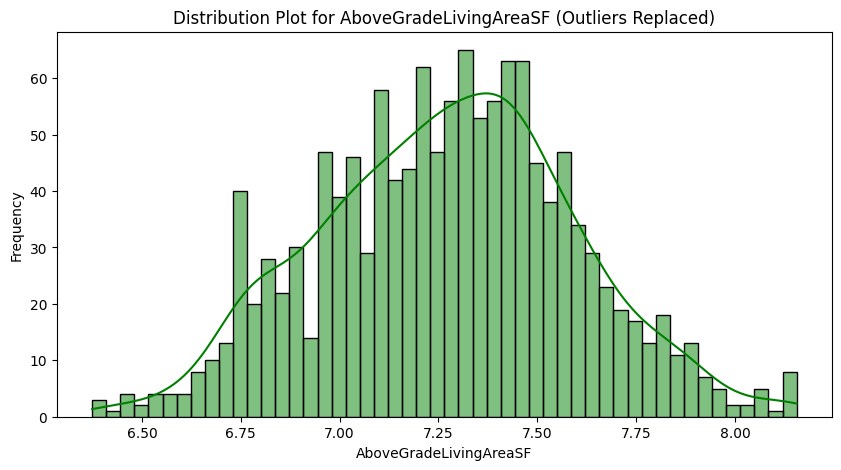

In [ ]:
train_data[numerical_cols[11]] = replace_outliers(train_data[numerical_cols[11]])

In [ ]:
inspect_outliers(train_data[numerical_cols[11]])

Column: AboveGradeLivingAreaSF
Lower Limit: 6.374114787694692
Upper Limit: 8.155905145681496
10th Percentile: 6.823826943785199
90th Percentile: 7.672059084306965
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: AboveGradeLivingAreaSF, dtype: float64)





<font size="+2" color="black">**```TotalRoomsAbvGrade```**<font>

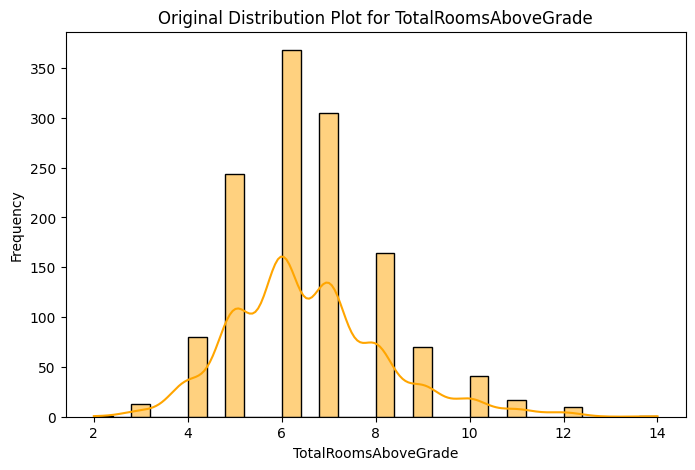

Lower Limit for TotalRoomsAboveGrade: 2.0
Upper Limit for TotalRoomsAboveGrade: 10.0


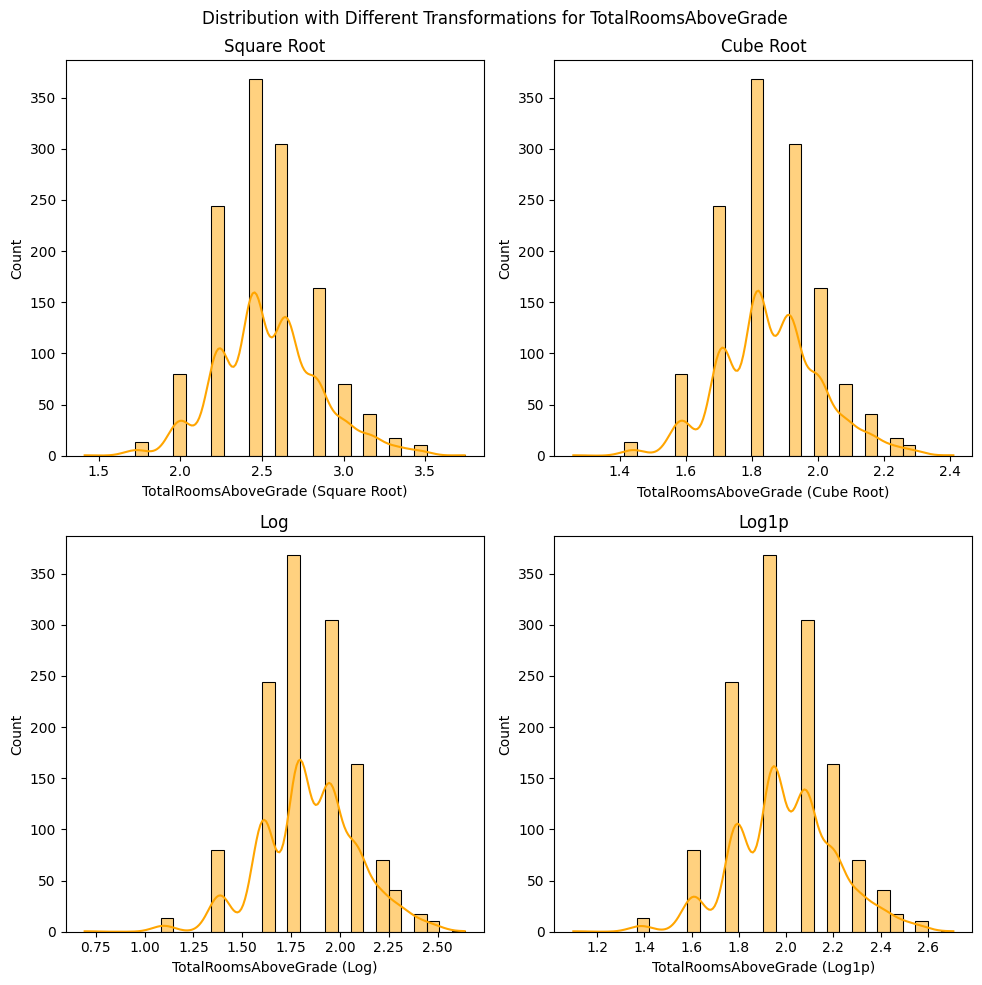

In [ ]:
plot_distribution(train_data[numerical_cols[12]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[12]],transformations)

Original Column: TotalRoomsAboveGrade
Number of outliers: 28
Percentage of outliers: 2.13%


Transformation: Square Root
Number of outliers: 29
Percentage of outliers: 2.21%


Transformation: Cube Root
Number of outliers: 29
Percentage of outliers: 2.21%


Transformation: Log
Number of outliers: 25
Percentage of outliers: 1.90%


Transformation: Log1p
Number of outliers: 12
Percentage of outliers: 0.91%




In [ ]:
inspect_outliers(train_data[numerical_cols[12]])

Column: TotalRoomsAboveGrade
Lower Limit: 2.0
Upper Limit: 10.0
10th Percentile: 5.0
90th Percentile: 9.0
Number of outliers: 28
Percentage of outliers: 2.13%
Outliers:
7       12
22      11
95      11
167     12
241     11
249     11
291     11
306     12
310     11
343     11
460     11
510     12
511     11
587     11
628     11
641     12
733     11
739     12
784     12
882     11
900     11
938     14
952     11
993     11
1069    11
1121    12
1256    12
1297    12
Name: TotalRoomsAboveGrade, dtype: int64




* Outliers observed are very close to the upper limit,also they represent a real observations as some properties can be large enough to have 11 and 12 rooms, We can just transform the column to have normal distribution.

In [ ]:
train_data[numerical_cols[12]] = np.log1p(train_data[numerical_cols[12]])
val_data[numerical_cols[12]] = np.log1p(val_data[numerical_cols[12]])
test_data[numerical_cols[12] ] = np.log1p(test_data[numerical_cols[12]])

In [ ]:
inspect_outliers(train_data[numerical_cols[12]])

Column: TotalRoomsAboveGrade
Lower Limit: 1.3602363605503838
Upper Limit: 2.510964650357507
10th Percentile: 1.791759469228055
90th Percentile: 2.302585092994046
Number of outliers: 12
Percentage of outliers: 0.91%
Outliers:
7       2.564949
167     2.564949
306     2.564949
510     2.564949
516     1.098612
641     2.564949
739     2.564949
784     2.564949
938     2.708050
1121    2.564949
1256    2.564949
1297    2.564949
Name: TotalRoomsAboveGrade, dtype: float64





<font size="+2" color="black">**```GarageYearBuilt```**<font>

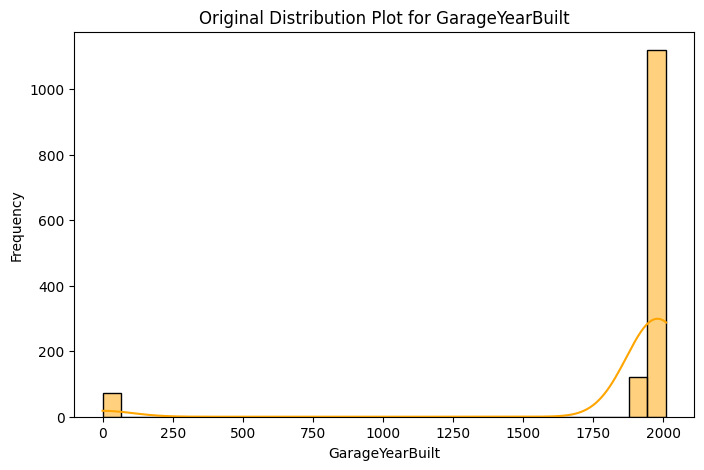

Lower Limit for GarageYearBuilt: 1893.5
Upper Limit for GarageYearBuilt: 2065.5


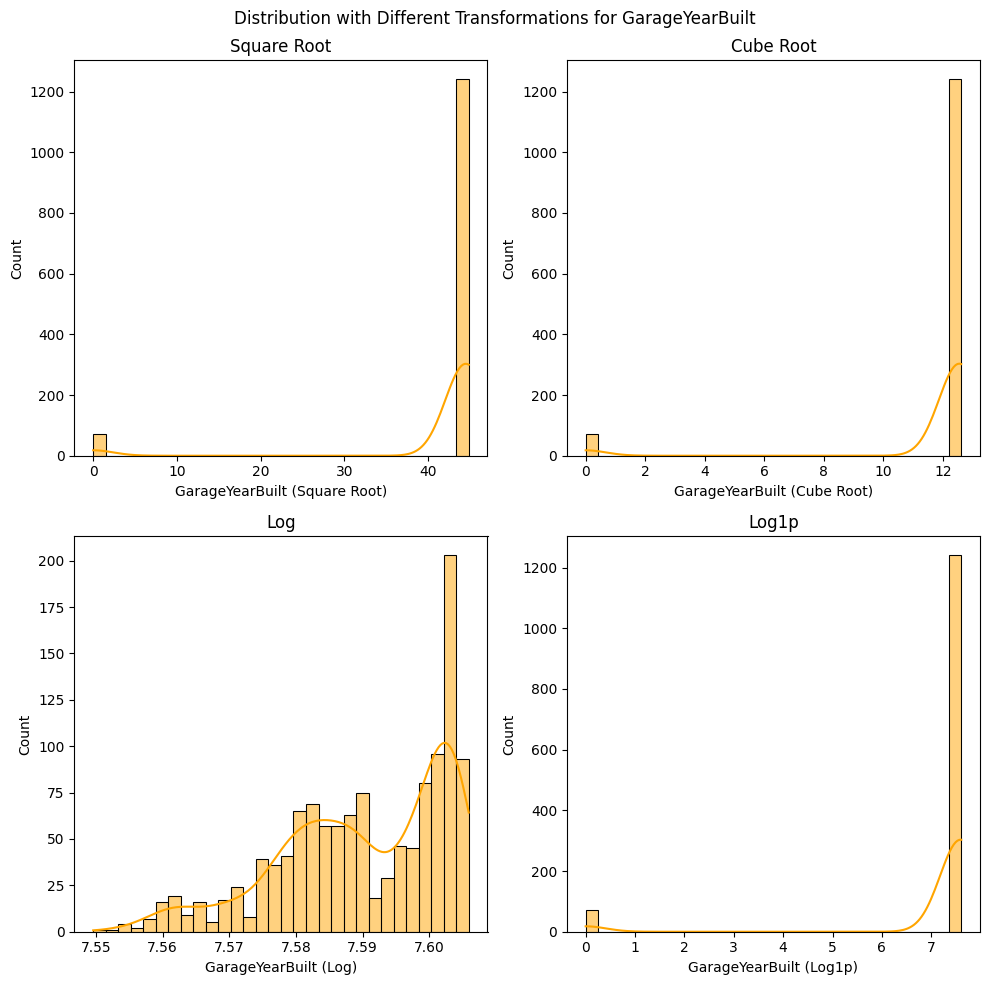

In [ ]:
plot_distribution(train_data[numerical_cols[13]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[13]],transformations)

Original Column: GarageYearBuilt
Number of outliers: 73
Percentage of outliers: 5.56%


Transformation: Square Root
Number of outliers: 73
Percentage of outliers: 5.56%


Transformation: Cube Root
Number of outliers: 73
Percentage of outliers: 5.56%


Transformation: Log
Number of outliers: 73
Percentage of outliers: 5.56%


Transformation: Log1p
Number of outliers: 73
Percentage of outliers: 5.56%




In [ ]:
inspect_outliers(train_data[numerical_cols[13]])

Column: GarageYearBuilt
Lower Limit: 1893.5
Upper Limit: 2065.5
10th Percentile: 1928.3
90th Percentile: 2006.0
Number of outliers: 73
Percentage of outliers: 5.56%
Outliers:
3       0.0
9       0.0
12      0.0
19      0.0
25      0.0
26      0.0
66      0.0
99      0.0
135     0.0
148     0.0
177     0.0
191     0.0
192     0.0
196     0.0
211     0.0
256     0.0
259     0.0
266     0.0
279     0.0
324     0.0
337     0.0
352     0.0
355     0.0
356     0.0
365     0.0
410     0.0
425     0.0
457     0.0
467     0.0
512     0.0
516     0.0
555     0.0
557     0.0
566     0.0
580     0.0
602     0.0
629     0.0
630     0.0
650     0.0
660     0.0
693     0.0
711     0.0
725     0.0
747     0.0
750     0.0
759     0.0
760     0.0
771     0.0
773     0.0
787     0.0
848     0.0
853     0.0
859     0.0
873     0.0
876     0.0
908     0.0
913     0.0
938     0.0
990     0.0
1000    0.0
1008    0.0
1065    0.0
1099    0.0
1134    0.0
1136    0.0
1141    0.0
1177    0.0
1189    0.0
1215    0

* All the outliers presented are lower outliers with value 0,which indicate the absence of the garage,any change in this values would violate the idea of the garage absence. we also need to confirm they really correspond to garage absence values in other columns


In [ ]:
train_data[train_data[numerical_cols[13]]==0]

DwellingTypeSubClass ZoningClassification  StreetFrontage  LotSize  \
3                      30                   RL            45.0     8248   
9                      90                   RL            60.0     9000   
12                     30                   RL            58.0     9098   
19                     90                   RL            80.0     8000   
25                     45                   RL            55.0     5500   
26                     50                   RL            60.0     6000   
66                     20                   RL            77.0     9320   
99                    190                   RL            70.0     7000   
135                   180                   RM            27.5     1533   
148                    30                   RL            67.0     8777   
177                    30                   RL            67.0     5604   
191                   190                   RM            33.0     4456   
192                    50                   RL            60.0     9600   
196                   190                   RH             NaN     7082   
211                    50                   RL            54.0     6342   
256                    70                   RH            55.0     8525   
259                    20                   RL            70.0    10500   
266                    30                   RL            50.0     5330   
279                   190                   RL            55.0     5687   
324                    90                   RL            81.0    11841   
337                    20                   RL            70.0     8402   
352                    30                   RL            56.0     4130   
355                    20                   RL             NaN     8125   
356                    20                   RL             NaN     8780   
365                    50              C (all)           105.0     8470   
410                   190                   RM            70.0     5600   
425                    90                   RL            65.0     6040   
457                    90                   RL            42.0     7711   
467                    30                   RL            51.0     5900   
512                    45                   RM            50.0     6130   
516                    20                   RL            50.0     5000   
555                   190                   RL            62.0    10106   
557                    50                   RM             NaN     7920   
566                   180                   RM            27.5     1890   
580                    20                   RL            77.0     8335   
602                    50                   RL            60.0    10800   
629                    70                   RM            60.0     6882   
630                    30                   RL            55.0     5350   
650                    70                   RM            50.0     5250   
660                    20                   RL            90.0    17217   
693                    20                   RL            63.0     7500   
711                    50                   RL            58.0     8410   
725                   190                   RM            60.0     6780   
747                    50                   RM            50.0     5925   
750                    30              C (all)            60.0     7879   
759                    30                   RH            70.0     4270   
760                    30                   RM            40.0     3636   
771                   160                   RM            27.5     1680   
773                    50                   RM            55.0     8800   
787                    50                   RM            85.0     8500   
848                    90                   RL            60.0    10800   
853                    30                   RL             NaN     7446   
859                    30     

* Confirmed,0 values here are not errors or random outliers,it correctly ensures that no garage properties will have GarageYearBuilt = 0.


<font size="+2" color="black">**```GarageSizeInSF```**<font>

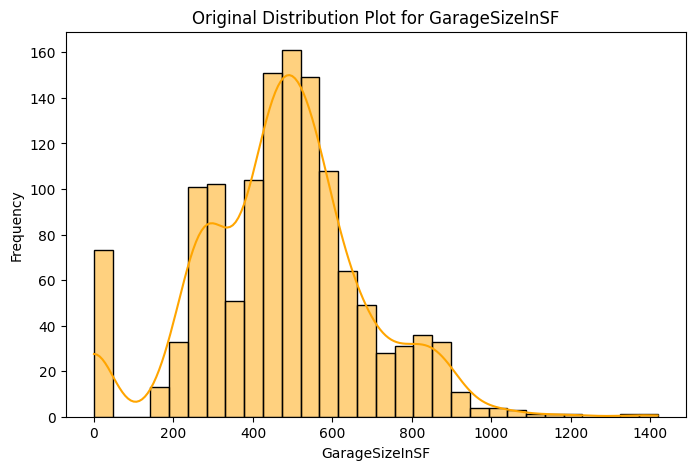

Lower Limit for GarageSizeInSF: -24.0
Upper Limit for GarageSizeInSF: 936.0


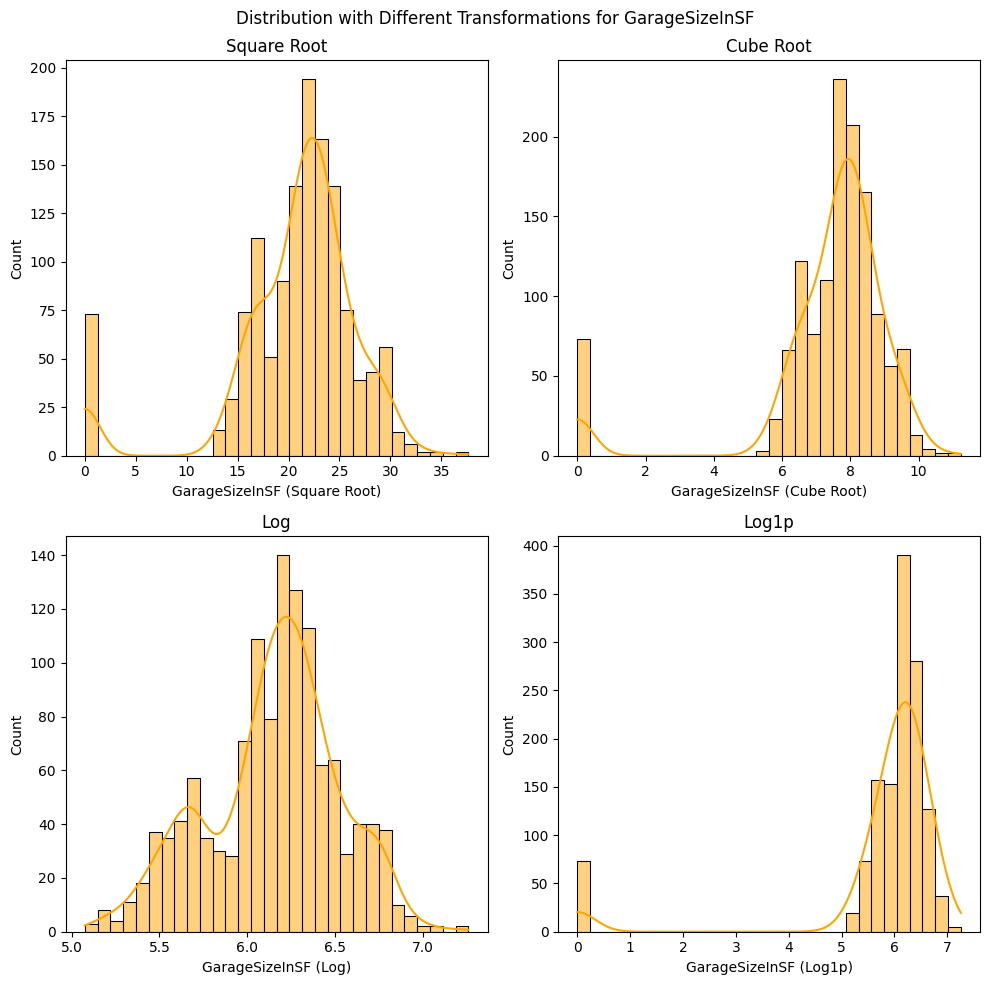

In [ ]:
plot_distribution(train_data[numerical_cols[14]],transformations)

In [ ]:
analyze_outliers(train_data[numerical_cols[14]],transformations)

Original Column: GarageSizeInSF
Number of outliers: 16
Percentage of outliers: 1.22%


Transformation: Square Root
Number of outliers: 79
Percentage of outliers: 6.01%


Transformation: Cube Root
Number of outliers: 78
Percentage of outliers: 5.94%


Transformation: Log
Number of outliers: 75
Percentage of outliers: 5.71%


Transformation: Log1p
Number of outliers: 75
Percentage of outliers: 5.71%




In [ ]:
inspect_outliers(train_data[numerical_cols[14]])

Column: GarageSizeInSF
Lower Limit: -24.0
Upper Limit: 936.0
10th Percentile: 240.0
90th Percentile: 750.0
Number of outliers: 16
Percentage of outliers: 1.22%
Outliers:
167      968
235     1356
269     1134
343     1052
354     1166
404      968
453     1069
641     1418
671     1043
704      947
739     1020
865     1220
952     1014
1143    1025
1185     954
1289     995
Name: GarageSizeInSF, dtype: int64




* Column is slightly normally distributed with few number if outliers,transforming the column results in a great increase in the outliers.We can just replace all these outliers with their upper limit since they are somehow close values.

Outliers after replacement:
[]


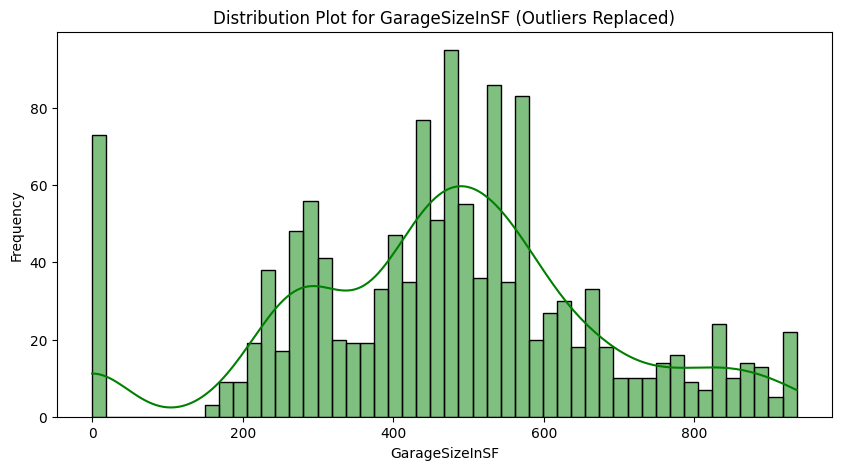

In [ ]:
train_data[numerical_cols[14]] = replace_outliers(train_data[numerical_cols[14]])

In [ ]:
inspect_outliers(train_data[numerical_cols[14]])

Column: GarageSizeInSF
Lower Limit: -24.0
Upper Limit: 936.0
10th Percentile: 240.0
90th Percentile: 750.0
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: GarageSizeInSF, dtype: float64)




* column now exhibits normal distribution post outliers removal.


<font size="+2" color="black">**```WoodDeckAreaSF```**<font>

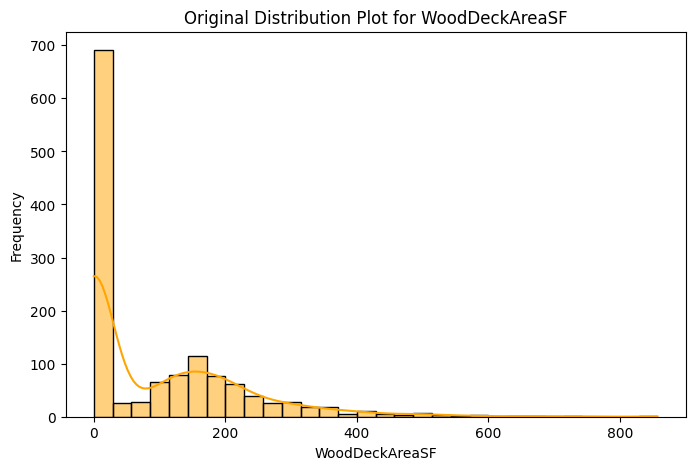

Lower Limit for WoodDeckAreaSF: -252.0
Upper Limit for WoodDeckAreaSF: 420.0


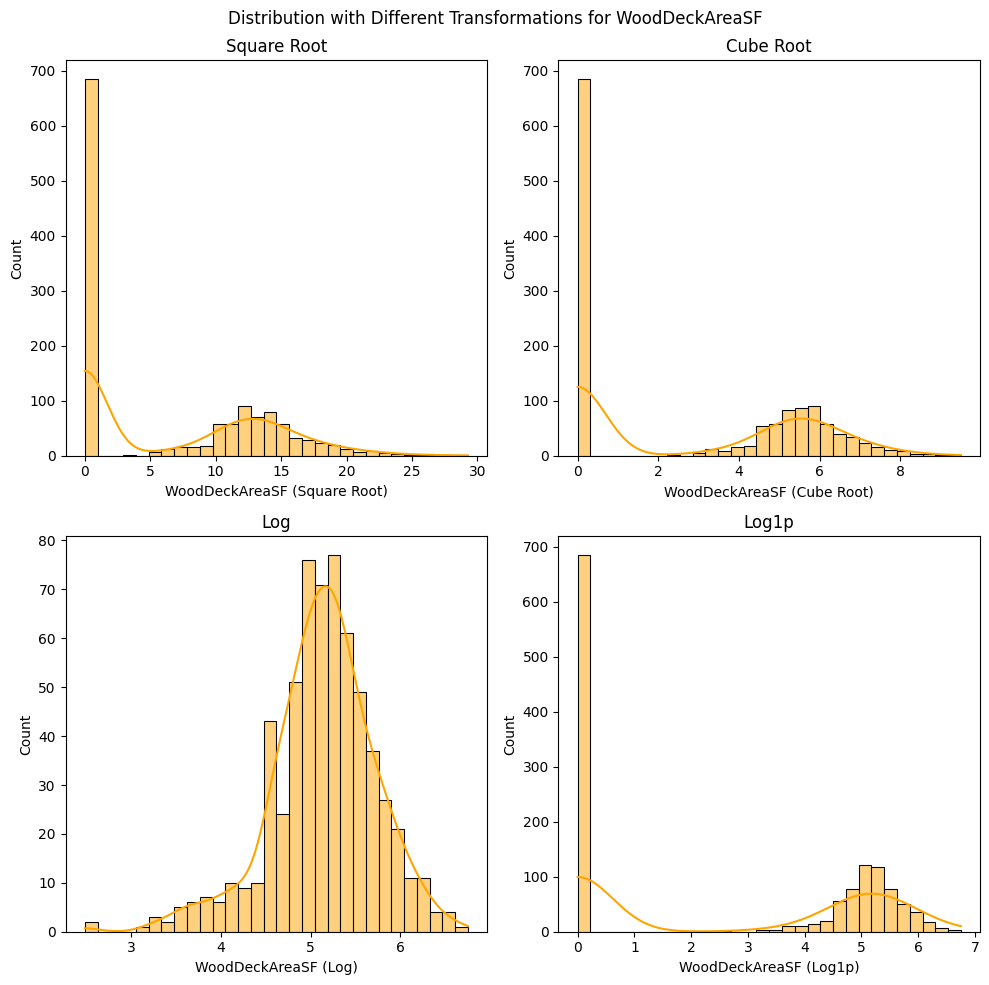

In [ ]:
plot_distribution(train_data[numerical_cols[15]],transformations)

* Column exhibit right skeweness with large number of zero values,we can observe that sqaure anc cubic roots can manage handling skewness efficetvely.

In [ ]:
analyze_outliers(train_data[numerical_cols[15]],transformations)

Original Column: WoodDeckAreaSF
Number of outliers: 31
Percentage of outliers: 2.36%


Transformation: Square Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Cube Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 0
Percentage of outliers: 0.00%




* As we mentiond that sqaure and cubic root enhanced the distribution to normal one,they also managed in removing outliers which can be very effictive methods.

In [ ]:
inspect_outliers(train_data[numerical_cols[15]])

Column: WoodDeckAreaSF
Lower Limit: -252.0
Upper Limit: 420.0
10th Percentile: 0.0
90th Percentile: 262.0
Number of outliers: 31
Percentage of outliers: 2.36%
Outliers:
108     466
185     511
235     439
255     517
298     635
418     668
466     509
554     519
571     468
587     431
617     728
665     536
714     486
723     441
761     574
783     500
863     448
867     736
877     486
894     670
993     550
1066    857
1133    421
1151    586
1216    576
1226    436
1266    476
1296    495
1297    503
1308    474
1310    431
Name: WoodDeckAreaSF, dtype: int64




In [ ]:
train_data[numerical_cols[15]] = np.sqrt(train_data[numerical_cols[15]])
val_data[numerical_cols[15]] = np.sqrt(val_data[numerical_cols[15]])
test_data[numerical_cols[15] ] = np.sqrt(test_data[numerical_cols[15]])

In [ ]:
inspect_outliers(train_data[numerical_cols[15]])

Column: WoodDeckAreaSF
Lower Limit: -19.44222209522358
Upper Limit: 32.4037034920393
10th Percentile: 0.0
90th Percentile: 16.186414056238647
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: WoodDeckAreaSF, dtype: float64)





<font size="+2" color="black">**```OpenPorchAreaSF```**<font>

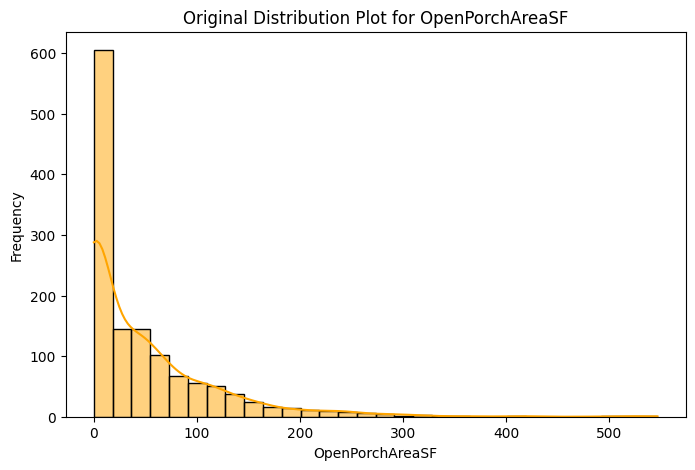

Lower Limit for OpenPorchAreaSF: -105.0
Upper Limit for OpenPorchAreaSF: 175.0


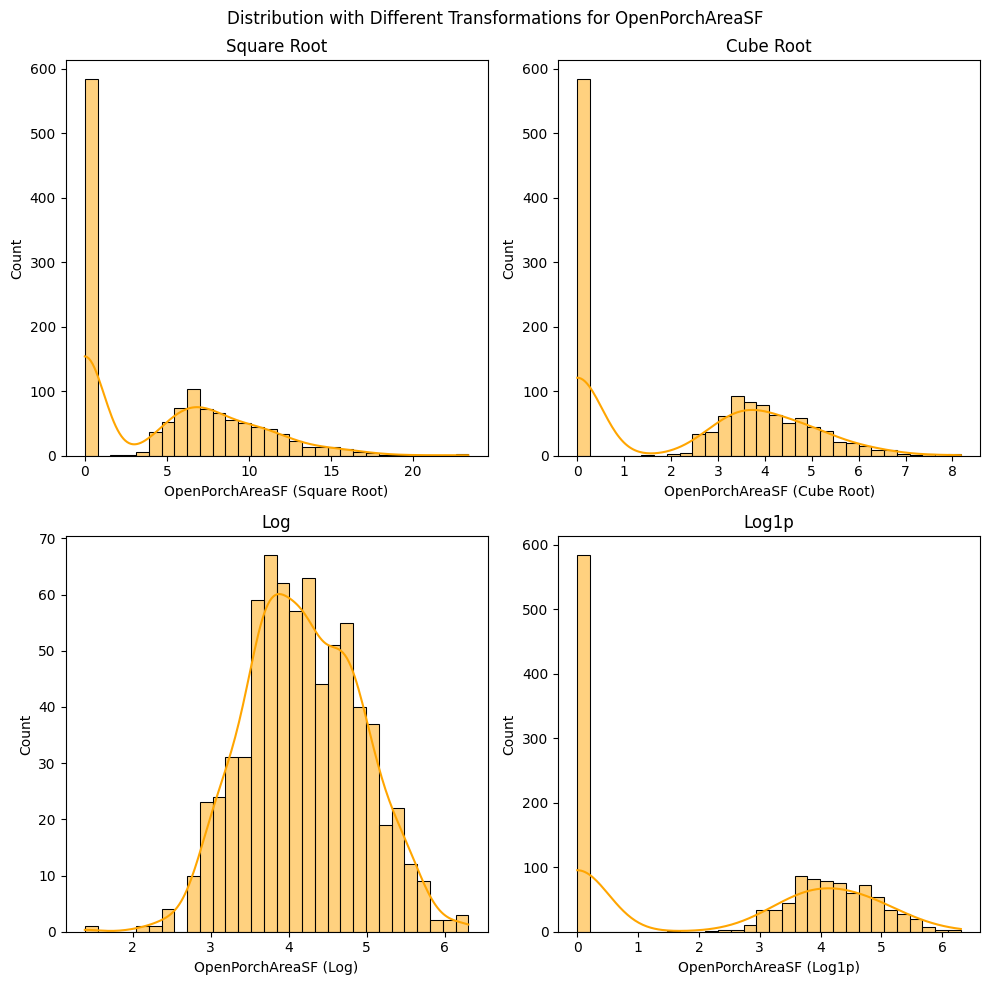

In [ ]:
plot_distribution(train_data[numerical_cols[16]],transformations)

* Column exhibit right skeweness with large number of zero values,we can observe that  cubic root and log  can manage handling skewness efficetvely,but due to the existence of large number of zero values,log method can't be used for the column transformation.

In [ ]:
analyze_outliers(train_data[numerical_cols[16]],transformations)

Original Column: OpenPorchAreaSF
Number of outliers: 68
Percentage of outliers: 5.18%


Transformation: Square Root
Number of outliers: 3
Percentage of outliers: 0.23%


Transformation: Cube Root
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 0
Percentage of outliers: 0.00%




* based on the distribution and the outliers,cubic root method seems to be the most effective one for handling sequence resulting in outliers removal.

In [ ]:
inspect_outliers(train_data[numerical_cols[16]])

Column: OpenPorchAreaSF
Lower Limit: -105.0
Upper Limit: 175.0
10th Percentile: 0.0
90th Percentile: 131.70000000000005
Number of outliers: 68
Percentage of outliers: 5.18%
Outliers:
120     199
124     229
172     207
204     502
214     224
242     214
246     205
256     192
262     243
269     267
278     192
279     184
283     182
295     191
312     211
346     234
386     184
416     211
446     189
450     244
460     204
492     312
511     406
525     265
546     238
619     207
623     228
633     176
641     292
661     204
729     288
733     364
736     187
746     285
750     523
755     258
782     208
784     260
790     252
813     234
818     228
827     240
839     341
900     287
918     319
946     198
990     291
993     282
1024    304
1048    547
1091    210
1111    188
1113    250
1124    231
1126    418
1128    235
1130    184
1151    236
1155    312
1160    185
1209    192
1217    213
1250    247
1258    262
1289    263
1301    200
1303    234
1312    240
N

In [ ]:
train_data[numerical_cols[16]] = np.cbrt(train_data[numerical_cols[16]])
val_data[numerical_cols[16]] = np.cbrt(val_data[numerical_cols[16]])
test_data[numerical_cols[16] ] = np.cbrt(test_data[numerical_cols[16]])

In [ ]:
inspect_outliers(train_data[numerical_cols[16]])

Column: OpenPorchAreaSF
Lower Limit: -6.181927949712835
Upper Limit: 10.303213249521392
10th Percentile: 0.0
90th Percentile: 5.087776282201454
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: OpenPorchAreaSF, dtype: float64)





<font size="+2" color="black">**```EnclosedProchAreaSF```**<font>

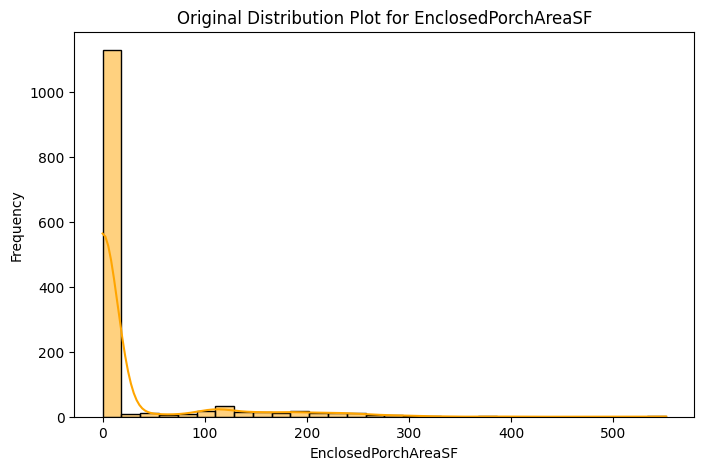

Lower Limit for EnclosedPorchAreaSF: 0.0
Upper Limit for EnclosedPorchAreaSF: 0.0


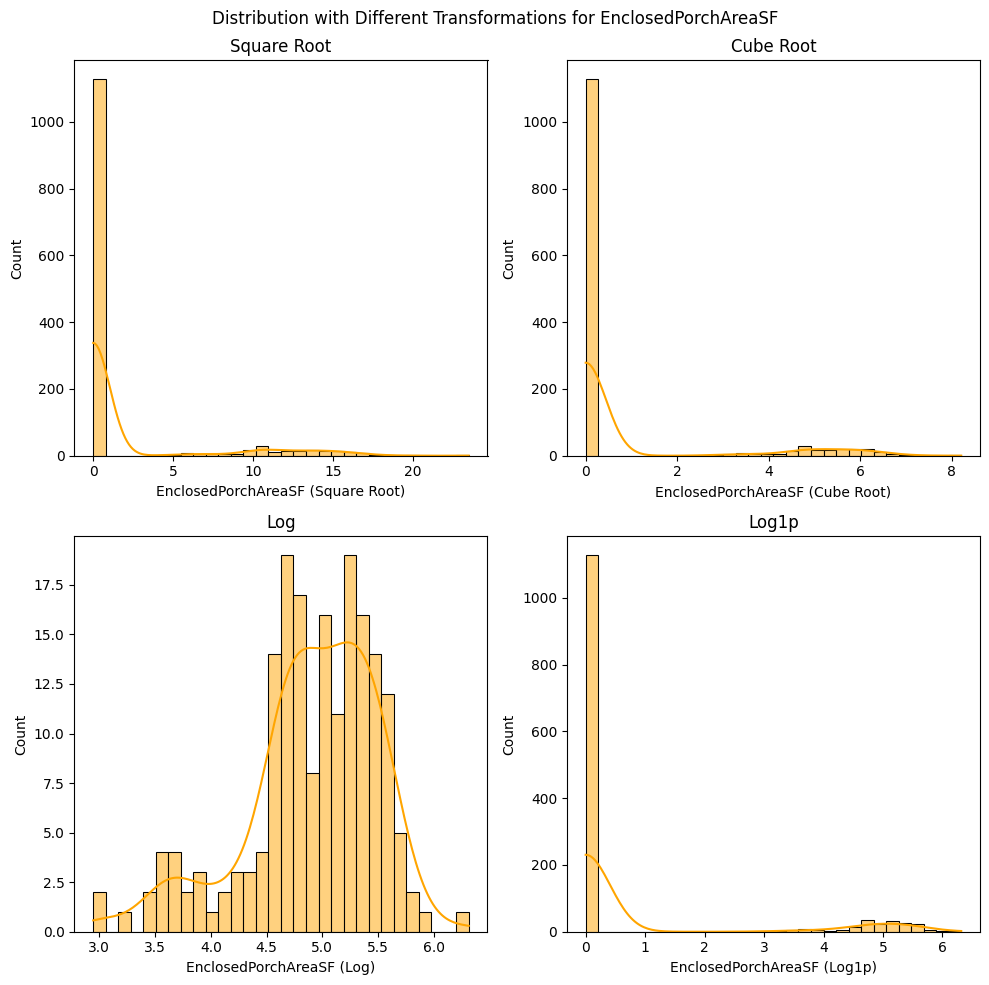

In [ ]:
plot_distribution(train_data[numerical_cols[17]],transformations)

* As we found in many previous columns,this column has almost all values zero,which won't be very effective to keep or get any information from it,also it's lower and upper limit are zeros means that the outlier values will be very small non-information number,so we will go to remove.

In [ ]:
analyze_outliers(train_data[numerical_cols[17]],transformations)

Original Column: EnclosedPorchAreaSF
Number of outliers: 186
Percentage of outliers: 14.16%


Transformation: Square Root
Number of outliers: 186
Percentage of outliers: 14.16%


Transformation: Cube Root
Number of outliers: 186
Percentage of outliers: 14.16%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 186
Percentage of outliers: 14.16%




In [ ]:
inspect_outliers(train_data[numerical_cols[17]])

Column: EnclosedPorchAreaSF
Lower Limit: 0.0
Upper Limit: 0.0
10th Percentile: 0.0
90th Percentile: 112.0
Number of outliers: 186
Percentage of outliers: 14.16%
Outliers:
3       100
4        67
6       200
8        48
12      144
18      102
23      318
26      138
32      190
37      126
39       64
45      112
51      172
53      102
56      218
62      108
64      224
72      294
80      164
83       98
97       37
99      148
107      94
110     116
125      70
137     120
148     164
149     264
150     242
156     252
162     192
166     112
172     162
177      96
190      81
191     102
192     128
196     228
201     184
211     176
222      36
223     275
234     158
244     112
258     120
272     192
278     224
284     236
308     226
313     126
314     120
315      34
331     108
332     112
335      42
361      68
365     156
368     293
373     221
378     252
387     268
388     144
389     158
393     252
403     220
407     244
417     272
427      77
434     192
4

In [ ]:
train_data.drop(numerical_cols[17],axis=1,inplace=True)
val_data.drop(numerical_cols[17],axis=1,inplace=True)
test_data.drop(numerical_cols[17],axis=1,inplace=True)


<font size="+2" color="black">**```ThreeSeasonPorchAreaSF```**<font>

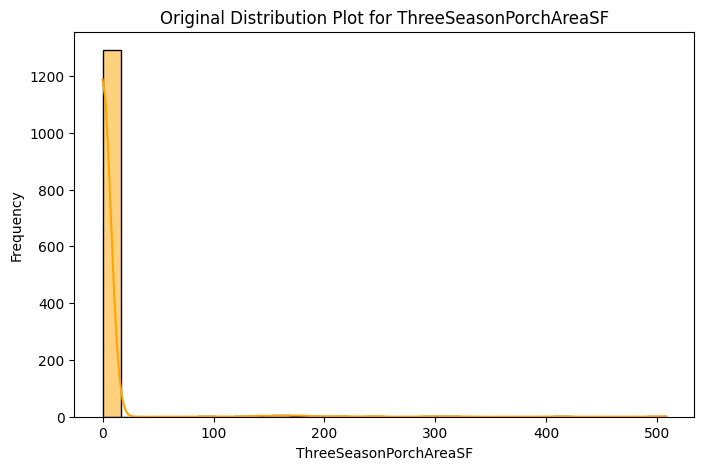

Lower Limit for ThreeSeasonPorchAreaSF: 0.0
Upper Limit for ThreeSeasonPorchAreaSF: 0.0


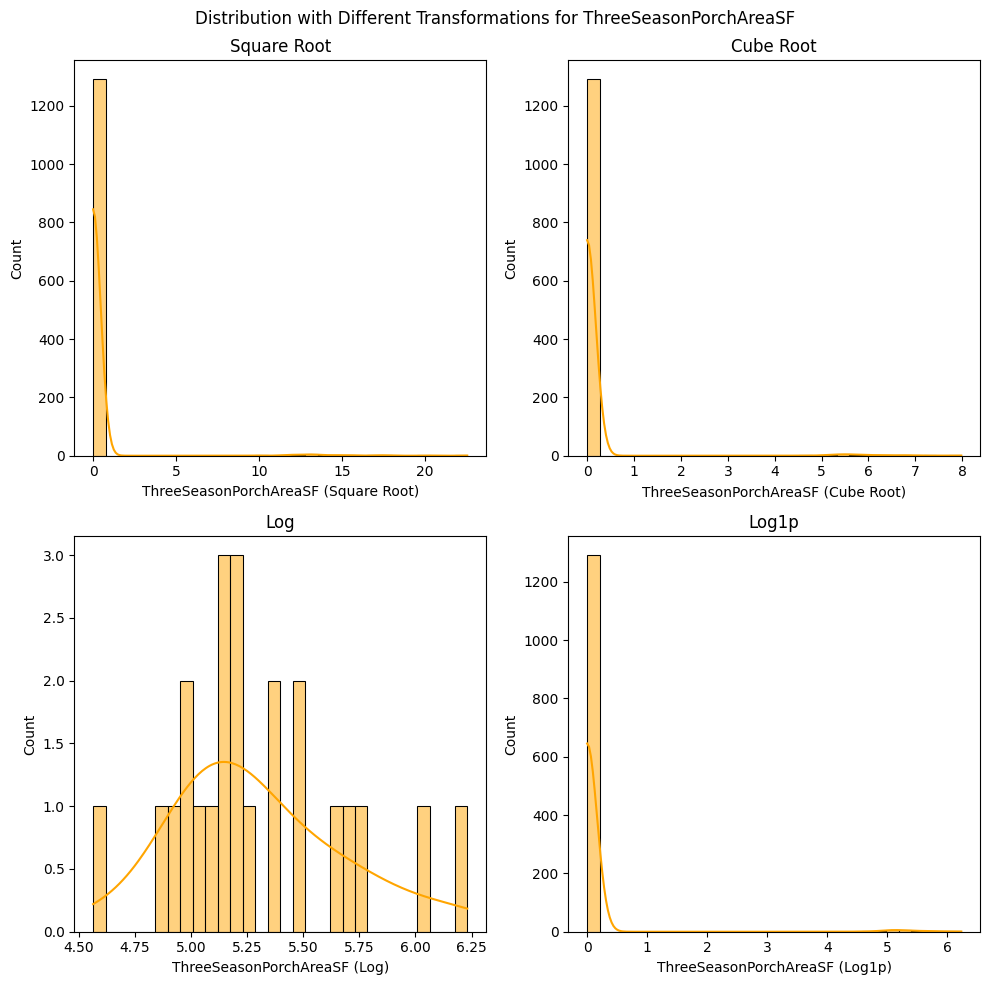

In [ ]:
plot_distribution(train_data[numerical_cols[18]],transformations)

* As the previous column,this one also have the same problem of all values equal to zero,which is not very efficetive.so we will remove.

In [ ]:
analyze_outliers(train_data[numerical_cols[18]],transformations)

Original Column: ThreeSeasonPorchAreaSF
Number of outliers: 23
Percentage of outliers: 1.75%


Transformation: Square Root
Number of outliers: 23
Percentage of outliers: 1.75%


Transformation: Cube Root
Number of outliers: 23
Percentage of outliers: 1.75%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 23
Percentage of outliers: 1.75%




In [ ]:
inspect_outliers(train_data[numerical_cols[18]])

Column: ThreeSeasonPorchAreaSF
Lower Limit: 0.0
Upper Limit: 0.0
10th Percentile: 0.0
90th Percentile: 0.0
Number of outliers: 23
Percentage of outliers: 1.75%
Outliers:
34       96
96      238
125     168
182     162
265     144
285     180
421     320
500     407
503     130
521     216
528     196
533     180
613     168
645     290
672     245
766     153
846     216
890     168
968     182
1022    144
1222    140
1248    508
1295    304
Name: ThreeSeasonPorchAreaSF, dtype: int64




Drop the column as it will not be effective.

In [ ]:
train_data.drop(numerical_cols[18],axis=1,inplace=True)
val_data.drop(numerical_cols[18],axis=1,inplace=True)
test_data.drop(numerical_cols[18],axis=1,inplace=True)


<font size="+2" color="black">**```ScreenPorchAreaSF```**<font>

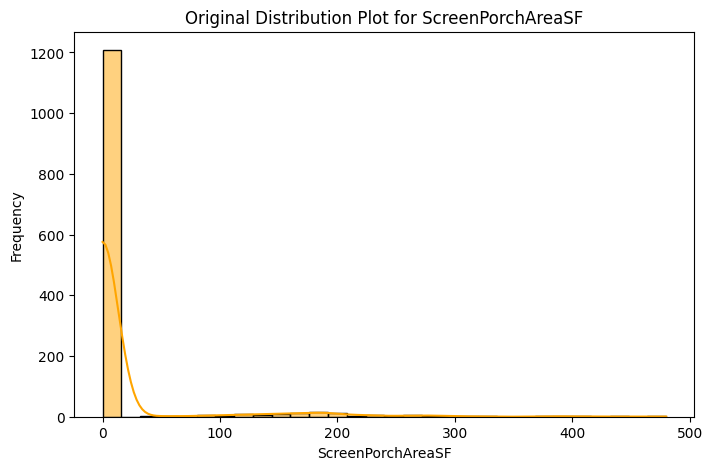

Lower Limit for ScreenPorchAreaSF: 0.0
Upper Limit for ScreenPorchAreaSF: 0.0


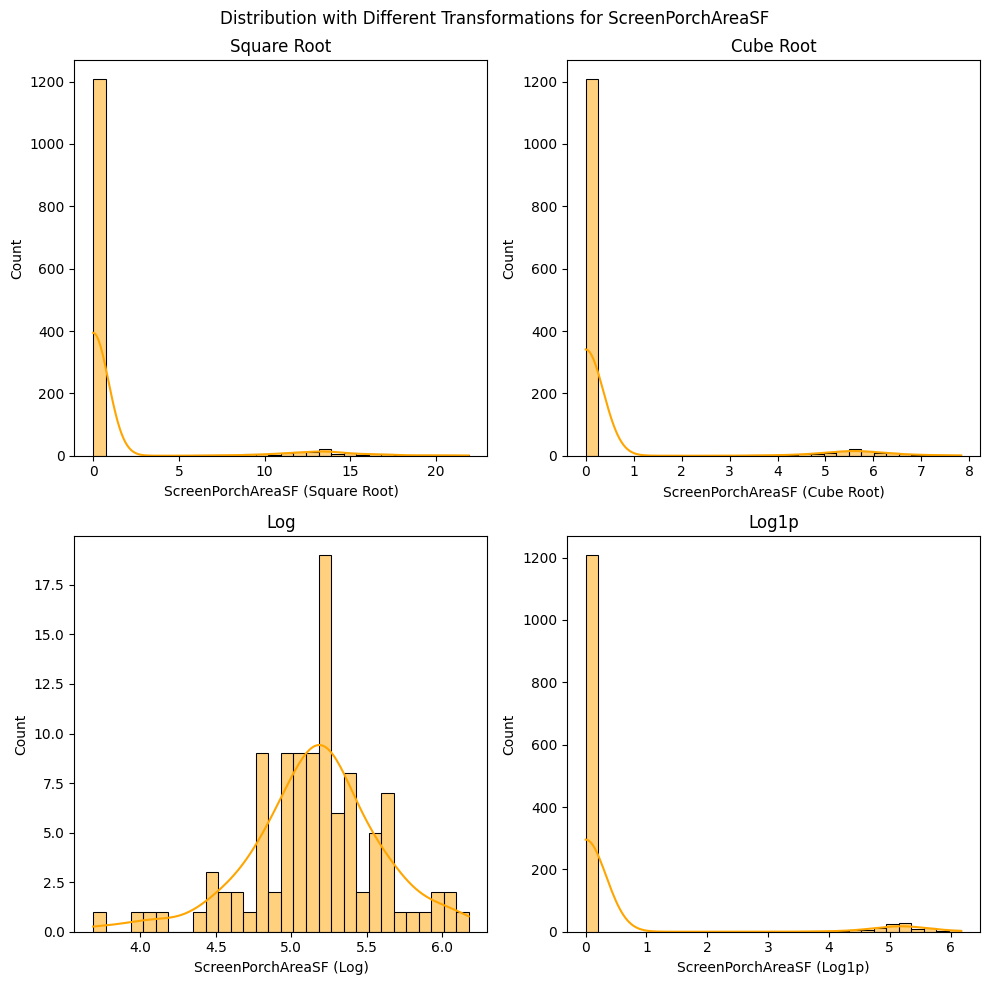

In [ ]:
plot_distribution(train_data[numerical_cols[19]],transformations)

* it seems that all the columns of PorchAreaSF having the same problem,which is a good indcator that if they all have zero values this explains the absence of the PorchArea.So we will also remove this column since it have the same problem of great bias to zero only.

In [ ]:
analyze_outliers(train_data[numerical_cols[19]],transformations)

Original Column: ScreenPorchAreaSF
Number of outliers: 106
Percentage of outliers: 8.07%


Transformation: Square Root
Number of outliers: 106
Percentage of outliers: 8.07%


Transformation: Cube Root
Number of outliers: 106
Percentage of outliers: 8.07%


Transformation: Log
Number of outliers: 0
Percentage of outliers: 0.00%


Transformation: Log1p
Number of outliers: 106
Percentage of outliers: 8.07%




In [ ]:
inspect_outliers(train_data[numerical_cols[19]])

Column: ScreenPorchAreaSF
Lower Limit: 0.0
Upper Limit: 0.0
10th Percentile: 0.0
90th Percentile: 0.0
Number of outliers: 106
Percentage of outliers: 8.07%
Outliers:
0       322
20      198
79      234
89      259
92      154
109     165
117     396
118     266
132      60
159     189
202     222
206     155
228     197
229     271
243     128
247     260
248     160
250     120
267     170
275     216
303      80
318      95
320     276
335     116
345     180
391     176
415     161
431     224
481     189
486     189
491     147
501      40
506     291
507     100
529     374
530     145
543     126
549     252
581     200
614     233
615     184
619     224
639      90
644     156
648     192
654     168
674      90
683     170
695     189
713     192
714     225
716     192
720     163
721     143
734     100
737     153
739     192
768     120
784     410
802     185
805      90
818     192
825     120
833     142
850     190
871     126
877     175
895     178
914     119
915   

In [ ]:
train_data.drop(numerical_cols[19],axis=1,inplace=True)
val_data.drop(numerical_cols[19],axis=1,inplace=True)
test_data.drop(numerical_cols[19],axis=1,inplace=True)


<font size="+2" color="black">**```MiscellaneousValue```**<font>

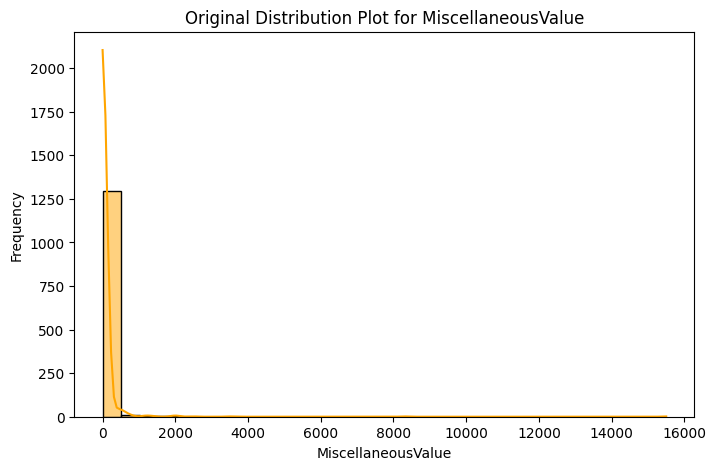

Lower Limit for MiscellaneousValue: 0.0
Upper Limit for MiscellaneousValue: 0.0


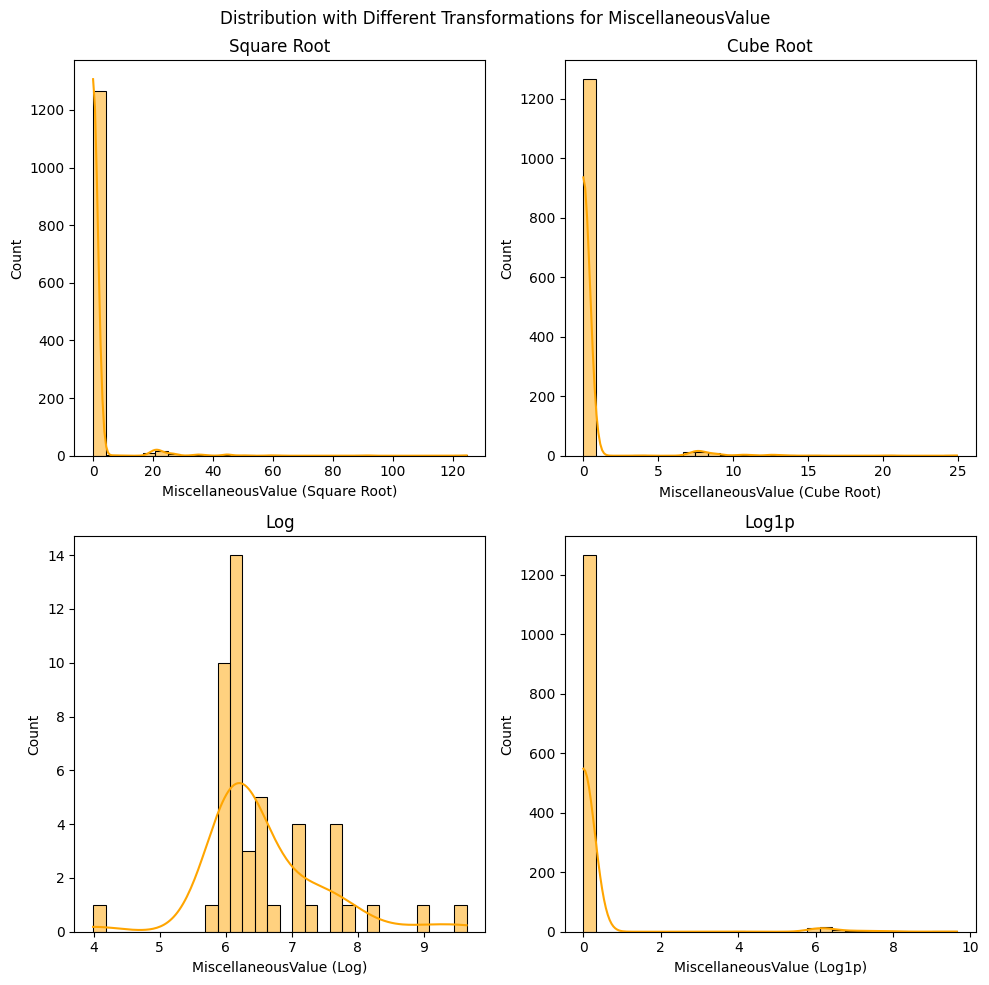

In [ ]:
plot_distribution(train_data[numerical_cols[20]],transformations)

* We've encountered a similar issue with a high frequency of zero values in this column, which corresponds to the presence of the Miscellaneous Feature within property descriptions. As we found that this feature contained 96% missing values during preprocessing, we opted to drop the entire column. Since a zero value in this column indicates the absence of the corresponding feature, we'll take the same approach and remove this column from the dataset.

In [ ]:
train_data.drop(numerical_cols[20],axis=1,inplace=True)
val_data.drop(numerical_cols[20],axis=1,inplace=True)
test_data.drop(numerical_cols[20],axis=1,inplace=True)

### 4.4) Encoding

Getting all the categorical columns.

In [ ]:
categorical_col=train_data.select_dtypes(include=['object']).columns



<font size="+2" color="black"> **```DwellingTypeSubClass```**</font>

In [ ]:
train_data[categorical_col[0]].value_counts()

DwellingTypeSubClass
20     476
60     266
50     130
120     77
30      60
70      58
160     58
80      56
90      48
190     29
85      19
75      15
45      11
180      8
40       3
Name: count, dtype: int64

Based on its values, the values appears to be numeric, but it's currently categorized. Therefore, we'll convert it to numeric values.

In [ ]:
train_data[categorical_col[0]] = train_data[categorical_col[0]].astype(int)
val_data[categorical_col[0]] = val_data[categorical_col[0]].astype(int)
test_data[categorical_col[0]] = test_data[categorical_col[0]].astype(int)



<font size="+2" color="black"> **```ZoningClassification```**</font>

In [ ]:
train_data[categorical_col[1]].value_counts()

ZoningClassification
RL         1039
RM          192
FV           60
RH           15
C (all)       8
Name: count, dtype: int64

For this column's categories,we will encode these categories based on their frequency of occurences.

In [ ]:
freq_zone = train_data[categorical_col[1]].value_counts().to_dict()

train_data[categorical_col[1]] = train_data[categorical_col[1]].map(freq_zone)
val_data[categorical_col[1]] = val_data[categorical_col[1]].map(freq_zone)
test_data[categorical_col[1]] = test_data[categorical_col[1]].map(freq_zone)

Ensure that the encoding has been successfully applied.


In [ ]:
train_data[categorical_col[1]].value_counts()

ZoningClassification
1039    1039
192      192
60        60
15        15
8          8
Name: count, dtype: int64



<font size="+2" color="black"> **```RoadAccessType```**</font>

In [ ]:
train_data[categorical_col[2]].value_counts()

RoadAccessType
Pave    1309
Grvl       5
Name: count, dtype: int64

We will drop this column because it contains only two categories, and the frequency of the second category is only 6. This indicates that all occurrences of this column have the same value **`(Pave)`**, which is not informative.

In [ ]:
train_data.drop(categorical_col[2],axis=1,inplace=True)
val_data.drop(categorical_col[2],axis=1,inplace=True)
test_data.drop(categorical_col[2],axis=1,inplace=True)



<font size="+2" color="black"> **```LotShape```**</font>

In [ ]:
train_data[categorical_col[3]].value_counts()

LotShape
Reg    828
IR1    437
IR2     40
IR3      9
Name: count, dtype: int64

Considering the regular sequence of values **`(1, 2, 3,Reg)`** in this column that indicates the presence of order or importance, we will perform ordinal encoding.

In [ ]:
freq_shape={
    'IR3':0,
    "IR2":1,
    'IR1':2,
    'Reg':3
}
train_data[categorical_col[3]]=train_data[categorical_col[3]].map(freq_shape)
val_data[categorical_col[3]]=val_data[categorical_col[3]].map(freq_shape)
test_data[categorical_col[3]]=test_data[categorical_col[3]].map(freq_shape)

In [ ]:
train_data[categorical_col[3]].value_counts()

LotShape
3    828
2    437
1     40
0      9
Name: count, dtype: int64



<font size="+2" color="black"> **```LandFlatness```**</font>

In [ ]:
train_data[categorical_col[4]].value_counts()

LandFlatness
Lvl    1182
Bnk      56
HLS      43
Low      33
Name: count, dtype: int64

Proceeding again with ordinal encoding,due to the importance or sequence order of values in this column.

In [ ]:
freq_land_flatness={
    'Low':0,
    "HLS":1,
    'Bnk':2,
    'Lvl':3
}
train_data[categorical_col[4]]=train_data[categorical_col[4]].map(freq_land_flatness)
val_data[categorical_col[4]]=val_data[categorical_col[4]].map(freq_land_flatness)
test_data[categorical_col[4]]=test_data[categorical_col[4]].map(freq_land_flatness)

In [ ]:
train_data[categorical_col[4]].value_counts()

LandFlatness
3    1182
2      56
1      43
0      33
Name: count, dtype: int64



<font size="+2" color="black"> **```UtilitiesAvailable```**</font>

In [ ]:
train_data[categorical_col[5]].value_counts()

UtilitiesAvailable
AllPub    1313
NoSeWa       1
Name: count, dtype: int64

 Observed that there is only one occurrence of the second category, while the rest of the records belong to the first category, we'll drop this column as it does not provide useful information.

In [ ]:
train_data.drop(categorical_col[5],axis=1,inplace=True)
val_data.drop(categorical_col[5],axis=1,inplace=True)
test_data.drop(categorical_col[5],axis=1,inplace=True)



<font size="+2" color="black"> **```LotConfiguration```**</font>

In [ ]:
train_data[categorical_col[6]].value_counts()

LotConfiguration
Inside     941
Corner     235
CulDSac     91
FR2         44
FR3          3
Name: count, dtype: int64

Proceeding again with ordinal encoding,due to the importance or sequence order of values in this column.

In [ ]:
freq_lot_config={
    'FR3':0,
    "FR2":1,
    'CulDSac':2,
    'Corner':3,
    'Inside':4
}
train_data[categorical_col[6]]=train_data[categorical_col[6]].map(freq_lot_config)
val_data[categorical_col[6]]=val_data[categorical_col[6]].map(freq_lot_config)
test_data[categorical_col[6]]=test_data[categorical_col[6]].map(freq_lot_config)

In [ ]:
train_data[categorical_col[6]].value_counts()

LotConfiguration
4    941
3    235
2     91
1     44
0      3
Name: count, dtype: int64



<font size="+2" color="black"> **```SlopeOfProperty```**</font>

In [ ]:
train_data[categorical_col[7]].value_counts()

SlopeOfProperty
Gtl    1243
Mod      59
Sev      12
Name: count, dtype: int64

Due to the presence  of the values **(Sev,Mod,Gtl)** that represents an order,we will perform ordinal encoding

In [ ]:
freq_slope_propetry = {
    'Sev':0,
    "Mod":1,
    'Gtl':2,
}
train_data[categorical_col[7]]=train_data[categorical_col[7]].map(freq_slope_propetry)
val_data[categorical_col[7]]=val_data[categorical_col[7]].map(freq_slope_propetry)
test_data[categorical_col[7]]=test_data[categorical_col[7]].map(freq_slope_propetry)

In [ ]:
train_data[categorical_col[7]].value_counts()

SlopeOfProperty
2    1243
1      59
0      12
Name: count, dtype: int64



<font size="+2" color="black"> **```Neighborhood```**</font>

In [ ]:
train_data[categorical_col[8]].value_counts()

Neighborhood
NAmes      201
CollgCr    130
OldTown    104
Edwards     97
Somerst     79
Gilbert     70
NWAmes      69
NridgHt     68
Sawyer      64
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     44
NoRidge     35
IDOTRR      33
Timber      32
ClearCr     25
StoneBr     24
SWISU       23
Blmngtn     17
BrDale      15
MeadowV     14
Veenker     10
NPkVill      8
Blueste      2
Name: count, dtype: int64

Given the challenge of encoding neighborhoods directly, we've decided to go for  **Target** encoding. Each neighborhood will be encoded using the mean SalePrice value associated with that neighborhood.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 942.6 kB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

neighbor_encoder = TargetEncoder()
train_data[categorical_col[8]] = neighbor_encoder.fit_transform(train_data[categorical_col[8]], train_data['SalePrice'])
val_data[categorical_col[8]] = neighbor_encoder.transform(val_data[categorical_col[8]])
test_data[categorical_col[8]] = neighbor_encoder.transform(test_data[categorical_col[8]])

In [ ]:
train_data[categorical_col[8]].value_counts()

Neighborhood
146939.478077    201
200717.981129    130
129581.294068    104
127204.329530     97
225431.069609     79
194874.269282     70
189079.017020     69
311163.766927     68
137432.702939     64
185430.127625     53
207283.920257     50
127359.059598     47
160893.506752     44
296109.863609     35
119733.768959     33
221220.124122     32
202384.087600     25
259296.493453     24
158902.770422     23
186733.244669     17
151592.044469     15
152127.768918     14
197525.747030     10
171810.650029      8
174576.096816      2
Name: count, dtype: int64

In [ ]:
import joblib

joblib.dump(neighbor_encoder,'neighbor_encoding.joblib')

['neighbor_encoding.joblib']



<font size="+2" color="black"> **```ProximityToConditions1```**</font>

In [ ]:
train_data[categorical_col[9]].value_counts()

ProximityToConditions1
Norm      1128
Feedr       76
Artery      45
RRAn        22
PosN        18
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

Proceeding again with ordinal encoding,due to the importance or sequence order of values in this column.

In [ ]:
freq_proximity1={
    'RRAe':0,
    "RRAn":0,
    'RRNn':1,
    'RRNe':1,
    'Norm':2,
    'Feedr':3,
    'Artery':4,
    'PosA':5,
    'PosN':6
}
train_data[categorical_col[9]]=train_data[categorical_col[9]].map(freq_proximity1)
val_data[categorical_col[9]]=val_data[categorical_col[9]].map(freq_proximity1)
test_data[categorical_col[9]]=test_data[categorical_col[9]].map(freq_proximity1)

In [ ]:
train_data[categorical_col[9]].value_counts()

ProximityToConditions1
2    1128
3      76
4      45
0      32
6      18
5       8
1       7
Name: count, dtype: int64



<font size="+2" color="black"> **```ProximityToConditions2```**</font>

In [ ]:
train_data[categorical_col[10]].value_counts()

ProximityToConditions2
Norm      1302
Feedr        4
PosN         2
Artery       2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: count, dtype: int64

Again given the highly imbalanced distribution of values in this column, where one class dominates while the others have minimal representation, we will  emove this column  as it doesn't provide meaningful information for our model.

In [ ]:
train_data.drop(categorical_col[10],axis=1,inplace=True)
val_data.drop(categorical_col[10],axis=1,inplace=True)
test_data.drop(categorical_col[10],axis=1,inplace=True)



<font size="+2" color="black"> **```DwellingType```**</font>

In [ ]:
train_data[categorical_col[11]].value_counts()

DwellingType
1Fam      1093
TwnhsE     103
Duplex      48
Twnhs       40
2fmCon      30
Name: count, dtype: int64

Due to the inherent order of these categories in the context of housing, we'll apply ordinal encoding to represent this hierarchy accurately.

In [ ]:
freq_dwelling_type={
    'TwnhsE':0,
    "Twnhs":1,
    'Duplex':2,
    '2fmCon':3,
    '1Fam':4,

}
train_data[categorical_col[11]]=train_data[categorical_col[11]].map(freq_dwelling_type)
val_data[categorical_col[11]]=val_data[categorical_col[11]].map(freq_dwelling_type)
test_data[categorical_col[11]]=test_data[categorical_col[11]].map(freq_dwelling_type)

In [ ]:
train_data[categorical_col[11]].value_counts()

DwellingType
4    1093
0     103
2      48
1      40
3      30
Name: count, dtype: int64



<font size="+2" color="black"> **```DwellingStyle```**</font>

In [ ]:
train_data[categorical_col[12]].value_counts()

DwellingStyle
1Story    643
2Story    405
1.5Fin    139
SLvl       63
SFoyer     33
1.5Unf     13
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64

In [ ]:
freq_dwelling_style = {
     'SFoyer': 1,
    'SLvl': 2,
    '1Story': 3,
    '1.5Unf': 4,
    '1.5Fin': 5,
    '2Story': 6,
    '2.5Unf': 7,
    '2.5Fin': 8

}
train_data[categorical_col[12]]=train_data[categorical_col[12]].map(freq_dwelling_style)
val_data[categorical_col[12]]=val_data[categorical_col[12]].map(freq_dwelling_style)
test_data[categorical_col[12]]=test_data[categorical_col[12]].map(freq_dwelling_style)

In [ ]:
train_data[categorical_col[12]].value_counts()

DwellingStyle
3    643
6    405
5    139
2     63
1     33
4     13
7     11
8      7
Name: count, dtype: int64



<font size="+2" color="black"> **```RoofStyle```**</font>

In [ ]:
train_data[categorical_col[13]].value_counts()

RoofStyle
Gable      1020
Hip         263
Flat         13
Gambrel      10
Mansard       6
Shed          2
Name: count, dtype: int64

In [ ]:
freq_roof_style = {
    'Gable': 4,
    'Hip': 6,
    'Gambrel': 3,
    'Mansard': 5,
    'Flat' : 2,
    'Shed': 1

}
train_data[categorical_col[13]]=train_data[categorical_col[13]].map(freq_roof_style)
val_data[categorical_col[13]]=val_data[categorical_col[13]].map(freq_roof_style)
test_data[categorical_col[13]]=test_data[categorical_col[13]].map(freq_roof_style)

In [ ]:
train_data[categorical_col[13]].value_counts()

RoofStyle
4    1020
6     263
2      13
3      10
5       6
1       2
Name: count, dtype: int64



<font size="+2" color="black"> **```RoofMaterial```**</font>

In [ ]:
train_data[categorical_col[14]].value_counts()

RoofMaterial
CompShg    1290
Tar&Grv      11
WdShngl       5
WdShake       4
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: count, dtype: int64

Again given the highly imbalanced distribution of values in this column, where one class dominates while the others have minimal representation, we will  emove this column  as it doesn't provide meaningful information for our model.

In [ ]:
train_data.drop(categorical_col[14],axis=1,inplace=True)
val_data.drop(categorical_col[14],axis=1,inplace=True)
test_data.drop(categorical_col[14],axis=1,inplace=True)



<font size="+2" color="black"> **```ExteriorCovering1```**</font>

In [ ]:
train_data[categorical_col[15]].value_counts()

ExteriorCovering1
VinylSd    463
MetalSd    199
HdBoard    198
Wd Sdng    189
Plywood     97
CemntBd     54
BrkFace     45
Stucco      24
WdShing     23
AsbShng     16
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Stone        1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
exterior1_encoder = LabelEncoder()
train_data[categorical_col[15]] = exterior1_encoder.fit_transform(train_data[categorical_col[15]])
val_data[categorical_col[15]] = exterior1_encoder.transform(val_data[categorical_col[15]])
test_data[categorical_col[15]] = exterior1_encoder.transform(test_data[categorical_col[15]])


In [ ]:
train_data[categorical_col[15]].value_counts()

ExteriorCovering1
12    463
8     199
6     198
13    189
9      97
5      54
3      45
11     24
14     23
0      16
2       2
7       1
4       1
1       1
10      1
Name: count, dtype: int64

In [ ]:
import joblib

joblib.dump(exterior1_encoder,'exterior1_encoder.joblib')

['exterior1_encoder.joblib']



<font size="+2" color="black"> **```ExteriorCovering2```**</font>

In [ ]:
train_data[categorical_col[16]].value_counts()

ExteriorCovering2
VinylSd    453
MetalSd    192
HdBoard    184
Wd Sdng    179
Plywood    131
CmentBd     53
Wd Shng     36
Stucco      26
BrkFace     21
AsbShng     17
ImStucc      7
Brk Cmn      6
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [ ]:
exterior2_encoder = LabelEncoder()
train_data[categorical_col[16]] = exterior2_encoder.fit_transform(train_data[categorical_col[16]])
val_data[categorical_col[16]] = exterior2_encoder.transform(val_data[categorical_col[16]])
test_data[categorical_col[16]] = exterior2_encoder.transform(test_data[categorical_col[16]])

In [ ]:
train_data[categorical_col[16]].value_counts()

ExteriorCovering2
13    453
8     192
6     184
14    179
10    131
5      53
15     36
12     26
3      21
0      17
7       7
2       6
11      4
1       3
9       1
4       1
Name: count, dtype: int64

In [ ]:
import joblib

joblib.dump(exterior2_encoder,'exterior2_encoder.joblib')

['exterior2_encoder.joblib']



<font size="+2" color="black"> **```ExteriorQuality```**</font>

In [ ]:
train_data[categorical_col[17]].value_counts()

ExteriorQuality
TA    815
Gd    441
Ex     46
Fa     12
Name: count, dtype: int64

In [ ]:
freq_exteriorQual = {
    'Fa':0,
    "TA":1,
    'Gd':2,
    'Ex':3,
}
train_data[categorical_col[17]]=train_data[categorical_col[17]].map(freq_exteriorQual)
val_data[categorical_col[17]]=val_data[categorical_col[17]].map(freq_exteriorQual)
test_data[categorical_col[17]]=test_data[categorical_col[17]].map(freq_exteriorQual)

In [ ]:
train_data[categorical_col[17]].value_counts()

ExteriorQuality
1    815
2    441
3     46
0     12
Name: count, dtype: int64



<font size="+2" color="black"> **```ExteriorCondition```**</font>

In [ ]:
train_data[categorical_col[18]].value_counts()

ExteriorCondition
TA    1146
Gd     138
Fa      26
Ex       3
Po       1
Name: count, dtype: int64

In [ ]:
freq_exteriorCond = {
    'Po':0,
    "Fa":1,
    'TA':2,
    'Gd':3,
    'Ex':4
}

train_data[categorical_col[18]]=train_data[categorical_col[18]].map(freq_exteriorCond)
val_data[categorical_col[18]]=val_data[categorical_col[18]].map(freq_exteriorCond)
test_data[categorical_col[18]]=test_data[categorical_col[18]].map(freq_exteriorCond)

In [ ]:
train_data[categorical_col[18]].value_counts()

ExteriorCondition
2    1146
3     138
1      26
4       3
0       1
Name: count, dtype: int64



<font size="+2" color="black"> **```FoundationType```**</font>

In [ ]:
train_data[categorical_col[19]].value_counts()

FoundationType
PConc     578
CBlock    574
BrkTil    132
Slab       21
Stone       6
Wood        3
Name: count, dtype: int64

In [ ]:
foundation_encoder = TargetEncoder()
train_data[categorical_col[19]] = foundation_encoder.fit_transform(train_data[categorical_col[19]], train_data['SalePrice'])
val_data[categorical_col[19]] = foundation_encoder.transform(val_data[categorical_col[19]])
test_data[categorical_col[19]] = foundation_encoder.transform(test_data[categorical_col[19]])

In [ ]:
train_data[categorical_col[19]].value_counts()

FoundationType
224454.754325    578
150384.501742    574
133328.655406    132
141796.716327     21
177787.823529      6
181471.180582      3
Name: count, dtype: int64

In [ ]:
import joblib

joblib.dump(foundation_encoder,'foundation_encoder.joblib')

['foundation_encoder.joblib']



<font size="+2" color="black"> **```BasementHeight```**</font>

In [ ]:
train_data[categorical_col[20]].value_counts()

BasementHeight
TA             586
Gd             555
Ex             109
Fa              32
No Basement     32
Name: count, dtype: int64

In [ ]:
freq_base_height = {
    "No Basement":-1,
    "Fa":1,
    'TA':2,
    'Gd':3,
    'Ex':4
}
train_data[categorical_col[20]]=train_data[categorical_col[20]].map(freq_base_height)
val_data[categorical_col[20]]=val_data[categorical_col[20]].map(freq_base_height)
test_data[categorical_col[20]]=test_data[categorical_col[20]].map(freq_base_height)

In [ ]:
train_data[categorical_col[20]].value_counts()

BasementHeight
 2    586
 3    555
 4    109
 1     32
-1     32
Name: count, dtype: int64



<font size="+2" color="black"> **```BasementCondition```**</font>

In [ ]:
train_data[categorical_col[21]].value_counts()

BasementCondition
TA             1175
Gd               62
Fa               44
No Basement      32
Po                1
Name: count, dtype: int64

In [ ]:
freq_base_cond = {
    "No Basement":-1,
    "Po":0,
    "Fa":1,
    'TA':2,
    'Gd':3,
    'Ex':4
}
train_data[categorical_col[21]]=train_data[categorical_col[21]].map(freq_base_cond)
val_data[categorical_col[21]]=val_data[categorical_col[21]].map(freq_base_cond)
test_data[categorical_col[21]]=test_data[categorical_col[21]].map(freq_base_cond)

In [ ]:
train_data[categorical_col[21]].value_counts()

BasementCondition
 2    1175
 3      62
 1      44
-1      32
 0       1
Name: count, dtype: int64



<font size="+2" color="black"> **```BasementExposure```**</font>

In [ ]:
train_data[categorical_col[22]].value_counts()

BasementExposure
No             861
Av             199
Gd             117
Mn             104
No Basement     32
TA               1
Name: count, dtype: int64

In [ ]:
freq_base_expo = {
    "No Basement":-1,
    "No":0,
    "Mn":1,
    'Av':2,
    'Gd':3,
    'TA':4
}
train_data[categorical_col[22]]=train_data[categorical_col[22]].map(freq_base_expo)
val_data[categorical_col[22]]=val_data[categorical_col[22]].map(freq_base_expo)
test_data[categorical_col[22]]=test_data[categorical_col[22]].map(freq_base_expo)

In [ ]:
train_data[categorical_col[22]].value_counts()

BasementExposure
 0    861
 2    199
 3    117
 1    104
-1     32
 4      1
Name: count, dtype: int64



<font size="+2" color="black"> **```BasementFinishType1```**</font>

In [ ]:
train_data[categorical_col[23]].value_counts()

BasementFinishType1
Unf            388
GLQ            373
ALQ            201
BLQ            134
Rec            118
LwQ             68
No Basement     32
Name: count, dtype: int64

In [ ]:
freq_base_fin1 = {
    "Unf":0,
    "GLQ":5,
    "ALQ":4,
    'BLQ':3,
    'Rec':2,
    'LwQ':1,
    'No Basement': -1

}
train_data[categorical_col[23]]=train_data[categorical_col[23]].map(freq_base_fin1)
val_data[categorical_col[23]]=val_data[categorical_col[23]].map(freq_base_fin1)
test_data[categorical_col[23]]=test_data[categorical_col[23]].map(freq_base_fin1)

In [ ]:
train_data[categorical_col[23]].value_counts()

BasementFinishType1
 0    388
 5    373
 4    201
 3    134
 2    118
 1     68
-1     32
Name: count, dtype: int64



<font size="+2" color="black"> **```BasementFinishType2```**</font>

In [ ]:
train_data[categorical_col[24]].value_counts()

BasementFinishType2
Unf            1139
Rec              49
LwQ              38
No Basement      32
BLQ              26
ALQ              18
GLQ              12
Name: count, dtype: int64

In [ ]:
freq_base_fin2 = {
    "Unf":0,
    "GLQ":5,
    "ALQ":4,
    'BLQ':3,
    'Rec':2,
    'LwQ':1,
    'No Basement': -1
}

train_data[categorical_col[24]]=train_data[categorical_col[24]].map(freq_base_fin2)
val_data[categorical_col[24]]=val_data[categorical_col[24]].map(freq_base_fin2)
test_data[categorical_col[24]]=test_data[categorical_col[24]].map(freq_base_fin2)

In [ ]:
train_data[categorical_col[24]].value_counts()

BasementFinishType2
 0    1139
 2      49
 1      38
-1      32
 3      26
 4      18
 5      12
Name: count, dtype: int64



<font size="+2" color="black"> **```HeatingType```**</font>

In [ ]:
train_data[categorical_col[25]].value_counts()

HeatingType
GasA     1286
GasW       15
Grav        6
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [ ]:
freq_heating_type = {
    "GasA":5,
    "GasW":4,
    "Grav":3,
    'Wall':2,
    'OthW':0,
    'Floor': 1
}
train_data[categorical_col[25]]=train_data[categorical_col[25]].map(freq_heating_type)
val_data[categorical_col[25]]=val_data[categorical_col[25]].map(freq_heating_type)
test_data[categorical_col[25]]=test_data[categorical_col[25]].map(freq_heating_type)

In [ ]:
train_data[categorical_col[25]].value_counts()

HeatingType
5    1286
4      15
3       6
2       4
0       2
1       1
Name: count, dtype: int64



<font size="+2" color="black"> **```HeatingQualityCondition```**</font>

In [ ]:
train_data[categorical_col[26]].value_counts()

HeatingQualityCondition
Ex    663
TA    386
Gd    219
Fa     45
Po      1
Name: count, dtype: int64

In [ ]:
freq_heating_qual = {
    "Po":0,
    "Fa":1,
    "Gd":2,
    'TA':3,
    'Ex':4,
}

train_data[categorical_col[26]]=train_data[categorical_col[26]].map(freq_heating_qual)
val_data[categorical_col[26]]=val_data[categorical_col[26]].map(freq_heating_qual)
test_data[categorical_col[26]]=test_data[categorical_col[26]].map(freq_heating_qual)

In [ ]:
train_data[categorical_col[26]].value_counts()

HeatingQualityCondition
4    663
3    386
2    219
1     45
0      1
Name: count, dtype: int64



<font size="+2" color="black"> **```CentralAirConditioning```**</font>

In [ ]:
train_data[categorical_col[27]].value_counts()

CentralAirConditioning
Y    1226
N      88
Name: count, dtype: int64

In [ ]:
train_data.drop(categorical_col[27],axis=1,inplace=True)
val_data.drop(categorical_col[27],axis=1,inplace=True)
test_data.drop(categorical_col[27],axis=1,inplace=True)



<font size="+2" color="black"> **```ElectricalSystem```**</font>

In [ ]:
train_data[categorical_col[28]].value_counts()

ElectricalSystem
SBrkr    1205
FuseA      80
FuseF      26
FuseP       3
Name: count, dtype: int64

In [ ]:
freq_electricalsys = {
    "Mix":0,
    "FuseP":1,
    "FuseF":2,
    'FuseA':3,
    'SBrkr':4,
}

train_data[categorical_col[28]]=train_data[categorical_col[28]].map(freq_electricalsys)
val_data[categorical_col[28]]=val_data[categorical_col[28]].map(freq_electricalsys)
test_data[categorical_col[28]]=test_data[categorical_col[28]].map(freq_electricalsys)

In [ ]:
train_data[categorical_col[28]].value_counts()

ElectricalSystem
4    1205
3      80
2      26
1       3
Name: count, dtype: int64



<font size="+2" color="black"> **```KitchenQuality```**</font>

In [ ]:
train_data[categorical_col[29]].value_counts()

KitchenQuality
TA    663
Gd    529
Ex     87
Fa     35
Name: count, dtype: int64

In [ ]:
freq_kitchen_qual = {
    "Fa":0,
    "Gd":1,
    'TA':2,
    'Ex':3,
}

train_data[categorical_col[29]]=train_data[categorical_col[29]].map(freq_kitchen_qual)
val_data[categorical_col[29]]=val_data[categorical_col[29]].map(freq_kitchen_qual)
test_data[categorical_col[29]]=test_data[categorical_col[29]].map(freq_kitchen_qual)

In [ ]:
train_data[categorical_col[29]].value_counts()

KitchenQuality
2    663
1    529
3     87
0     35
Name: count, dtype: int64



<font size="+2" color="black"> **```HomeFunctionality```**</font>

In [ ]:
train_data[categorical_col[30]].value_counts()

HomeFunctionality
Typ     1222
Min2      33
Min1      29
Mod       14
Maj1      11
Maj2       4
Sev        1
Name: count, dtype: int64

In [ ]:
freq_home_functionality = {
    "Typ":6,
    "Min2":4,
    "Min1":5,
    'Mod':3,
    'Maj1':2,
    'Maj2':1,
    'Sev':0
}

train_data[categorical_col[30]]=train_data[categorical_col[30]].map(freq_home_functionality)
val_data[categorical_col[30]]=val_data[categorical_col[30]].map(freq_home_functionality)
test_data[categorical_col[30]]=test_data[categorical_col[30]].map(freq_home_functionality)

In [ ]:
train_data[categorical_col[30]].value_counts()

HomeFunctionality
6    1222
4      33
5      29
3      14
2      11
1       4
0       1
Name: count, dtype: int64



<font size="+2" color="black"> **```GarageLocation```**</font>

In [ ]:
train_data[categorical_col[31]].value_counts()

GarageLocation
Attchd       776
Detchd       349
BuiltIn       82
No Garage     73
Basment       19
CarPort        9
2Types         6
Name: count, dtype: int64

In [ ]:
freq_garage_loc = {
    "No Garage":-1,
    "Detchd":1,
    'CarPort':2,
    'BuiltIn':3,
    'Basment':4,
    'Attchd':5,
    '2Types':6
}

train_data[categorical_col[31]]=train_data[categorical_col[31]].map(freq_garage_loc)
val_data[categorical_col[31]]=val_data[categorical_col[31]].map(freq_garage_loc)
test_data[categorical_col[31]]=test_data[categorical_col[31]].map(freq_garage_loc)

In [ ]:
train_data[categorical_col[31]].value_counts()

GarageLocation
 5    776
 1    349
 3     82
-1     73
 4     19
 2      9
 6      6
Name: count, dtype: int64



<font size="+2" color="black"> **```GarageFinish```**</font>

In [ ]:
train_data[categorical_col[32]].value_counts()

GarageFinish
Unf          542
RFn          379
Fin          320
No Garage     73
Name: count, dtype: int64

In [ ]:
freq_garage_fin = {
    "No Garage":-1,
    "Unf":0,
    'RFn':1,
    'Fin':2,
}

train_data[categorical_col[32]]=train_data[categorical_col[32]].map(freq_garage_fin)
val_data[categorical_col[32]]=val_data[categorical_col[32]].map(freq_garage_fin)
test_data[categorical_col[32]]=test_data[categorical_col[32]].map(freq_garage_fin)

In [ ]:
train_data[categorical_col[32]].value_counts()

GarageFinish
 0    542
 1    379
 2    320
-1     73
Name: count, dtype: int64



<font size="+2" color="black"> **```GarageQuality```**</font>

In [ ]:
train_data[categorical_col[33]].value_counts()

GarageQuality
TA           1178
No Garage      73
Fa             44
Gd             14
Ex              3
Po              2
Name: count, dtype: int64

In [ ]:
freq_garage_qual = {
    "No Garage":-1,
    "Po":0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4,

}

train_data[categorical_col[33]]=train_data[categorical_col[33]].map(freq_garage_qual)
val_data[categorical_col[33]]=val_data[categorical_col[33]].map(freq_garage_qual)
test_data[categorical_col[33]]=test_data[categorical_col[33]].map(freq_garage_qual)

In [ ]:
train_data[categorical_col[33]].value_counts()

GarageQuality
 2    1178
-1      73
 1      44
 3      14
 4       3
 0       2
Name: count, dtype: int64



<font size="+2" color="black"> **```GarageCondition```**</font>

In [ ]:
train_data[categorical_col[34]].value_counts()

GarageCondition
TA           1190
No Garage      73
Fa             34
Gd              9
Po              6
Ex              2
Name: count, dtype: int64

In [ ]:
freq_garage_cond = {
    "No Garage":-1,
    "Po":0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4,

}

train_data[categorical_col[34]]=train_data[categorical_col[34]].map(freq_garage_cond)
val_data[categorical_col[34]]=val_data[categorical_col[34]].map(freq_garage_cond)
test_data[categorical_col[34]]=test_data[categorical_col[34]].map(freq_garage_cond)

In [ ]:
train_data[categorical_col[34]].value_counts()

GarageCondition
 2    1190
-1      73
 1      34
 3       9
 0       6
 4       2
Name: count, dtype: int64



<font size="+2" color="black"> **```PavedDriveway```**</font>

In [ ]:
train_data[categorical_col[35]].value_counts()

PavedDriveway
Y    1201
N      84
P      29
Name: count, dtype: int64

In [ ]:
freq_garage_qual = {
    "N":0,
    'P':1,
    'Y':2,

}

train_data[categorical_col[35]]=train_data[categorical_col[35]].map(freq_garage_qual)
val_data[categorical_col[35]]=val_data[categorical_col[35]].map(freq_garage_qual)
test_data[categorical_col[35]]=test_data[categorical_col[35]].map(freq_garage_qual)

In [ ]:
train_data[categorical_col[35]].value_counts()

PavedDriveway
2    1201
0      84
1      29
Name: count, dtype: int64



<font size="+2" color="black"> **```SaleType```**</font>

In [ ]:
train_data[categorical_col[36]].value_counts()

SaleType
WD       1140
New       110
COD        41
ConLD       7
ConLI       4
ConLw       4
CWD         4
Oth         2
Con         2
Name: count, dtype: int64

In [ ]:
le = LabelEncoder()

train_data[categorical_col[36]] = le.fit_transform(train_data[categorical_col[36]])

val_data[categorical_col[36]] = le.transform(val_data[categorical_col[36]])

test_data[categorical_col[36]] = le.transform(test_data[categorical_col[36]])


In [ ]:
import joblib

joblib.dump(le,'saletype_encoder.joblib')

['saletype_encoder.joblib']



<font size="+2" color="black"> **```SaleCondition```**</font>

In [ ]:
train_data[categorical_col[37]].value_counts()

SaleCondition
Normal     1079
Partial     113
Abnorml      89
Family       18
Alloca       11
AdjLand       4
Name: count, dtype: int64

In [ ]:
freq_sale_condition = {
    "Normal":6,
    "Partial":5,
    'Abnorml':3,
    'Family':4,
    'Alloca':2,
    'AdjLand':1
}

train_data[categorical_col[37]]=train_data[categorical_col[37]].map(freq_sale_condition)
val_data[categorical_col[37]]=val_data[categorical_col[37]].map(freq_sale_condition)
test_data[categorical_col[37]]=test_data[categorical_col[37]].map(freq_sale_condition)

In [ ]:
train_data[categorical_col[37]].value_counts()

SaleCondition
6    1079
5     113
3      89
4      18
2      11
1       4
Name: count, dtype: int64

### 4.5) Scaling

Scaling the features using **`Min-Max`** Scaling for  model enhancement and scalability by ensuring all values are within the same range, thus improving overall scalability.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.iloc[:,:-1].columns)
train_data_scaled['SalePrice']=train_data['SalePrice'].values

val_data_scaled = scaler.transform(val_data.iloc[:,:-1])
val_data_scaled = pd.DataFrame(val_data_scaled, columns=val_data.iloc[:,:-1].columns)
val_data_scaled['SalePrice']=val_data['SalePrice'].values


test_data_scaled = scaler.transform(test_data)

test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns)


In [ ]:
import joblib

joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

Confirming that the values of all training features are scaled within the range of `[0, 1]`.


In [ ]:
train_data_scaled.head()

DwellingTypeSubClass  ZoningClassification  StreetFrontage   LotSize  \
0              0.176471                   1.0        0.696429  0.047676   
1              0.000000                   1.0        0.470238  0.070041   
2              0.382353                   1.0        0.386905  0.027577   
3              0.058824                   1.0        0.208333  0.032476   
4              0.058824                   1.0        0.625000  0.048143   

   LotShape  LandFlatness  LotConfiguration  SlopeOfProperty  Neighborhood  \
0  0.666667           1.0               1.0              1.0      0.457348   
1  0.333333           1.0               1.0              1.0      0.423049   
2  1.000000           1.0               1.0              1.0      0.423049   
3  1.000000           1.0               1.0              1.0      0.039025   
4  1.000000           1.0               1.0              1.0      0.457348   

   ProximityToConditions1  DwellingType  DwellingStyle  \
0                0.333333           1.0       0.571429   
1                0.333333           1.0       0.285714   
2                0.333333           1.0       0.000000   
3                0.333333           1.0       0.285714   
4                0.333333           1.0       0.285714   

   OverallMaterialAndFinish  OverallCondition  YearBuilt  YearRemodeled  \
0                  0.666667             0.750   0.423564       0.616667   
1                  0.666667             0.500   0.929893       0.866667   
2                  0.444444             0.875   0.703992       0.883333   
3                  0.222222             0.250   0.252191       0.000000   
4                  0.333333             0.500   0.314508       0.000000   

   RoofStyle  ExteriorCovering1  ExteriorCovering2  MasonryVeneerArea  \
0        0.6           0.214286           0.200000                0.0   
1        0.6           0.857143           0.866667                0.0   
2        0.6           1.000000           0.400000                0.0   
3        0.6           0.785714           0.800000                0.0   
4        0.6           0.571429           0.533333                0.0   

   ExteriorQuality  ExteriorCondition  FoundationType  BasementHeight  \
0         0.666667               0.50        0.187168             0.8   
1         0.666667               0.50        1.000000             0.8   
2         0.333333               0.75        0.187168             0.8   
3         0.333333               0.50        0.000000             0.6   
4         0.333333               0.50        0.000000             0.4   

   BasementCondition  BasementExposure  BasementFinishType1  \
0               0.75               0.2             0.500000   
1               0.75               0.2             0.166667   
2               0.75               0.6             1.000000   
3               0.75               0.2             0.666667   
4               0.75               0.2             0.166667   

   BasementFinishedSF1  BasementFinishType2  BasementUnfinishedSF  \
0             0.340596             0.166667              0.583007   
1             0.000000             0.166667              0.777740   
2             0.489011             0.166667              0.215018   
3             0.193671             0.166667              0.593558   
4             0.000000             0.166667              0.547410   

   TotalBasementSF  HeatingType  HeatingQualityCondition  ElectricalSystem  \
0         0.753683          1.0                     0.50          1.000000   
1         0.841000          1.0                     1.00          1.000000   
2         0.686334          1.0                     0.50          1.000000   
3         0.713816          1.0                     0.75          0.333333   
4         0.665449          1.0                     1.00          1.000000   

   FirstFloorSF  SecondFloorSF  AboveGradeLivingAreaSF  BasementFullBathrooms  \
0      0.422489       0.708646                0.704285       

Confirming that the values of all validation features are scaled within the range of `[0, 1]`.


In [ ]:
val_data_scaled.head()

DwellingTypeSubClass  ZoningClassification  StreetFrontage   LotSize  \
0              0.000000              1.000000        0.505952  0.033252   
1              0.235294              1.000000        0.839286  0.051209   
2              0.058824              0.178468        0.339286  0.035804   
3              0.176471              0.178468        0.267857  0.017294   
4              0.000000              1.000000        0.732143  0.054210   

   LotShape  LandFlatness  LotConfiguration  SlopeOfProperty  Neighborhood  \
0  1.000000      1.000000              1.00              1.0      0.092456   
1  0.666667      1.000000              0.75              1.0      0.921361   
2  1.000000      1.000000              1.00              1.0      0.051442   
3  1.000000      1.000000              0.75              1.0      0.039833   
4  0.666667      0.333333              1.00              1.0      0.530149   

   ProximityToConditions1  DwellingType  DwellingStyle  \
0                0.333333           1.0       0.285714   
1                0.333333           1.0       0.714286   
2                0.666667           1.0       0.285714   
3                0.500000           1.0       0.571429   
4                0.333333           1.0       0.285714   

   OverallMaterialAndFinish  OverallCondition  YearBuilt  YearRemodeled  \
0                  0.555556             0.875   0.633885       0.883333   
1                  0.777778             0.500   0.875365       0.750000   
2                  0.444444             0.625   0.353457       0.000000   
3                  0.555556             0.750   0.509250       0.000000   
4                  0.888889             0.500   0.976631       0.966667   

   RoofStyle  ExteriorCovering1  ExteriorCovering2  MasonryVeneerArea  \
0        1.0           0.428571           0.400000           0.000000   
1        0.6           0.428571           0.400000           0.609344   
2        0.6           1.000000           1.000000           0.000000   
3        0.6           0.357143           0.333333           0.000000   
4        1.0           0.857143           0.866667           0.352365   

   ExteriorQuality  ExteriorCondition  FoundationType  BasementHeight  \
0         0.333333               0.50        0.187168             0.6   
1         0.666667               0.50        1.000000             1.0   
2         0.333333               0.50        0.187168             0.6   
3         0.333333               0.75        0.187168             0.6   
4         0.666667               0.50        1.000000             1.0   

   BasementCondition  BasementExposure  BasementFinishType1  \
0               0.75               0.2             1.000000   
1               0.75               0.6             1.000000   
2               0.75               0.2             0.166667   
3               0.75               0.2             0.833333   
4               0.75               0.8             1.000000   

   BasementFinishedSF1  BasementFinishType2  BasementUnfinishedSF  \
0             0.489751             0.166667              0.411729   
1             0.567585             0.166667              0.429539   
2             0.000000             0.166667              0.656892   
3             0.413487             0.166667              0.508910   
4             0.565746             0.166667              0.505958   

   TotalBasementSF  HeatingType  HeatingQualityCondition  ElectricalSystem  \
0         0.763919          1.0                     0.75          1.000000   
1         0.850805          1.0                     1.00          1.000000   
2         0.751453          1.0                     0.50          0.666667   
3         0.750458          1.0                     1.00          1.000000   
4         0.880211          1.0                     1.00          1.000000   

   FirstFloorSF  SecondFloorSF  AboveGradeLivingAreaSF  BasementFullBathrooms  \
0      0.439892       0.000000                0.336419       

Confirming that the values of all test features are scaled within the range of `[0, 1].`


In [ ]:
test_data_scaled.head()

DwellingTypeSubClass  ZoningClassification  StreetFrontage   LotSize  \
0              0.000000               0.00679        0.625000  0.048246   
1              0.000000               1.00000        0.636905  0.060609   
2              0.235294               1.00000        0.553571  0.058566   
3              0.235294               1.00000        0.601190  0.040562   
4              0.588235               1.00000        0.184524  0.017318   

   LotShape  LandFlatness  LotConfiguration  SlopeOfProperty  Neighborhood  \
0  1.000000      1.000000              1.00              1.0      0.142118   
1  0.666667      1.000000              0.75              1.0      0.142118   
2  0.666667      1.000000              1.00              1.0      0.392522   
3  0.666667      1.000000              1.00              1.0      0.392522   
4  0.666667      0.333333              1.00              1.0      0.729054   

   ProximityToConditions1  DwellingType  DwellingStyle  \
0                0.500000           1.0       0.285714   
1                0.333333           1.0       0.285714   
2                0.333333           1.0       0.714286   
3                0.333333           1.0       0.714286   
4                0.333333           0.0       0.285714   

   OverallMaterialAndFinish  OverallCondition  YearBuilt  YearRemodeled  \
0                  0.444444             0.625   0.618306       0.183333   
1                  0.555556             0.625   0.594937       0.133333   
2                  0.444444             0.500   0.898734       0.800000   
3                  0.555556             0.625   0.906524       0.800000   
4                  0.777778             0.500   0.859786       0.700000   

   RoofStyle  ExteriorCovering1  ExteriorCovering2  MasonryVeneerArea  \
0        0.6           0.857143           0.866667           0.000000   
1        1.0           0.928571           0.933333           0.407163   
2        0.6           0.857143           0.866667           0.000000   
3        0.6           0.857143           0.866667           0.232079   
4        0.6           0.428571           0.400000           0.000000   

   ExteriorQuality  ExteriorCondition  FoundationType  BasementHeight  \
0         0.333333                0.5        0.187168             0.6   
1         0.333333                0.5        0.187168             0.6   
2         0.333333                0.5        1.000000             0.8   
3         0.333333                0.5        1.000000             0.6   
4         0.666667                0.5        1.000000             0.8   

   BasementCondition  BasementExposure  BasementFinishType1  \
0               0.75               0.2             0.500000   
1               0.75               0.2             0.833333   
2               0.75               0.2             1.000000   
3               0.75               0.2             1.000000   
4               0.75               0.2             0.833333   

   BasementFinishedSF1  BasementFinishType2  BasementUnfinishedSF  \
0             0.436067             0.333333              0.339974   
1             0.546854             0.166667              0.416895   
2             0.519433             0.166667              0.242172   
3             0.474245             0.166667              0.372423   
4             0.359851             0.166667              0.659818   

   TotalBasementSF  HeatingType  HeatingQualityCondition  ElectricalSystem  \
0         0.718739          1.0                     0.75               1.0   
1         0.823993          1.0                     0.75               1.0   
2         0.731023          1.0                     0.50               1.0   
3         0.730498          1.0                     1.00               1.0   
4         0.813739          1.0                     1.00               1.0   

   FirstFloorSF  SecondFloorSF  AboveGradeLivingAreaSF  BasementFullBathrooms  \
0      0.373438       0.000000                0.237865       

### 4.6) Predicting Missing Values.

In the initial preprocessing step, we identified a column with approximately 17% null values. Considering that the dataset size is already small and the proportion of null values is not significant enough to warrant dropping the entire column, we opted to proceed by predicting these null values instead of removing them.

In [ ]:
train_data_scaled.isnull().sum()[train_data_scaled.isnull().any()]

StreetFrontage    237
dtype: int64

Using ***`KNNImputer`*** with `k = 5`for predicting the null values present in the **`StreetFrontage`** column

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)

train_data_imputed = imputer.fit_transform(train_data_scaled.iloc[:,:-1])
train_data_imputed = pd.DataFrame(train_data_imputed, columns = train_data_scaled.iloc[:,:-1].columns)
train_data_imputed['SalePrice']=train_data_scaled['SalePrice'].values


val_data_imputed = imputer.transform(val_data_scaled.iloc[:,:-1])
val_data_imputed = pd.DataFrame(val_data_imputed, columns = val_data_scaled.iloc[:,:-1].columns)
val_data_imputed['SalePrice']=val_data_scaled['SalePrice'].values


test_data_imputed = imputer.transform(test_data_scaled)
test_data_imputed = pd.DataFrame(test_data_imputed, columns = test_data_scaled.columns)

In [ ]:
import joblib

joblib.dump(imputer,'imputer.joblib')

['imputer.joblib']

Re-evaluating whether the null values in the **`StreetFrontage`** column of the **training** data have been successfully imputed.

In [ ]:
train_data_imputed.isnull().sum()[train_data_imputed.isnull().any()]

Series([], dtype: int64)

* Succesfully Imputed.

Re-evaluating whether the null values in the **`StreetFrontage`** column of the **validation** data have been successfully imputed.

In [ ]:
val_data_imputed.isnull().sum()[val_data_imputed.isnull().any()]

Series([], dtype: int64)

* Succesfully Imputed.

Re-evaluating whether the null values in the **`StreetFrontage`** column of the **testing** data have been successfully imputed.

In [ ]:
test_data_imputed.isnull().sum()[test_data_imputed.isnull().any()]

Series([], dtype: int64)

* Succesfully Imputed.

In [ ]:
train_data_imputed.shape,val_data_imputed.shape,test_data_imputed.shape

((1314, 63), (146, 63), (1459, 62))

* After preparing our data, the next step is feature selection, where we choose the final set of features for training our models. Here are the specifics we have:
  * **`1314`**  Training Examples.
  * **`146`** Valdiation Examples.
  * **`1459`** Testing Examples.
  * **`62`** Feature.

### 4.7) Feature Selection.

Visualizing the correlation heatmap of all data columns to identify the most correlated and relationships between features.

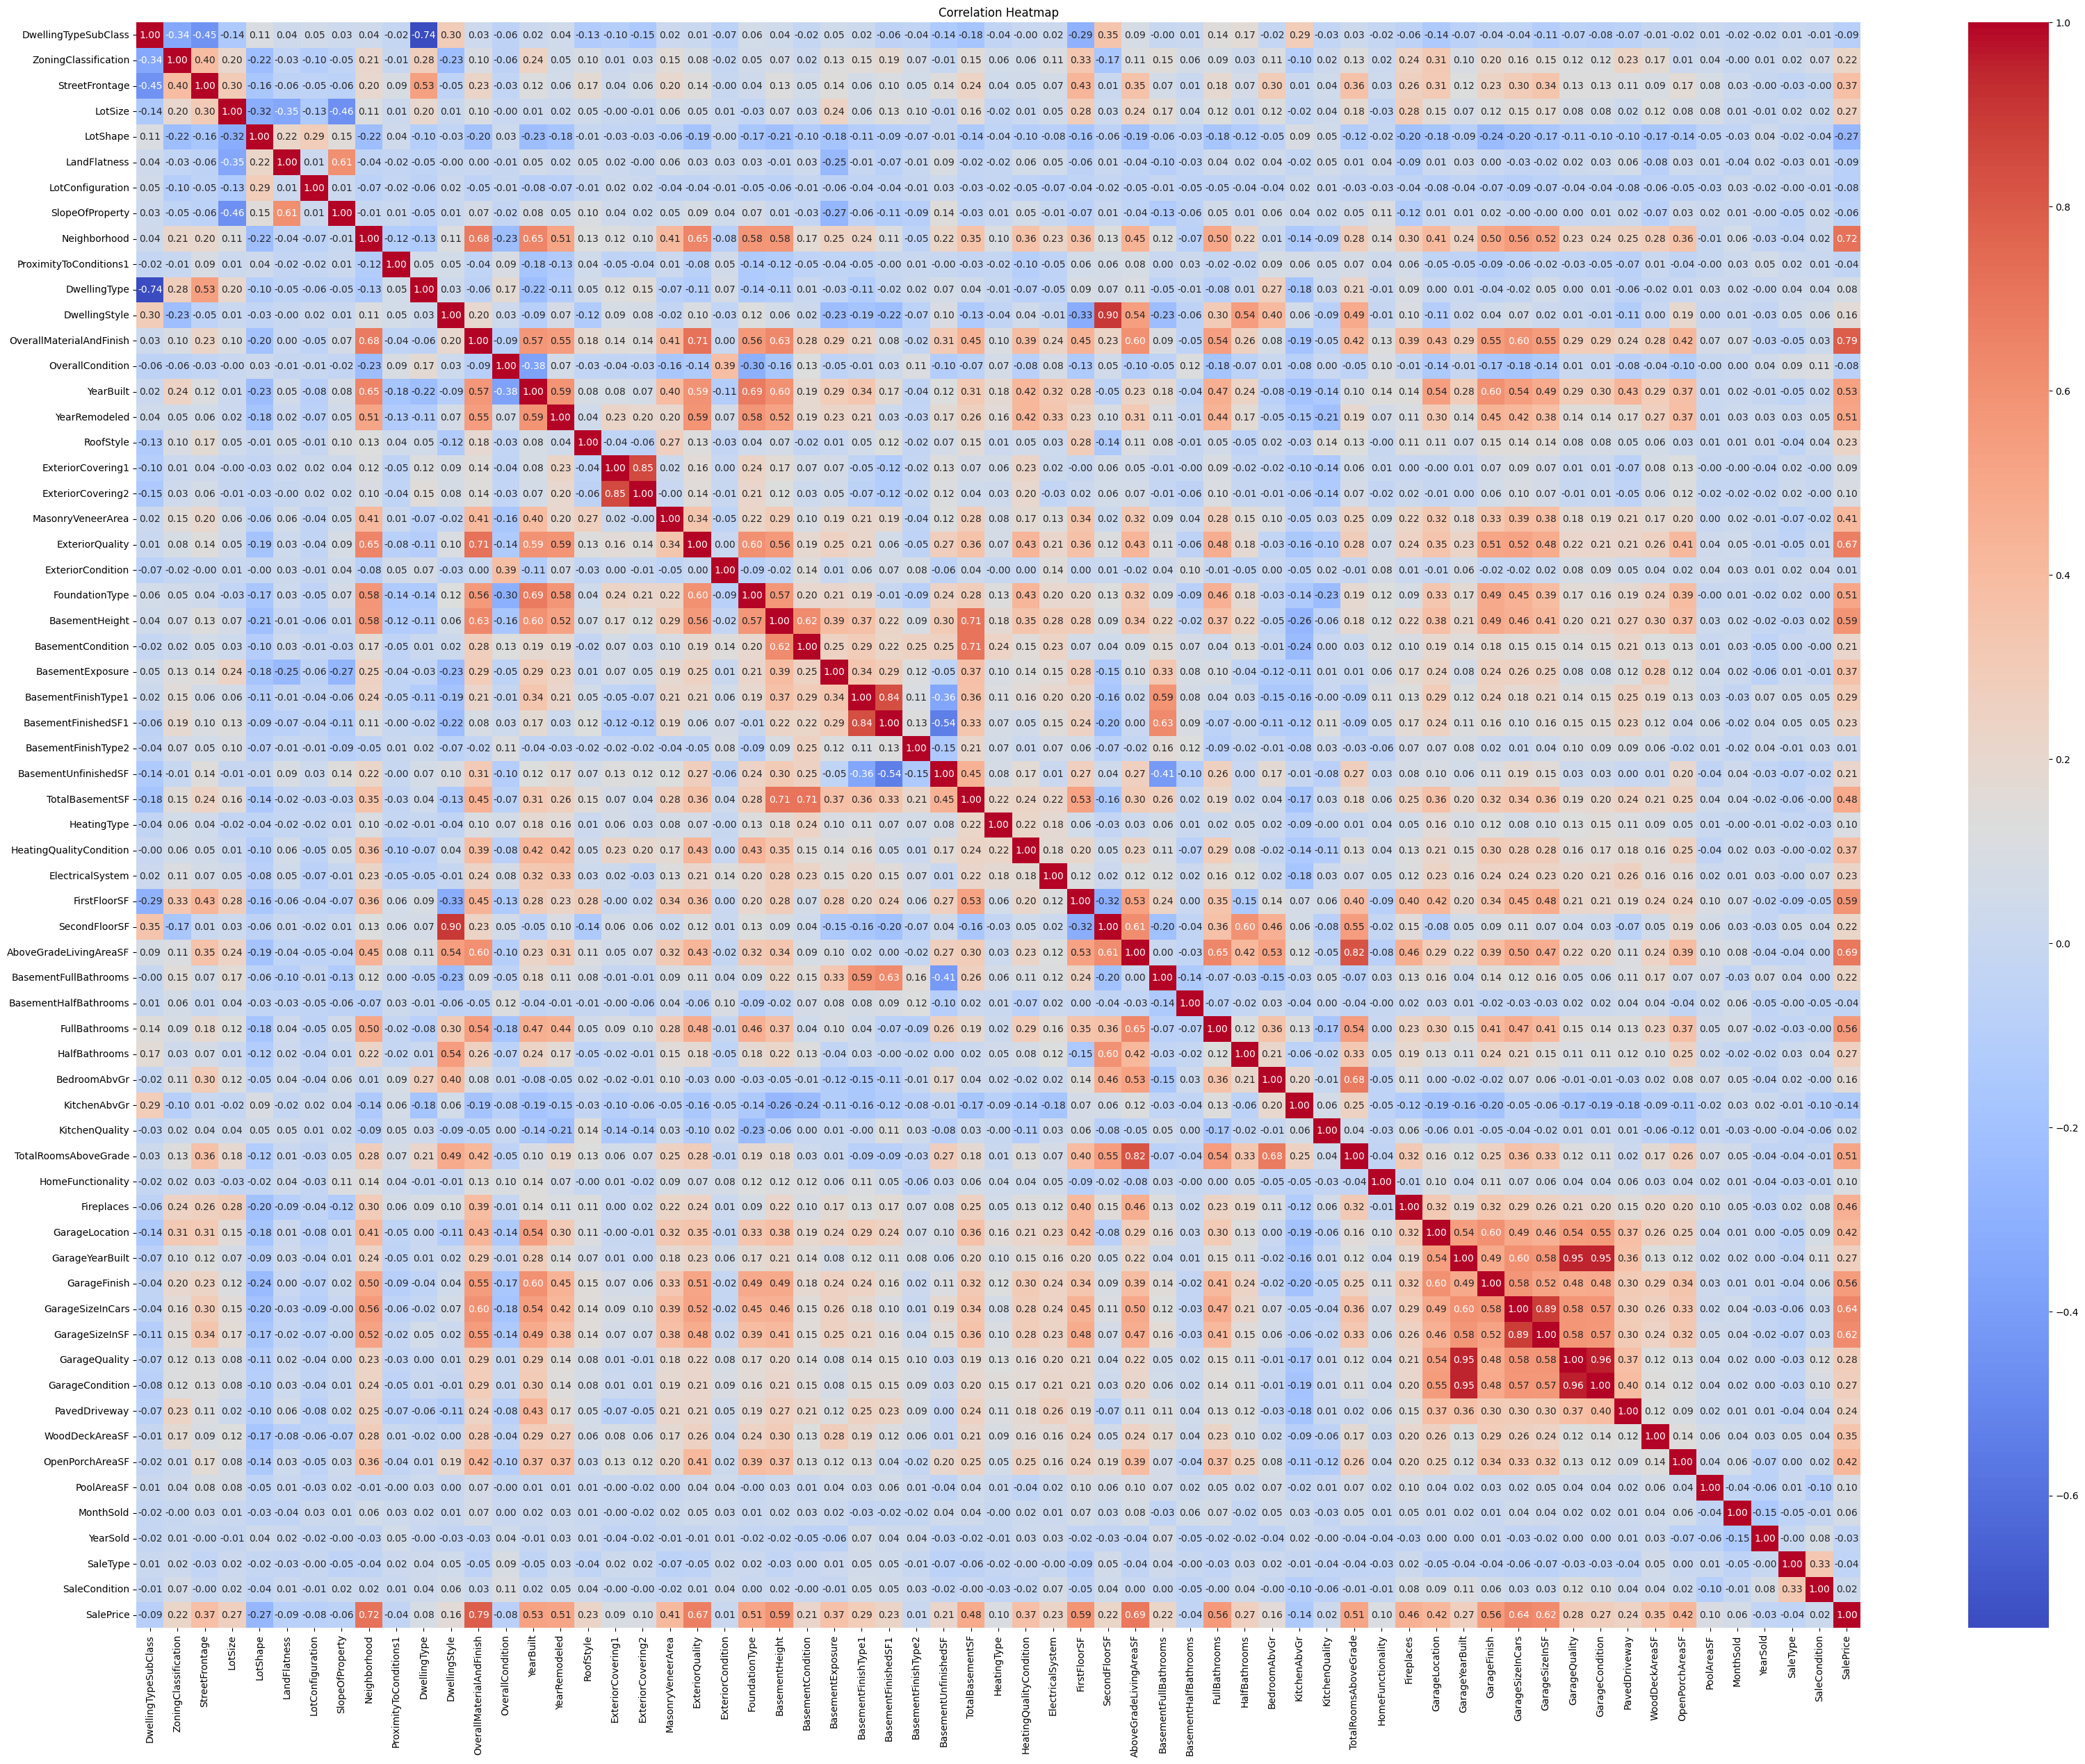

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(train_data_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Visualizing the correlation plot to analyze the relationship between features and our target column  **`[SalePrice]`** aiding in the identification of the most correlated features.

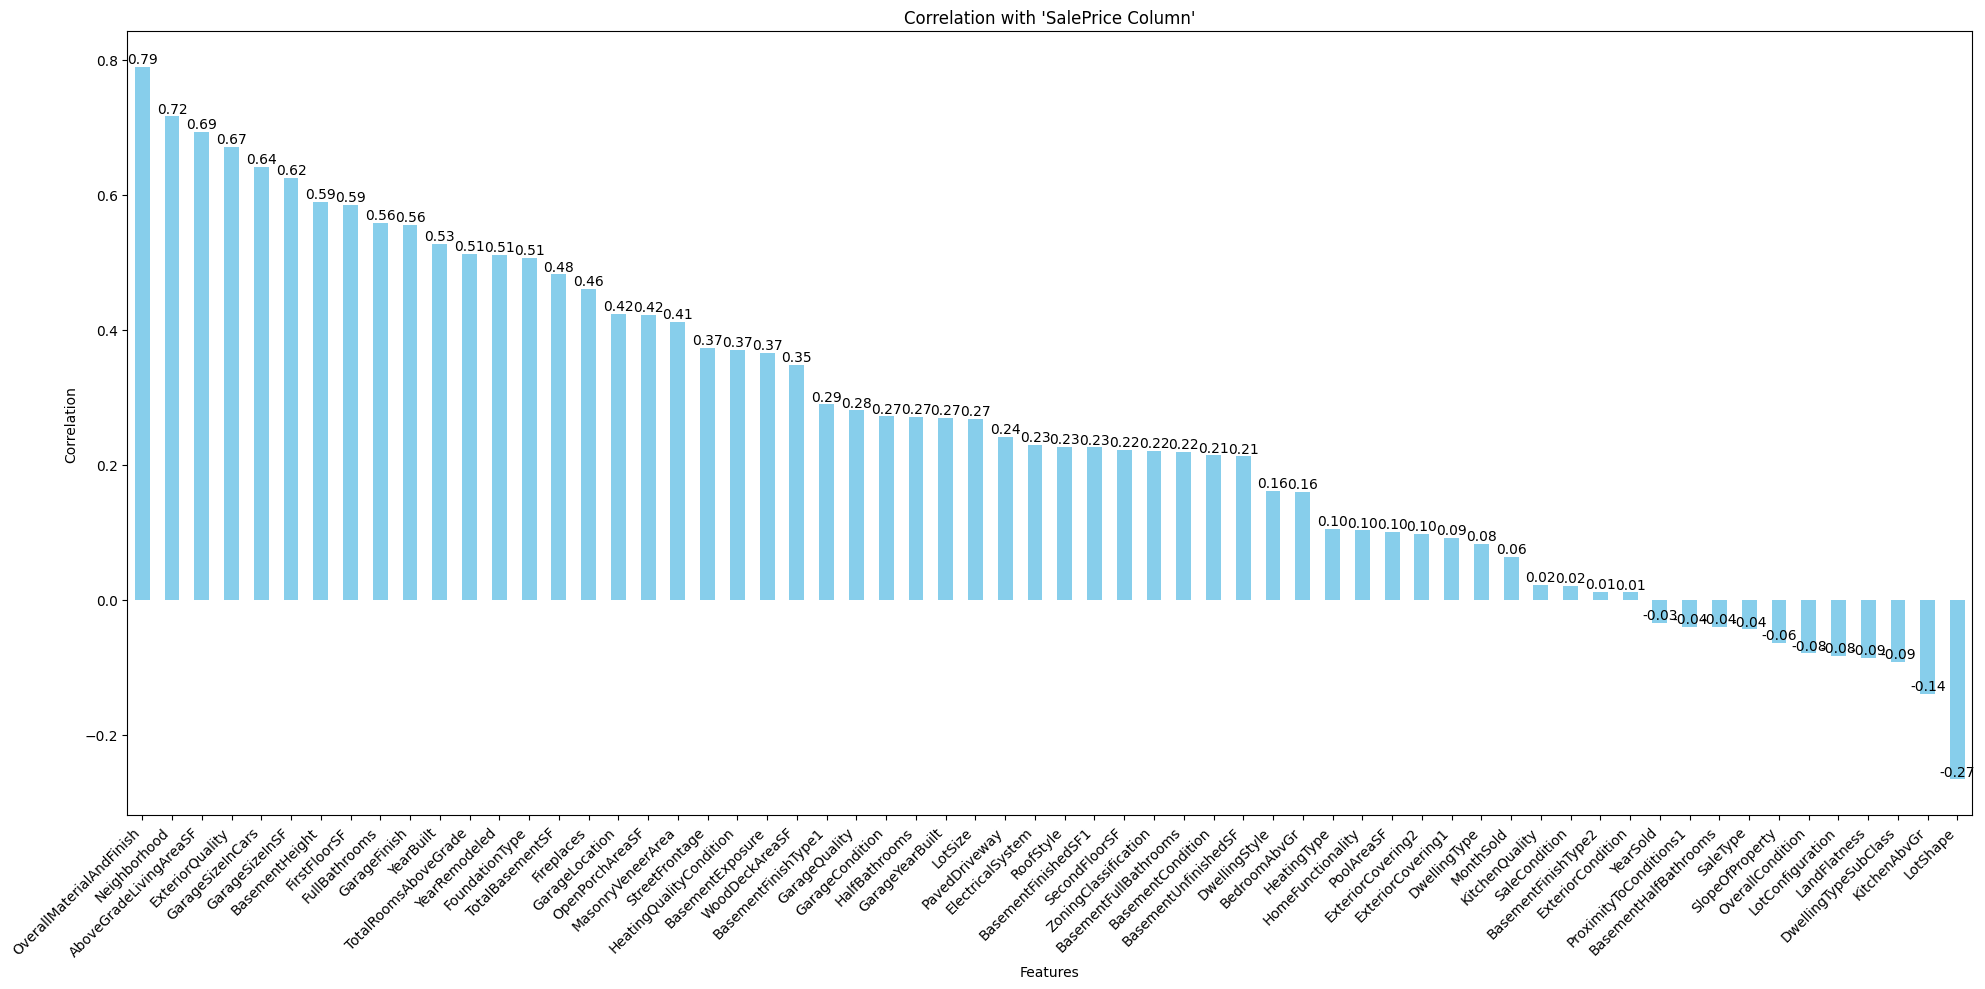

In [ ]:
correlations = train_data_imputed.corr()['SalePrice'].drop('SalePrice')
sorted_correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(20, 10))
ax = sorted_correlations.plot(kind='bar', color='skyblue')
plt.title("Correlation with 'SalePrice Column'")
plt.xlabel('Features')
plt.ylabel('Correlation')

for i, v in enumerate(sorted_correlations):
    ax.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Many features exhibit high correlation with the target column, suggesting strong relationships, both positive and negative, between them. To proceed, we will establish a correlation threshold to determine which features to select for further analysis. Additionally, we will employ additional selection techniques to confirm the strong relationships of these features with the target variable.


Utilizing the Anova F-scores test to assess the relationship between the features and the target column, aiding in the identification of high-scoring features for selection.


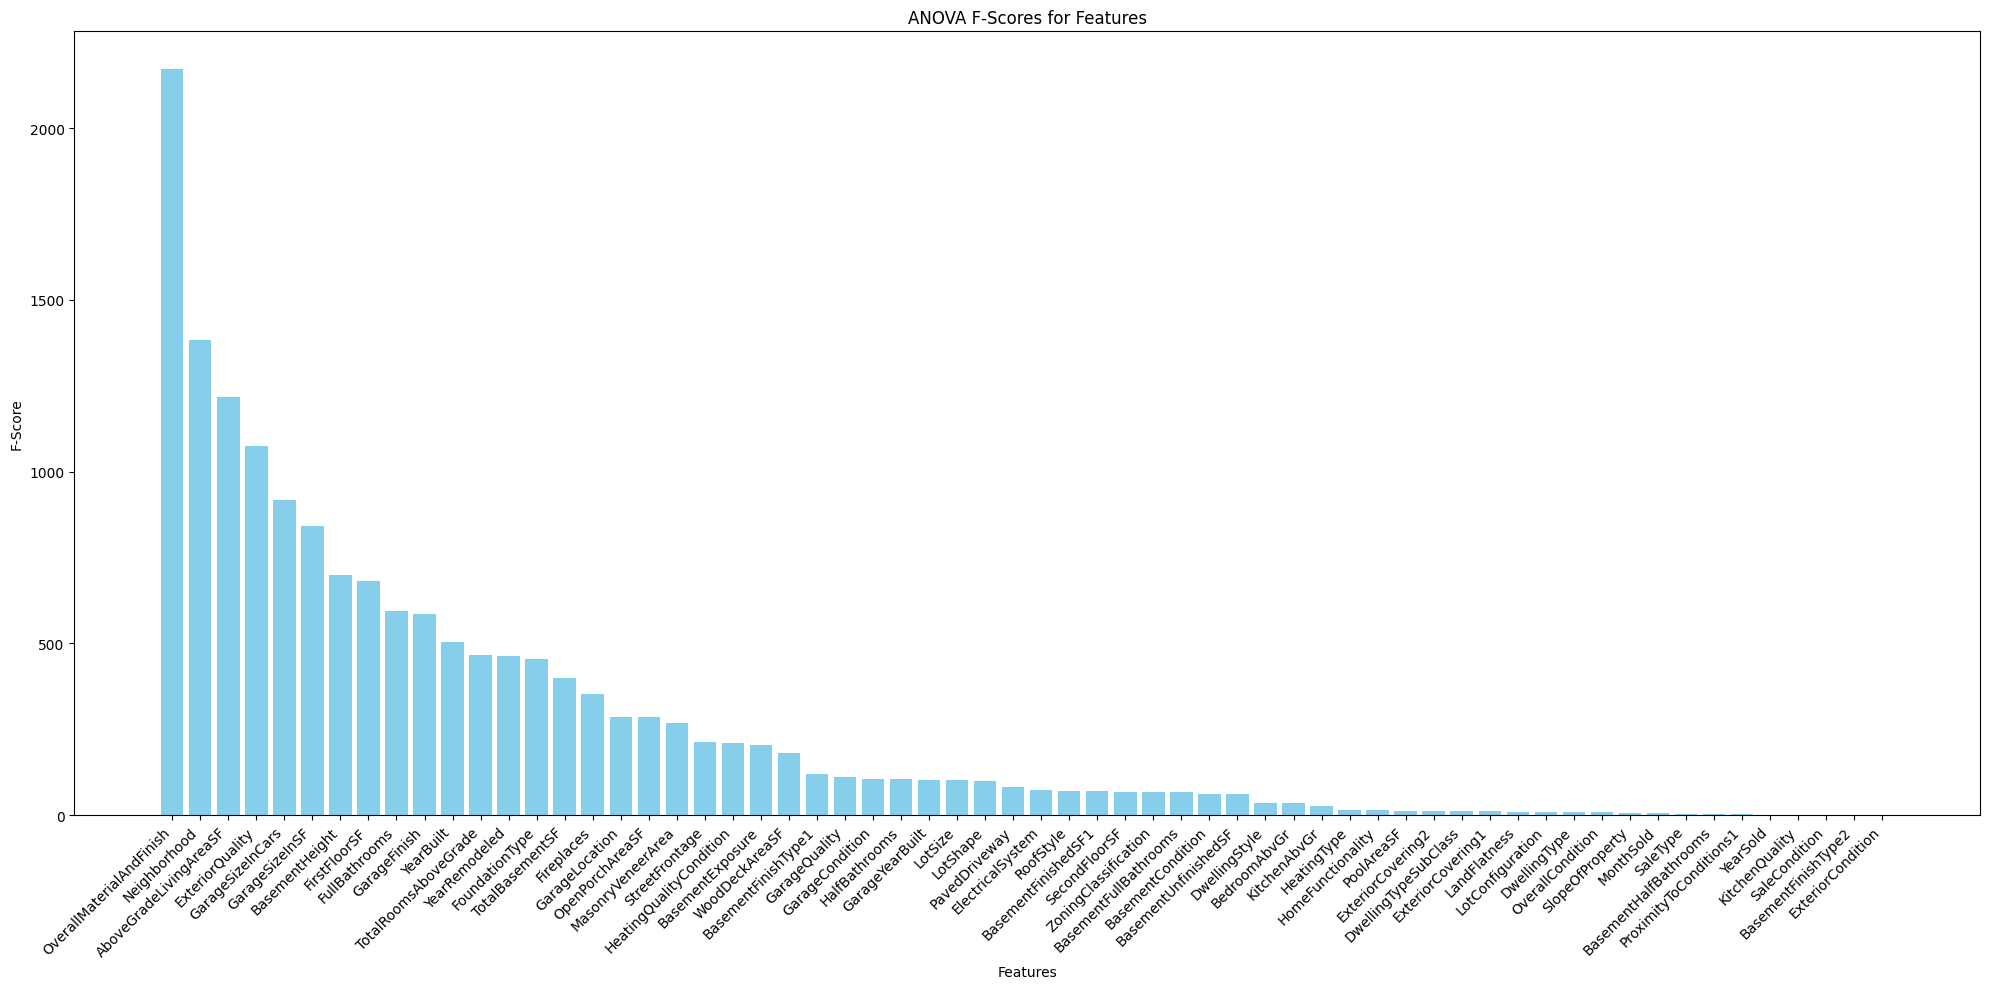

In [ ]:
from sklearn.feature_selection import f_regression

f_scores, _ = f_regression(train_data_imputed.iloc[:,:-1], train_data_imputed['SalePrice'])

f_score_df = pd.DataFrame({'Feature': train_data_imputed.iloc[:,:-1].columns, 'F-Score': f_scores})
f_score_df.sort_values(by='F-Score', ascending=False, inplace=True)

plt.figure(figsize=(20, 10))
plt.bar(f_score_df['Feature'], f_score_df['F-Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('ANOVA F-Scores for Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Having observed that features with high ANOVA F-scores align with those exhibiting high correlation values identified earlier, we will proceed with employing another technique for further confirmation and final selection.

Employing the mutual information technique to further select features and confirm the strong relationships of the chosen features.

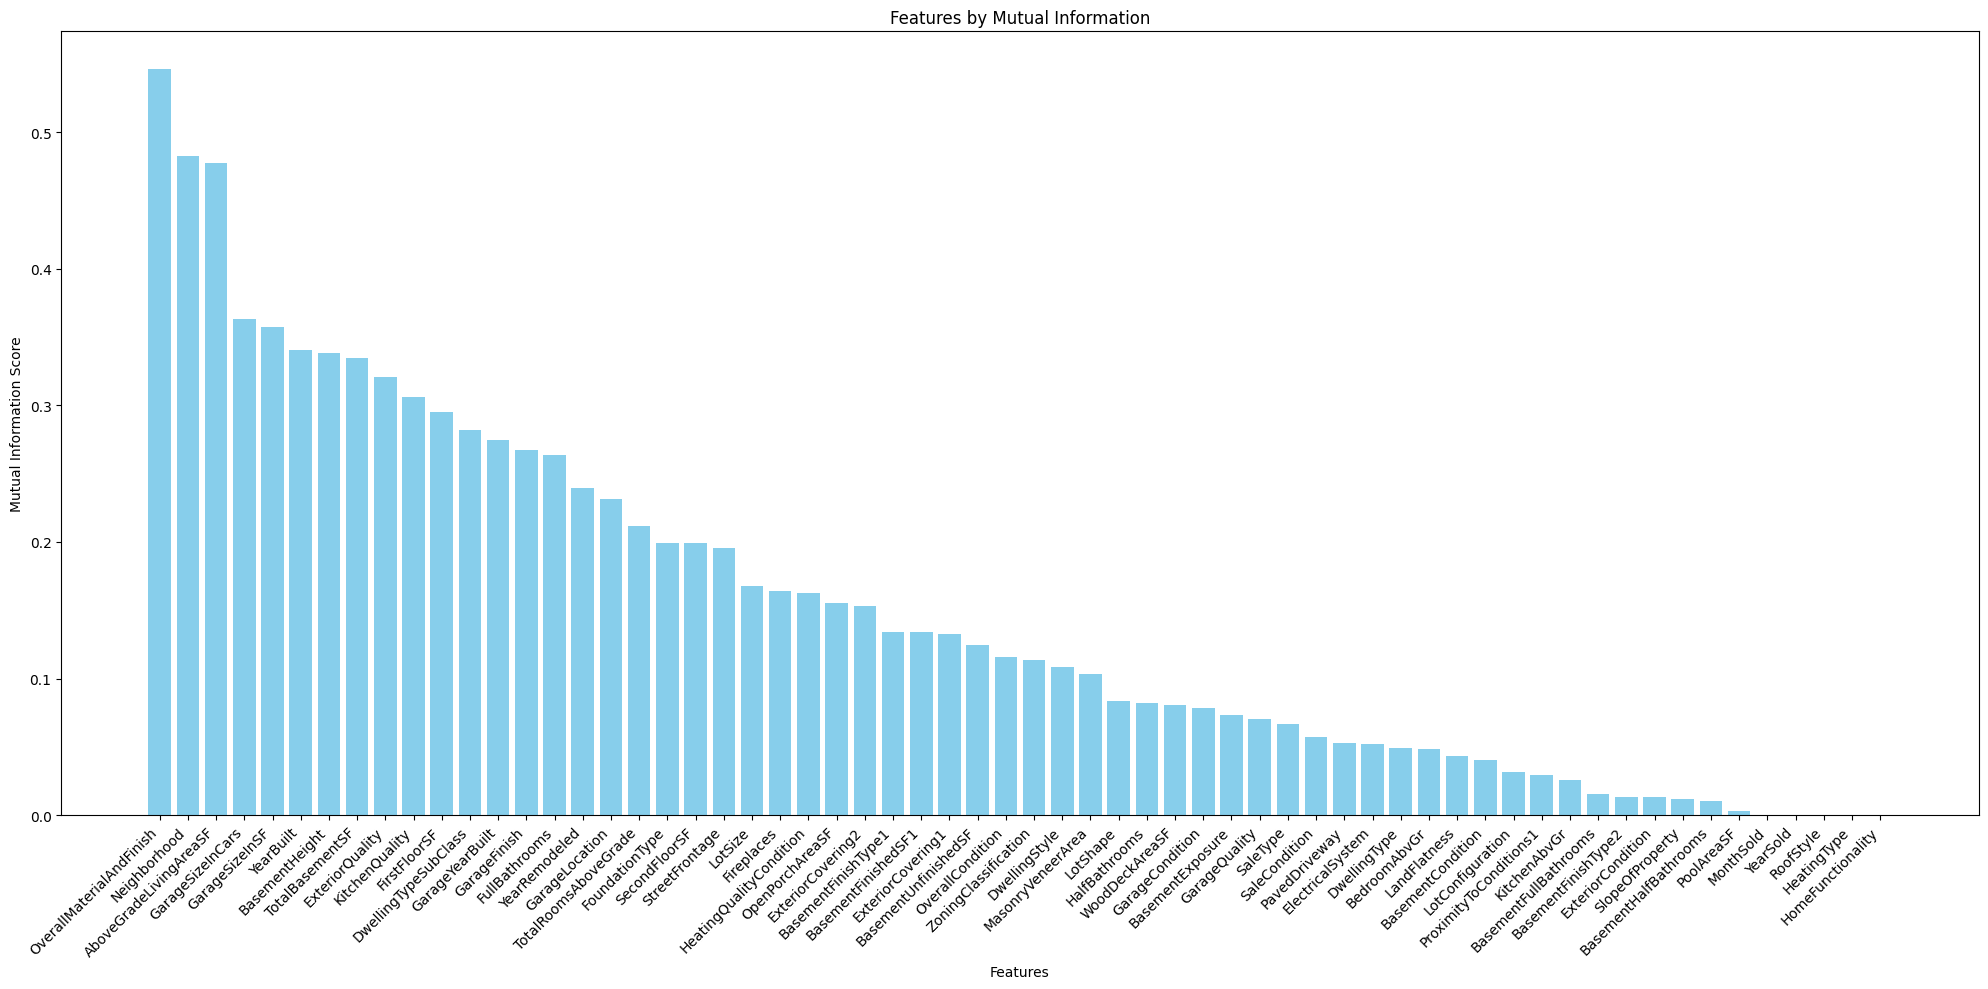

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mutual_info_scores = mutual_info_regression(train_data_imputed.iloc[:,:-1], train_data_imputed['SalePrice'],random_state=1)

top_indices = np.argsort(mutual_info_scores)[::-1]


plt.figure(figsize=(20, 10))
plt.bar(train_data_imputed.columns[top_indices], mutual_info_scores[top_indices], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Features by Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* We've noticed that most of the features with high correlation and high ANOVA scores also exhibit high mutual information values.

* Based on the consistency of results across the various techniques we employed for feature selection, we will opt for one of them and set a threshold value. Features surpassing this threshold will be considered as containing valuable and useful information for our model prediction.

-------

# **5. Modeling**

We will set a threshold of **`0.35`** for positive correlations and **`-0.1`** for negative correlations. Features exceeding these thresholds will be considered our final features for model selection.

Then,Creating the training, validation, and testing datasets using the selected final features.

In [ ]:
correlations = train_data_imputed.corr()['SalePrice']

filtered_correlations = correlations[
    (correlations >= 0.35) | (correlations < -0.1)
].index.to_list()

filtered_correlations.remove('SalePrice')

X_train = train_data_imputed[filtered_correlations]
X_test = test_data_imputed[filtered_correlations]
X_val = val_data_imputed[filtered_correlations]

In [ ]:
X_train.head()

StreetFrontage  LotShape  Neighborhood  OverallMaterialAndFinish  \
0        0.696429  0.666667      0.457348                  0.666667   
1        0.470238  0.333333      0.423049                  0.666667   
2        0.386905  1.000000      0.423049                  0.444444   
3        0.208333  1.000000      0.039025                  0.222222   
4        0.625000  1.000000      0.457348                  0.333333   

   YearBuilt  YearRemodeled  MasonryVeneerArea  ExteriorQuality  \
0   0.423564       0.616667                0.0         0.666667   
1   0.929893       0.866667                0.0         0.666667   
2   0.703992       0.883333                0.0         0.333333   
3   0.252191       0.000000                0.0         0.333333   
4   0.314508       0.000000                0.0         0.333333   

   FoundationType  BasementHeight  BasementExposure  TotalBasementSF  \
0        0.187168             0.8               0.2         0.753683   
1        1.000000             0.8               0.2         0.841000   
2        0.187168             0.8               0.6         0.686334   
3        0.000000             0.6               0.2         0.713816   
4        0.000000             0.4               0.2         0.665449   

   HeatingQualityCondition  FirstFloorSF  AboveGradeLivingAreaSF  \
0                     0.50      0.422489                0.704285   
1                     1.00      0.550351                0.500236   
2                     0.50      0.315102                0.151351   
3                     0.75      0.359675                0.217454   
4                     1.00      0.477632                0.392389   

   FullBathrooms  KitchenAbvGr  TotalRoomsAboveGrade  Fireplaces  \
0       0.333333      0.333333              0.526456    0.333333   
1       0.666667      0.333333              0.526456    0.000000   
2       0.333333      0.333333              0.430677    0.000000   
3       0.333333      0.333333              0.430677    0.000000   
4       0.333333      0.333333              0.430677    0.333333   

   GarageLocation  GarageFinish  GarageSizeInCars  GarageSizeInSF  \
0        0.857143      1.000000              0.25        0.192308   
1        0.857143      0.666667              0.50        0.646368   
2        0.285714      1.000000              0.25        0.423077   
3        0.000000      0.000000              0.00        0.000000   
4        0.285714      0.333333              0.25        0.269231   

   OpenPorchAreaSF  
0         0.000000  
1         0.392201  
2         0.000000  
3         0.000000  
4         0.000000

* Now, our data is prepared to be fed into models using the final selected features.

Formulating the target columns for both training and validation datasets based on the preprocessed data.

In [ ]:
y_train = train_data_imputed['SalePrice']
y_val = val_data_imputed['SalePrice']

Creating **`models_eval`** dataframe to facilitate the storage of metrics values for each model used, post-training and evaluation, thus aiding in the final analysis and model selection.


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import learning_curve

models_eval = pd.DataFrame(columns=['Model','R2-Score','MAE','MSE'])

### 5.1) Linear Regression

Choosing  **Linear Regression** model as our primary model to initially evaluate its performance.

In [ ]:
from sklearn.linear_model import LinearRegression

Training the model on the training data and obtaining predictions on both the training and validation data to identify any potential overfitting issues.

In [ ]:
linear_regressor=LinearRegression()

linear_regressor.fit(X_train,y_train)
predictions_linear = linear_regressor.predict(X_val)

In [ ]:
y_train_pred = linear_regressor.predict(X_train)

In [ ]:
print("Evaluating Training Metrics :\n")
print("Training Accuracy of Linear Regression  = ",r2_score(y_train,y_train_pred)*100)
print("Training MAE of Linear Regression = ",mean_absolute_error(y_train,y_train_pred)*100)
print("Training MSE of Linear Regression = ",mean_squared_error(y_train,y_train_pred)*100)


Evaluating Training Metrics :

Training Accuracy of Linear Regression  =  81.65648460012575
Training MAE of Linear Regression =  2203266.8668338577
Training MSE of Linear Regression =  109912365312.66725


In [ ]:
print("Evaluating Validation Metrics :\n")

print("Accuracy of Linear Regression = ",r2_score(y_val,predictions_linear)*100)
print("MAE of Linear Regression = ",mean_absolute_error(y_val,predictions_linear)*100)
print("MSE of Linear Regression = ",mean_squared_error(y_val,predictions_linear)*100)

models_eval.loc[len(models_eval)]=['Linear',(r2_score(y_val,predictions_linear)*100),(mean_absolute_error(y_val,predictions_linear)*100),(mean_squared_error(y_val,predictions_linear)*100)]

Evaluating Validation Metrics :

Accuracy of Linear Regression =  80.90921579985311
MAE of Linear Regression =  2388395.450258291
MSE of Linear Regression =  174425618801.02295


* Based on the observed metrics for both training and validation data, there are no signs of overfitting as the Mean Squared Error (**MSE**) scores are slightly close. The model demonstrates reasonable performance, achieving an accuracy of around 80%. However, we can explore alternative models to potentially achieve better results.

In [ ]:
joblib.dump(linear_regressor,'linear_regressor.joblib')

['linear_regressor.joblib']

### 5.2) Polynomial Regression

Considering **Polynomial Regression** as a secondary option, in order to potentially improve results.

Evaluating the range of degrees using the Polynomial Regression model on our data and compute the Mean Squared Error (MSE) values for each model degree and visualizing it to  help choose the best degree that could reasonably enhance the results, while also taking into consideration potential overfitting issues associated with higher order polynomials.


Degree =  1 MSE Val =  1744256188.0102344
Degree =  2 MSE Val =  1185798031.1313396
Degree =  3 MSE Val =  4.1026415629606744e+16
Degree =  4 MSE Val =  2.2718776466583416e+16


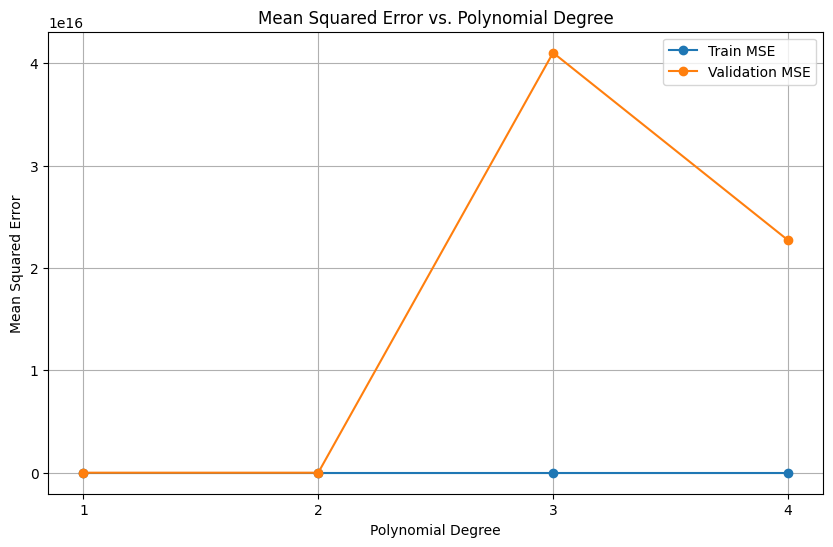

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degrees = np.arange(1, 5)
train_mse = []
val_mse = []
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    print("Degree = ", degree , "MSE Val = ", mean_squared_error(y_val, y_val_pred))
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, label='Train MSE', marker='o')
plt.plot(degrees, val_mse, label='Validation MSE', marker='o')
plt.title('Mean Squared Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

* Based on the results obtained, it appears that **`degree 2`** exhibits a more acceptable MSE value compared to higher degrees, suggesting potential overfitting.

Transforming our training and validation features using a polynomial degree of 2.

In [ ]:
poly_reg = PolynomialFeatures(2)
X_train_poly = poly_reg.fit_transform(X_train)
X_val_poly = poly_reg.transform(X_val)

Training the model on the training data and obtaining predictions on both the training and validation data to identify any potential overfitting issues.

In [ ]:
poly_model=LinearRegression()

poly_model.fit(X_train_poly,y_train)

poly_predictions=poly_model.predict(X_val_poly)

In [ ]:
y_train_pred = poly_model.predict(X_train_poly)

In [ ]:
print("Evaluating Training Metrics :\n")
print("Training Accuracy of Polynomial Regression  = ",r2_score(y_train,y_train_pred)*100)
print("Training MAE of Polynomial Regression = ",mean_absolute_error(y_train,y_train_pred)*100)
print("Training MSE of Polynomial Regression = ",mean_squared_error(y_train,y_train_pred)*100)


Evaluating Training Metrics :

Training Accuracy of Polynomial Regression  =  92.73232137331183
Training MAE of Polynomial Regression =  1490666.9400490464
Training MSE of Polynomial Regression =  43547146268.2169


In [ ]:
print("Evaluating Validation Metrics :\n")

print("Accuracy of Polynomial Regression = ",r2_score(y_val,poly_predictions)*100)
print("MAE of Polynomial Regression = ",mean_absolute_error(y_val,poly_predictions)*100)
print("MSE of Polynomial Regression = ",mean_squared_error(y_val,poly_predictions)*100)
models_eval.loc[len(models_eval)]=['Poly',(r2_score(y_val,poly_predictions)*100),(mean_absolute_error(y_val,poly_predictions)*100),(mean_squared_error(y_val,poly_predictions)*100)]

Evaluating Validation Metrics :

Accuracy of Polynomial Regression =  87.0215083811102
MAE of Polynomial Regression =  2239128.9482521666
MSE of Polynomial Regression =  118579803113.13396


* The model has been trained effectively, demonstrating acceptable validation accuracy and MSE. Signs of overfitting are minimal as the gap between training and validation is not substantial. However, we will further evaluate this by experimenting with advanced models to potentially select the best-performing model.

In [ ]:
joblib.dump(poly_reg,'poly_reg.joblib')
joblib.dump(poly_model,'poly_model.joblib')

['poly_model.joblib']

### 5.3) Random Forest

To select the best hyperparameter values and tune them for the Random Forest model, we will experiment by plotting different values for the hyperparameters along with MSE. This will assist in determining the optimal values that can yield a well-performing model without overfitting issues.

In [332]:
from sklearn.ensemble import RandomForestRegressor

min_samples_split_list = [2,10,20, 30, 50,70, 80,100,150, 200, 300, 500,500,700,900]
max_depth_list = [1,2, 3, 4,8,10,13,16,20,25, 32, 64,80,120, None]
n_estimators_list = [10,50,100,200,300,400,500,700,900,1000]

In [333]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:

    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 42).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = mean_squared_error(y_train,predictions_train)
    accuracy_val = mean_squared_error(y_val,predictions_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


fig = go.Figure()

fig.add_trace(go.Scatter(x=min_samples_split_list, y=accuracy_list_train,
                    mode='lines+markers',
                    name='Train',
                    hoverinfo='x+y',
                    hovertemplate='min_samples_split: %{x}<br>MSE: %{y}'))

fig.add_trace(go.Scatter(x=min_samples_split_list, y=accuracy_list_val,
                    mode='lines+markers',
                    name='Validation',
                    hoverinfo='x+y',
                    hovertemplate='min_samples_split: %{x}<br>MSE: %{y}'))

fig.update_layout(title='Train x Validation MSE',
                   xaxis_title='min_samples_split',
                   yaxis_title='MSE',
                   hovermode='closest')

fig.show()


* Upon examining the graph,  **min_samples_split** = 20 looks to be  satisfactory MSE values for both the training and validation sets. Moreover, this choice helps to mitigate overfitting by minimizing the disparity between the two sets.

In [334]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:

    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = mean_squared_error(y_train,predictions_train)
    accuracy_val = mean_squared_error(y_val,predictions_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

fig = go.Figure()

fig.add_trace(go.Scatter(x=max_depth_list, y=accuracy_list_train,
                    mode='lines+markers',
                    name='Train',
                    hoverinfo='x+y',
                    hovertemplate='max_depth: %{x}<br>MSE: %{y}'))

fig.add_trace(go.Scatter(x=max_depth_list, y=accuracy_list_val,
                    mode='lines+markers',
                    name='Validation',
                    hoverinfo='x+y',
                    hovertemplate='max_depth: %{x}<br>MSE: %{y}'))

fig.update_layout(title='Train x Validation MSE',
                   xaxis_title='max_depth',
                   yaxis_title='MSE',
                   hovermode='closest')

fig.show()

* Upon observing this graph as well,  **max_depth** = 12 looks to have  acceptable MSE values for both the training and validation sets. Moreover, this choice helps to mitigate overfitting by minimizing the disparity between the two sets.

In [335]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:

    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 42).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = mean_squared_error(y_train,predictions_train)
    accuracy_val = mean_squared_error(y_val,predictions_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

fig = go.Figure()

fig.add_trace(go.Scatter(x=n_estimators_list, y=accuracy_list_train,
                    mode='lines+markers',
                    name='Train',
                    hoverinfo='x+y',
                    hovertemplate='n_estimators: %{x}<br>MSE: %{y}'))

fig.add_trace(go.Scatter(x=n_estimators_list, y=accuracy_list_val,
                    mode='lines+markers',
                    name='Validation',
                    hoverinfo='x+y',
                    hovertemplate='n_estimators: %{x}<br>MSE: %{y}'))

fig.update_layout(title='Train x Validation MSE',
                   xaxis_title='n_estimators',
                   yaxis_title='MSE',
                   hovermode='closest')

fig.show()

* Upon observing this graph as well,  **n_estimator** > 200 looks to have  acceptable MSE values for both the training and validation sets. Moreover, this choice helps to mitigate overfitting by minimizing the disparity between the two sets.

Creating a Random Forest model with chosen hyperparameter values and training the model on the training data and obtaining predictions on both the training and validation data to identify any potential overfitting issues.

In [336]:
random_forest_model = RandomForestRegressor(
    min_samples_split = 20,max_depth = 12,
    n_estimators = 700, random_state = 42)

random_forest_model.fit(X_train,y_train)
forest_predictions=random_forest_model.predict(X_val)

In [337]:
y_train_pred = random_forest_model.predict(X_train)

In [338]:
print("Evaluating Training Metrics :\n")
print("Training Accuracy of Random Forest  = ",r2_score(y_train,y_train_pred)*100)
print("Training MAE of Random Forest = ",mean_absolute_error(y_train,y_train_pred)*100)
print("Training MSE of Random Forest = ",mean_squared_error(y_train,y_train_pred)*100)


Evaluating Training Metrics :

Training Accuracy of Random Forest  =  92.64986917055987
Training MAE of Random Forest =  1304643.4348311455
Training MSE of Random Forest =  44041190971.8712


In [339]:
print("Evaluating Validation Metrics :\n")
print("Accuracy of Random Forest  = ",r2_score(y_val,forest_predictions)*100)
print("MAE of Random Forest = ",mean_absolute_error(y_val,forest_predictions)*100)
print("MSE of Random Forest = ",mean_squared_error(y_val,forest_predictions)*100)

models_eval.loc[len(models_eval)]=['Forest',(r2_score(y_val,forest_predictions)*100),(mean_absolute_error(y_val,forest_predictions)*100),(mean_squared_error(y_val,forest_predictions)*100)]

Evaluating Validation Metrics :

Accuracy of Random Forest  =  86.74605645573664
MAE of Random Forest =  1855110.5838389918
MSE of Random Forest =  121096508138.42287


* Random Forest model demonstrates improved performance on the validation data, effectively minimizing the gap between the training and validation sets.

In [340]:
joblib.dump(random_forest_model,'random_forest_model.joblib')

['random_forest_model.joblib']

### 5.4) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Employing  GridSearch for tuning the hyperparameters of the Gradient Boosting model.

In [ ]:
%%time
param_grid = {
    'n_estimators': [200, 500, 600, 400],
    'learning_rate': [0.01, 0.1, 0.05,0.09],
    'max_depth': [4, 5 ,8, 12,15],
    'min_samples_split': [5, 8,12, 20, 25]
}

gb_regressor = GradientBoostingRegressor(random_state=42)

gb_grid_search = GridSearchCV(
    estimator=gb_regressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0
)

gb_grid_search.fit(X_train, y_train)

best_params = gb_grid_search.best_params_
best_score = gb_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)


Best Parameters: {'learning_rate': 0.09, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 200}
Best Score (MSE): -721575165.3419645
CPU times: user 2h 48s, sys: 8.83 s, total: 2h 57s
Wall time: 2h 2min 12s


Creating Gradient Boosting model with the GridSearch selected hyperparameter values and training the model and obtaining predictions on both the training and validation data to identify any potential overfitting issues.

In [342]:
gb_regressor = gb_grid_search.best_estimator_

predictions_gb = gb_regressor.predict(X_val)

In [343]:
y_train_pred = gb_regressor.predict(X_train)

In [344]:
print("Evaluating Training Metrics :\n")
print("Training Accuracy of Gradient Boosting  = ",r2_score(y_train,y_train_pred)*100)
print("Training MAE of Gradient Boosting = ",mean_absolute_error(y_train,y_train_pred)*100)
print("Training MSE of Gradient Boosting = ",mean_squared_error(y_train,y_train_pred)*100)


Evaluating Training Metrics :

Training Accuracy of Gradient Boosting  =  97.9308107530357
Training MAE of Gradient Boosting =  841741.3080282096
Training MSE of Gradient Boosting =  12398358736.348995


In [345]:
print("Evaluating Validation Metrics :\n")
print("Accuracy of Gradient Boosting  = ",r2_score(y_val,predictions_gb)*100)
print("MAE of Gradient Boosting = ",mean_absolute_error(y_val,predictions_gb)*100)
print("MSE of Gradient Boosting = ",mean_squared_error(y_val,predictions_gb)*100)

models_eval.loc[len(models_eval)]=['Gradient Boosting',(r2_score(y_val,predictions_gb)*100),(mean_absolute_error(y_val,predictions_gb)*100),(mean_squared_error(y_val,predictions_gb)*100)]

Evaluating Validation Metrics :

Accuracy of Gradient Boosting  =  92.06098218815613
MAE of Gradient Boosting =  1620864.3865987961
MSE of Gradient Boosting =  72535946139.5282


* Gradient Boosting showing good performance for both training and validation of achieveing accuracy 92%.



### 5.5) XGBoost

In [346]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from xgboost import XGBRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.1 MB/s eta 0:00:00


Employing  BayesianSearch for tuning the hyperparameters of the XGBoost model.

In [347]:
%%time

xgb_param_dist = {
    'n_estimators': (100, 1000),
    'max_depth': (4, 16),
    'learning_rate': (0.01, 0.9),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1),
    'gamma':(0.1, 2),
    'lambda':(0.1, 4)
}

xgb = XGBRegressor(random_state=42)
xgb_bayes_search = BayesSearchCV(xgb, search_spaces=xgb_param_dist, n_iter=120, cv=5, scoring='neg_mean_squared_error', verbose=0)
xgb_bayes_search.fit(X_train, y_train)

best_params = xgb_bayes_search.best_params_
best_score = xgb_bayes_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)


Best Parameters: OrderedDict([('colsample_bytree', 0.4670001574835124), ('gamma', 2.0), ('lambda', 2.2866812722898344), ('learning_rate', 0.030273741539125508), ('max_depth', 4), ('n_estimators', 803), ('subsample', 0.5)])
Best Score (MSE): -660625977.1030295
CPU times: user 37min 4s, sys: 4min 18s, total: 41min 23s
Wall time: 26min 13s


Creating XGBoost  model with the BayesSearch selected hyperparameter values and training the model and obtaining predictions on both the training and validation data to identify any potential overfitting issues.

In [348]:
xgb_regressor = xgb_bayes_search.best_estimator_

predictions_xgb = xgb_regressor.predict(X_val)

In [349]:
y_train_pred = xgb_regressor.predict(X_train)

In [350]:
print("Evaluating Training Metrics :\n")
print("Training Accuracy of XGBoost   = ",r2_score(y_train,y_train_pred)*100)
print("Training MAE of XGBoost  = ",mean_absolute_error(y_train,y_train_pred)*100)
print("Training MSE of XGBoost = ",mean_squared_error(y_train,y_train_pred)*100)


Evaluating Training Metrics :

Training Accuracy of XGBoost   =  98.02823148426737
Training MAE of XGBoost  =  812910.3631563927
Training MSE of XGBoost =  11814624224.902273


In [351]:
print("Evaluating Validation Metrics :\n")

print("Accuracy of XGBoost   = ", r2_score(y_val,predictions_xgb)*100)
print("MAE of XGBoost = ", mean_absolute_error(y_val,predictions_xgb)*100)
print("MSE of XGBoost = ", mean_squared_error(y_val,predictions_xgb)*100)

models_eval.loc[len(models_eval)]=['XgBoost',(r2_score(y_val,predictions_xgb)*100),(mean_absolute_error(y_val,predictions_xgb)*100),(mean_squared_error(y_val,predictions_xgb)*100)]

Evaluating Validation Metrics :

Accuracy of XGBoost   =  91.59565803217937
MAE of XGBoost =  1624767.9098886987
MSE of XGBoost =  76787445344.50513


* XGBoost showing good performance for both training and validation of achieveing accuracy 91%.



In [352]:
joblib.dump(xgb_regressor,'xgb_regressor.joblib')

['xgb_regressor.joblib']

------

# **6. Conclusion**


Reviewing the **`models_eval`** dataframe post models tuning and training to assess the performance of each model and determine the best model based on its metrics for selection as our final model

In [353]:
models_eval

Model   R2-Score           MAE           MSE
0             Linear  80.909216  2.388395e+06  1.744256e+11
1               Poly  87.021508  2.239129e+06  1.185798e+11
2             Forest  86.746056  1.855111e+06  1.210965e+11
3             Forest  86.746056  1.855111e+06  1.210965e+11
4  Gradient Boosting  92.060982  1.620864e+06  7.253595e+10
5            XgBoost  91.595658  1.624768e+06  7.678745e+10

Creating a plot to visualize the models along with their metrics scores, facilitating the identification of the best model by highlighting the one with the highest **R2-Score** and lowest
**MSE** and **MAE**.

In [354]:
model_names = models_eval['Model']
r2_scores = models_eval['R2-Score']
mae_scores = models_eval['MAE']/100000
mse_scores = models_eval['MSE']/1000000000

max_r2_index = r2_scores.idxmax()
max_mae_index = mae_scores.idxmin()
min_mse_index = mse_scores.idxmin()

fig = go.Figure(data=[
    go.Bar(name='R2-Score', x=model_names, y=r2_scores, marker_color=['lightskyblue' if i != max_r2_index else 'orange' for i in range(len(model_names))]),
    go.Bar(name='MAE', x=model_names, y=mae_scores, marker_color=['lightskyblue' if i != max_mae_index else 'orange' for i in range(len(model_names))]),
    go.Bar(name='MSE', x=model_names, y=mse_scores, marker_color=['lightskyblue' if i != min_mse_index else 'orange' for i in range(len(model_names))])
])

fig.update_layout(barmode='group', title='Model Evaluation Metrics', xaxis_title='Model', yaxis_title='Score')
fig.show()


- After evaluating all the models, we conclude that the best-performing model is **`Gradient Boosting`**, which we will employ as our final model.

Merging the train and validation datasets into a single training set for training the model.


In [355]:
X_train_final = np.concatenate((X_train, X_val), axis=0)

y_train_final = np.concatenate((y_train, y_val), axis=0)

Plotting the Learning Curve to Verify the Model's Generalization Performance


In [356]:
train_sizes_abs, train_scores, val_scores = learning_curve(gb_regressor, X_train_final, y_train_final, cv=5, train_sizes= np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

_, train_mse, val_mse = learning_curve(gb_regressor, X_train_final, y_train_final, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error')

train_mse_mean = -np.mean(train_mse, axis=1)
val_mse_mean = -np.mean(val_mse, axis=1)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "Mean Squared Error"))
# Add subplot for accuracy
fig.add_trace(go.Scatter(x=train_sizes_abs, y=train_scores_mean, mode='lines+markers', name='Training Accuracy', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=train_sizes_abs, y=val_scores_mean, mode='lines+markers', name='Validation Accuracy', line=dict(color='red')), row=1, col=1)
# Add subplot for mean squared error
fig.add_trace(go.Scatter(x=train_sizes_abs, y=train_mse_mean, mode='lines+markers', name='Training MSE', line=dict(color='green')), row=1, col=2)
fig.add_trace(go.Scatter(x=train_sizes_abs, y=val_mse_mean, mode='lines+markers', name='Validation MSE', line=dict(color='orange')), row=1, col=2)

fig.update_layout(title_text="Learning Curves For Best Model")
fig.show()


* Through the analysis of the learning curve of our selected **`gradient boosting regressor`** model, taking into account the limited size of our dataset where overfitting is a concern, we observe its noteworthy performance on both the training and validation sets. Notably, it demonstrates a good and observed reduction in the gap between training and validation scores, effectively handling potential overfitting. Consequently, we are confident in our decision to designate this model as our final choice for predicting new data, as it skillfully balances achieving strong performance on both tests while addressing overfitting concerns.

Train the **`Gradient Boosting`** model on the combined training set and use it to predict the test set.

In [357]:
gb_regressor.fit(X_train_final,y_train_final)

GradientBoostingRegressor(learning_rate=0.09, max_depth=4, min_samples_split=20,
                          n_estimators=200)

In [358]:
pred = gb_regressor.predict(X_test)

In [362]:
pred

array([131966.53016468, 141413.59178659, 180392.76602991, ...,
       165453.49992368, 115089.36291867, 206563.78485752])



> <font size="+2" color="black"> **Final Notes**</font>

  * Given the challenges posed by our small dataset with high-dimensional features requiring extreme cleaning, our focus lay in achieving a balanced selection of validation and training set sizes, as well as selecting the optimal features within these constraints.Through our extensive model selection process, we employed various models, carefully evaluating their performance on both sets while considering potential overfitting issues. Our ultimate objective was to identify the model that excelled in performance on both training and validation sets without overfitting. Notably, we acknowledge that obtaining more training examples would significantly enhance performance and address potential overfitting across all models.

  

----

Saving the model.

In [360]:
import joblib

joblib.dump(gb_regressor,'gb_regressor.joblib')

['gb_regressor.joblib']

# **Credits :**

> <font size='4'>**Team Members :**</font>

- [Mohamed samy](https://www.linkedin.com/in/mohamed-samy10/)
-  [Yomna Mohammed ](https://www.linkedin.com/in/yomna-muhammed-b964a6270)



